<a href="https://colab.research.google.com/github/Nyimassharima/melbourne-housing-market/blob/main/melbourne_housing_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

# **DATA CLEANING**
Febby Rahma dan Esraminar Siregar

In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
plt.style.use('bmh'); sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL.csv


In [ ]:
import io
Melb_housing = pd.read_csv(io.BytesIO(uploaded['Melbourne_housing_FULL.csv']),encoding='ISO-8859-1')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
Melb_housing

Suburb             Address  ...             Regionname Propertycount
0      Abbotsford       68 Studley St  ...  Northern Metropolitan        4019.0
1      Abbotsford        85 Turner St  ...  Northern Metropolitan        4019.0
2      Abbotsford     25 Bloomburg St  ...  Northern Metropolitan        4019.0
3      Abbotsford  18/659 Victoria St  ...  Northern Metropolitan        4019.0
4      Abbotsford        5 Charles St  ...  Northern Metropolitan        4019.0
...           ...                 ...  ...                    ...           ...
34852  Yarraville         13 Burns St  ...   Western Metropolitan        6543.0
34853  Yarraville       29A Murray St  ...   Western Metropolitan        6543.0
34854  Yarraville      147A Severn St  ...   Western Metropolitan        6543.0
34855  Yarraville    12/37 Stephen St  ...   Western Metropolitan        6543.0
34856  Yarraville    3 Tarrengower St  ...   Western Metropolitan        6543.0

[34857 rows x 21 columns]

In [ ]:
#Pertama akan dilihat terlebih dahulu type variabelnya
Melb_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
#Koreksi tipe data
Melb_housing['Date'] = pd.to_datetime(Melb_housing['Date'])

In [ ]:
#Karena fokus terhadap Price suatu Properti maka yang akan di perhatikan hanya data dengan Price tanpa missing value
Melb_housing = Melb_housing[Melb_housing['Price'].notnull()]
Melb_housing.shape

(27247, 21)

In [ ]:
# Alamat dan waktu penjualan yang sama diasumsikan sebagai properti yang sama
# Akan dicek duplikasi untuk alamat dan waktu yang sama
Melb_housing.loc[Melb_housing.duplicated(subset=['Address','Suburb','Date']), :]

Suburb         Address  ...             Regionname Propertycount
6190   Maidstone   3/29 Burns St  ...   Western Metropolitan        3873.0
12655     Coburg  69 Victoria St  ...  Northern Metropolitan       11204.0

[2 rows x 21 columns]

In [ ]:
#Duplikasi data dengan alamat dan waktu penjualan yang sama akan di drop
Melb_housing = Melb_housing.drop_duplicates(subset=['Address','Suburb','Date'])
Melb_housing

Suburb           Address  ...             Regionname Propertycount
1      Abbotsford      85 Turner St  ...  Northern Metropolitan        4019.0
2      Abbotsford   25 Bloomburg St  ...  Northern Metropolitan        4019.0
4      Abbotsford      5 Charles St  ...  Northern Metropolitan        4019.0
5      Abbotsford  40 Federation La  ...  Northern Metropolitan        4019.0
6      Abbotsford       55a Park St  ...  Northern Metropolitan        4019.0
...           ...               ...  ...                    ...           ...
34852  Yarraville       13 Burns St  ...   Western Metropolitan        6543.0
34853  Yarraville     29A Murray St  ...   Western Metropolitan        6543.0
34854  Yarraville    147A Severn St  ...   Western Metropolitan        6543.0
34855  Yarraville  12/37 Stephen St  ...   Western Metropolitan        6543.0
34856  Yarraville  3 Tarrengower St  ...   Western Metropolitan        6543.0

[27245 rows x 21 columns]

In [ ]:
# Karena variabel Address, Postcode, Lattitude dan Longtitude merupakan variabel dengan isi yang terlalu beragam
# dan tidak mencerminkan karakteristik propertinya maka diputuskan untuk menghapus variabel tersebut 
Melb_housing_1 = Melb_housing.drop(['Address','Postcode','Lattitude','Longtitude'],axis=1)
Melb_housing_1

Suburb  Rooms  ...             Regionname  Propertycount
1      Abbotsford      2  ...  Northern Metropolitan         4019.0
2      Abbotsford      2  ...  Northern Metropolitan         4019.0
4      Abbotsford      3  ...  Northern Metropolitan         4019.0
5      Abbotsford      3  ...  Northern Metropolitan         4019.0
6      Abbotsford      4  ...  Northern Metropolitan         4019.0
...           ...    ...  ...                    ...            ...
34852  Yarraville      4  ...   Western Metropolitan         6543.0
34853  Yarraville      2  ...   Western Metropolitan         6543.0
34854  Yarraville      2  ...   Western Metropolitan         6543.0
34855  Yarraville      3  ...   Western Metropolitan         6543.0
34856  Yarraville      2  ...   Western Metropolitan         6543.0

[27245 rows x 17 columns]

Text(0.5, 1.0, 'Heatmap Missing Values')

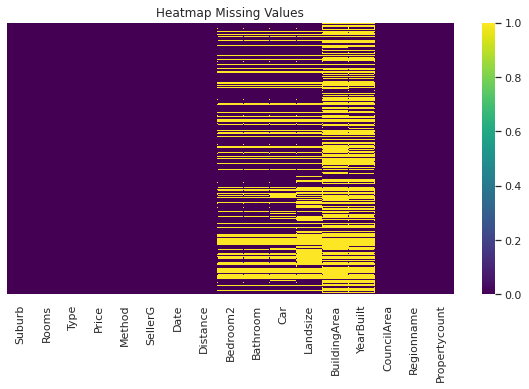

In [ ]:
# Cek Missing Values pada setiap variabel
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(Melb_housing_1.isnull(), yticklabels=False,cmap='viridis')
plt.title('Heatmap Missing Values')

In [ ]:
# Untuk memastikan lebih lanjut, dibentuk dataframe mengenai persentase missing values setiap variabel
(Melb_housing_1.isnull().sum()/len(Melb_housing_1)*100).to_frame('Persentase MV')

Persentase MV
Suburb              0.000000
Rooms               0.000000
Type                0.000000
Price               0.000000
Method              0.000000
SellerG             0.000000
Date                0.000000
Distance            0.003670
Bedroom2           23.637365
Bathroom           23.659387
Car                25.043127
Landsize           34.002569
BuildingArea       60.891907
YearBuilt          55.650578
CouncilArea         0.011011
Regionname          0.011011
Propertycount       0.011011

In [ ]:
#Karena pada variabel Building Area dan YearBuild memiliki persentase missing value >50% maka diputuskan untuk menghapus variabel tersebut
Melb_housing_2 = Melb_housing_1.drop(['BuildingArea','YearBuilt'],axis=1)
Melb_housing_2

Suburb  Rooms  ...             Regionname  Propertycount
1      Abbotsford      2  ...  Northern Metropolitan         4019.0
2      Abbotsford      2  ...  Northern Metropolitan         4019.0
4      Abbotsford      3  ...  Northern Metropolitan         4019.0
5      Abbotsford      3  ...  Northern Metropolitan         4019.0
6      Abbotsford      4  ...  Northern Metropolitan         4019.0
...           ...    ...  ...                    ...            ...
34852  Yarraville      4  ...   Western Metropolitan         6543.0
34853  Yarraville      2  ...   Western Metropolitan         6543.0
34854  Yarraville      2  ...   Western Metropolitan         6543.0
34855  Yarraville      3  ...   Western Metropolitan         6543.0
34856  Yarraville      2  ...   Western Metropolitan         6543.0

[27245 rows x 15 columns]

In [ ]:
#Pengecekan kembali Persentase Missing Values
(Melb_housing_2.isnull().sum()/len(Melb_housing_2)*100).to_frame('Persentase MV')

Persentase MV
Suburb              0.000000
Rooms               0.000000
Type                0.000000
Price               0.000000
Method              0.000000
SellerG             0.000000
Date                0.000000
Distance            0.003670
Bedroom2           23.637365
Bathroom           23.659387
Car                25.043127
Landsize           34.002569
CouncilArea         0.011011
Regionname          0.011011
Propertycount       0.011011

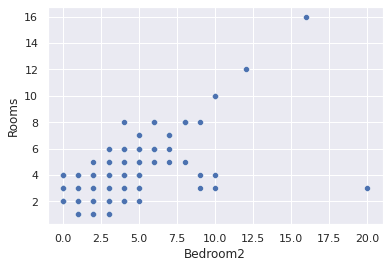

0.9587411323245832

In [ ]:
# Melihat korelasi antara variabel Bedroom2 dengan Rooms
sns.scatterplot(x='Bedroom2', y='Rooms', data=Melb_housing_2)
plt.show()

Melb_housing_2['Rooms'].corr(Melb_housing_2['Bedroom2'])

In [ ]:
# Rooms and Bedroom2 diasumsikan merepresentasikan hal yang sama karena korelasinya tinggi
# Akan dilihat bentuk representasinya dengan mengintip 8 data pertama
Melb_housing_2['RoomXBedRoom'] = Melb_housing_2['Rooms']-Melb_housing_2['Bedroom2']
Melb_housing_2[['Rooms','Bedroom2','RoomXBedRoom']].head(8)

Rooms  Bedroom2  RoomXBedRoom
1       2       2.0           0.0
2       2       2.0           0.0
4       3       3.0           0.0
5       3       3.0           0.0
6       4       3.0           1.0
10      2       2.0           0.0
11      3       4.0          -1.0
14      2       2.0           0.0

In [ ]:
#Sekitar 75% data diatas menunjukkan representasi Bedroom dan Room sama
#Akan diambil sampel untuk memastikan kembali hasil representasinya
Melb_housing_2[['Rooms','Bedroom2','RoomXBedRoom']].sample(8)

Rooms  Bedroom2  RoomXBedRoom
20318      2       2.0           0.0
21666      4       4.0           0.0
11727      2       2.0           0.0
10084      4       3.0           1.0
6328       5       NaN           NaN
26373      3       3.0           0.0
6646       2       2.0           0.0
1948       4       4.0           0.0

In [ ]:
#Karena dianggap merepresentasikan hal yang sama maka Bedroom akan di drop
Melb_housing_3 = Melb_housing_2.drop(['Bedroom2','RoomXBedRoom'],axis=1)
Melb_housing_3.head(7)

Suburb  Rooms  ...             Regionname  Propertycount
1   Abbotsford      2  ...  Northern Metropolitan         4019.0
2   Abbotsford      2  ...  Northern Metropolitan         4019.0
4   Abbotsford      3  ...  Northern Metropolitan         4019.0
5   Abbotsford      3  ...  Northern Metropolitan         4019.0
6   Abbotsford      4  ...  Northern Metropolitan         4019.0
10  Abbotsford      2  ...  Northern Metropolitan         4019.0
11  Abbotsford      3  ...  Northern Metropolitan         4019.0

[7 rows x 14 columns]

In [ ]:
#Akan didrop nilai missing values pada beberapa variabel
Melb_housing_3 = Melb_housing_3.dropna(subset=['Suburb','Type','Price','Method','SellerG','Date','Distance','CouncilArea','Regionname','Propertycount'])
Melb_housing_3

Suburb  Rooms  ...             Regionname  Propertycount
1      Abbotsford      2  ...  Northern Metropolitan         4019.0
2      Abbotsford      2  ...  Northern Metropolitan         4019.0
4      Abbotsford      3  ...  Northern Metropolitan         4019.0
5      Abbotsford      3  ...  Northern Metropolitan         4019.0
6      Abbotsford      4  ...  Northern Metropolitan         4019.0
...           ...    ...  ...                    ...            ...
34852  Yarraville      4  ...   Western Metropolitan         6543.0
34853  Yarraville      2  ...   Western Metropolitan         6543.0
34854  Yarraville      2  ...   Western Metropolitan         6543.0
34855  Yarraville      3  ...   Western Metropolitan         6543.0
34856  Yarraville      2  ...   Western Metropolitan         6543.0

[27242 rows x 14 columns]

In [ ]:
#Melakukan pengecekan akan adanya duplikasi data
Melb_housing_3[Melb_housing_3.duplicated(subset=['Suburb','Type','Price','Method','SellerG','Date','Distance','Landsize','CouncilArea','Regionname','Propertycount'])]

Suburb  Rooms  ...                  Regionname  Propertycount
2585           Burwood      4  ...       Southern Metropolitan         5678.0
7140           Niddrie      3  ...        Western Metropolitan         2291.0
7219   North Melbourne      2  ...       Northern Metropolitan         6821.0
7854    Port Melbourne      2  ...       Southern Metropolitan         8648.0
9247       South Yarra      2  ...       Southern Metropolitan        14887.0
15804     Moonee Ponds      2  ...        Western Metropolitan         6232.0
18171          Mentone      3  ...  South-Eastern Metropolitan         6162.0
18758        Thornbury      3  ...       Northern Metropolitan         8870.0
24764        Thornbury      2  ...       Northern Metropolitan         8870.0
25325        Reservoir      3  ...       Northern Metropolitan        21650.0
26004    Greensborough      3  ...       Northern Metropolitan         8524.0
27334        Spotswood      4  ...        Western Metropolitan         1223.0
28380        Beaumaris      4  ...       Southern Metropolitan         5366.0
28888        Mill Park      3  ...       Northern Metropolitan        10529.0
29918     Surrey Hills      2  ...       Southern Metropolitan         5457.0
30641          Niddrie      3  ...        Western Metropolitan         2291.0
30802         St Kilda      1  ...       Southern Metropolitan        13240.0
34144      Collingwood      2  ...       Northern Metropolitan         4553.0

[18 rows x 14 columns]

In [ ]:
#Perolehan Duplikat data akan dihapus
Melb_housing_3.drop_duplicates(inplace=True)
Melb_housing_3.duplicated().sum()

0

In [ ]:
#pengecekan kembali missing value pada data
Melb_housing_3.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Bathroom         6433
Car              6810
Landsize         9251
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
#BATHROOM
#Cek properties yang tidak memiliki bathroom
Melb_housing_3.loc[Melb_housing_3['Bathroom'] == 0].shape

(34, 14)

In [ ]:
# Ternyata ada properties yang tidak memiliki bathroom
# akan dicek secara random properties yang tidak memiliki bathroom 
Melb_housing_3.loc[Melb_housing_3['Bathroom'] == 0, ['Suburb','Rooms', 'Car', 'Landsize']].sample(5)

Suburb  Rooms  Car  Landsize
845         Balaclava      2  0.0       0.0
1549   Bentleigh East      3  0.0     456.0
1784         Brighton      3  1.0       0.0
10518          Toorak      2  0.0       0.0
228        Alphington      3  0.0     597.0

In [ ]:
#Dilakukan pengecekan berdasarkan https://www.domain.com.au/property-profile/ apa ada properties yang tidak memiliki bathroom
#Properti dengan index di atas paling tidak memiliki 1 bathroom
#sehingga diasumsikan tidak mungkin ada properti yang tidak memiliki bathroom

In [ ]:
#Melihat ciri-ciri bathroom
Melb_housing_3['Bathroom'].describe()

count    20798.000000
mean         1.591692
std          0.700896
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: Bathroom, dtype: float64

In [ ]:
#Oleh karena itu, Bathroom dengan missing values (NaN) akan diimputasi dengan nilai median dan Bathroom dengan values 0 akan diimputasi dengan nilai 1
Melb_housing_3['Bathroom'] = Melb_housing_3['Bathroom'].fillna(Melb_housing_3['Bathroom'].median(axis=0))
Melb_housing_3['Bathroom'] = Melb_housing_3['Bathroom'].replace(0,1)

In [ ]:
#Melihat deskripsi data pada variabel bathroom setelah imputasi
Melb_housing_3['Bathroom'].describe()

count    27231.000000
mean         1.453160
std          0.660295
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: Bathroom, dtype: float64

In [ ]:
#CARSPOTS
#Suatu properti mungkin aja tidak punya carspots
Melb_housing_3.loc[Melb_housing_3['Car'] == 0].shape

(1251, 14)

In [ ]:
Melb_housing_3['Car'].describe()

count    20421.000000
mean         1.715391
std          0.994250
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         18.000000
Name: Car, dtype: float64

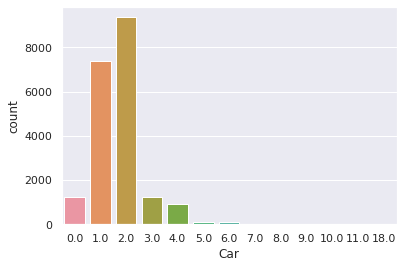

In [ ]:
#Sebelum mengisi nilai pada missing values akan dilihat persebaran data dari Car
p = sns.countplot(x="Car", data=Melb_housing_3)

In [ ]:
#Dilakukan imputasi pada missing values dengan nilai 0 karena mungkin saja suatu properti tidak memiliki carspots
Melb_housing_3['Car'] = Melb_housing_3['Car'].fillna(0)
Melb_housing_3

Suburb  Rooms  ...             Regionname  Propertycount
1      Abbotsford      2  ...  Northern Metropolitan         4019.0
2      Abbotsford      2  ...  Northern Metropolitan         4019.0
4      Abbotsford      3  ...  Northern Metropolitan         4019.0
5      Abbotsford      3  ...  Northern Metropolitan         4019.0
6      Abbotsford      4  ...  Northern Metropolitan         4019.0
...           ...    ...  ...                    ...            ...
34852  Yarraville      4  ...   Western Metropolitan         6543.0
34853  Yarraville      2  ...   Western Metropolitan         6543.0
34854  Yarraville      2  ...   Western Metropolitan         6543.0
34855  Yarraville      3  ...   Western Metropolitan         6543.0
34856  Yarraville      2  ...   Western Metropolitan         6543.0

[27231 rows x 14 columns]

In [ ]:
#Cek informasi pada Variabel Landsize untuk mengatasi missing valuesnya
Melb_housing_3['Landsize'].describe()

count     17980.000000
mean        593.525417
std        3757.472768
min           0.000000
25%         219.000000
50%         512.000000
75%         664.000000
max      433014.000000
Name: Landsize, dtype: float64

In [ ]:
Melb_housing_3.loc[(Melb_housing_3['Landsize'] == 433014),[ 'Suburb','Price', 'SellerG', 'Rooms', 'Bathroom', 'Car']]
#penasaran kenapa bisa landsize besar tapi ruangan dll sedikit

Suburb      Price SellerG  Rooms  Bathroom  Car
18036  Fitzroy  2700000.0     Kay      3       3.0  1.0

In [ ]:
#Berdasarkan https://www.realestate.com.au/property/389-gore-st-fitzroy-vic-3065 
#diperoleh jika landsize yang sebenarnya adalah 107m^2, sehingga data akan dikoreksi
def koreksi(index, column, value):    
    Melb_housing_3.loc[index, column] = value

In [ ]:
koreksi(18036, column='Landsize', value=107)

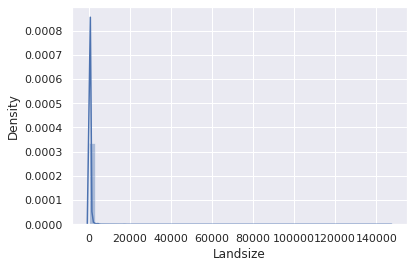

In [ ]:
#Cek distribusi pada variabel Landsize
sns.distplot(Melb_housing_3['Landsize'])

In [ ]:
#Karena Landsize tidak berdistribusi secara normal maka missing values akan diimputasi dengan Median
Melb_housing_3['Landsize'] = Melb_housing_3['Landsize'].fillna(Melb_housing_3['Landsize'].median(axis=0))
Melb_housing_3

Suburb  Rooms  ...             Regionname  Propertycount
1      Abbotsford      2  ...  Northern Metropolitan         4019.0
2      Abbotsford      2  ...  Northern Metropolitan         4019.0
4      Abbotsford      3  ...  Northern Metropolitan         4019.0
5      Abbotsford      3  ...  Northern Metropolitan         4019.0
6      Abbotsford      4  ...  Northern Metropolitan         4019.0
...           ...    ...  ...                    ...            ...
34852  Yarraville      4  ...   Western Metropolitan         6543.0
34853  Yarraville      2  ...   Western Metropolitan         6543.0
34854  Yarraville      2  ...   Western Metropolitan         6543.0
34855  Yarraville      3  ...   Western Metropolitan         6543.0
34856  Yarraville      2  ...   Western Metropolitan         6543.0

[27231 rows x 14 columns]

In [ ]:
#Berdasarkan Melb_housing_3.describe() agak tidak mungkin jika menjual property dengan ukuran luas tanahnya 0
#Pengecekan jumlah nilai 0, lalu asumsikan sebagai noise jika landsize 0 tapi memiliki room, bathroom
Melb_housing_3.loc[Melb_housing_3['Landsize'] == 0, :].info()

#Ternyata punya room, maka akan diputuskan untuk drop landsize berukuran 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 17 to 19736
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         1941 non-null   object        
 1   Rooms          1941 non-null   int64         
 2   Type           1941 non-null   object        
 3   Price          1941 non-null   float64       
 4   Method         1941 non-null   object        
 5   SellerG        1941 non-null   object        
 6   Date           1941 non-null   datetime64[ns]
 7   Distance       1941 non-null   float64       
 8   Bathroom       1941 non-null   float64       
 9   Car            1941 non-null   float64       
 10  Landsize       1941 non-null   float64       
 11  CouncilArea    1941 non-null   object        
 12  Regionname     1941 non-null   object        
 13  Propertycount  1941 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 22

In [ ]:
#Melihat deskripsi variabel Landsize
Melb_housing_3['Landsize'].describe()

count     27231.000000
mean        549.931769
std        1566.975139
min           0.000000
25%         351.000000
50%         512.000000
75%         592.000000
max      146699.000000
Name: Landsize, dtype: float64

In [ ]:
#Karena agak tidak mungkin kalau tanah luasnya 0 maka tanah dengan ukuran 0 akan didrop
Melb_housing_3 = Melb_housing_3[Melb_housing_3['Landsize']!=0]
Melb_housing_3

Suburb  Rooms  ...             Regionname  Propertycount
1      Abbotsford      2  ...  Northern Metropolitan         4019.0
2      Abbotsford      2  ...  Northern Metropolitan         4019.0
4      Abbotsford      3  ...  Northern Metropolitan         4019.0
5      Abbotsford      3  ...  Northern Metropolitan         4019.0
6      Abbotsford      4  ...  Northern Metropolitan         4019.0
...           ...    ...  ...                    ...            ...
34852  Yarraville      4  ...   Western Metropolitan         6543.0
34853  Yarraville      2  ...   Western Metropolitan         6543.0
34854  Yarraville      2  ...   Western Metropolitan         6543.0
34855  Yarraville      3  ...   Western Metropolitan         6543.0
34856  Yarraville      2  ...   Western Metropolitan         6543.0

[25290 rows x 14 columns]

In [ ]:
#Pengecekan nilai missing value
Melb_housing_3.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
#pastikan semua values 0 yang tidak mungkin sudah bersih
Melb_housing_3.describe()

Rooms         Price  ...       Landsize  Propertycount
count  25290.000000  2.529000e+04  ...   25290.000000   25290.000000
mean       3.071056  1.081468e+06  ...     592.138869    7515.483155
std        0.925757  6.479767e+05  ...    1618.294521    4513.174501
min        1.000000  1.120000e+05  ...       1.000000      83.000000
25%        2.000000  6.600000e+05  ...     459.000000    4217.000000
50%        3.000000  9.000000e+05  ...     512.000000    6543.000000
75%        4.000000  1.317375e+06  ...     605.000000   10331.000000
max       16.000000  1.120000e+07  ...  146699.000000   21650.000000

[8 rows x 7 columns]

In [ ]:
#Membuat variabel Baru yang akan diolah selanjutnya
Melb_housing_4 = Melb_housing_3
Melb_housing_4

Suburb  Rooms  ...             Regionname  Propertycount
1      Abbotsford      2  ...  Northern Metropolitan         4019.0
2      Abbotsford      2  ...  Northern Metropolitan         4019.0
4      Abbotsford      3  ...  Northern Metropolitan         4019.0
5      Abbotsford      3  ...  Northern Metropolitan         4019.0
6      Abbotsford      4  ...  Northern Metropolitan         4019.0
...           ...    ...  ...                    ...            ...
34852  Yarraville      4  ...   Western Metropolitan         6543.0
34853  Yarraville      2  ...   Western Metropolitan         6543.0
34854  Yarraville      2  ...   Western Metropolitan         6543.0
34855  Yarraville      3  ...   Western Metropolitan         6543.0
34856  Yarraville      2  ...   Western Metropolitan         6543.0

[25290 rows x 14 columns]

# **VISUALISASI**
Febby Rahma dan Esraminar Siregar

In [ ]:
Melb_housing_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25290 entries, 1 to 34856
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         25290 non-null  object        
 1   Rooms          25290 non-null  int64         
 2   Type           25290 non-null  object        
 3   Price          25290 non-null  float64       
 4   Method         25290 non-null  object        
 5   SellerG        25290 non-null  object        
 6   Date           25290 non-null  datetime64[ns]
 7   Distance       25290 non-null  float64       
 8   Bathroom       25290 non-null  float64       
 9   Car            25290 non-null  float64       
 10  Landsize       25290 non-null  float64       
 11  CouncilArea    25290 non-null  object        
 12  Regionname     25290 non-null  object        
 13  Propertycount  25290 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 2.

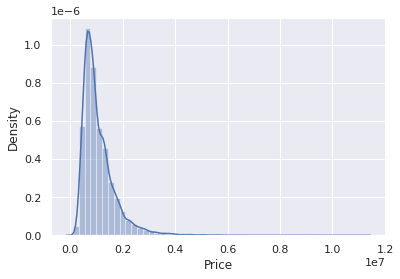

In [ ]:
sns.distplot(Melb_housing_4['Price'])

In [ ]:
pd.DataFrame(Melb_housing_4.set_index('Date')['Price'].resample('Y').sum())

Price
Date                    
2016-12-31  7.759248e+09
2017-12-31  1.585513e+10
2018-12-31  3.735946e+09

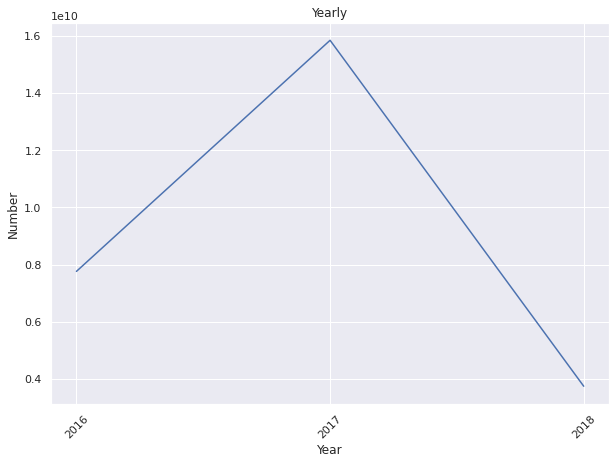

In [ ]:
ax = pd.DataFrame(Melb_housing_4.set_index('Date')['Price'].resample('Y').sum().values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('Yearly')
plt.xticks(
    range(len(Melb_housing_4.set_index('Date')['Price'].resample('Y').sum().index)), 
    [x.strftime('%Y') for x in Melb_housing_4.set_index('Date')['Price'].resample('Y').sum().index], 
    rotation=45
)
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4.set_index('Date')['Price'].resample('M').sum())

Price
Date                    
2016-01-31  2.018000e+06
2016-02-29  0.000000e+00
2016-03-31  6.765495e+08
2016-04-30  6.604155e+08
2016-05-31  8.048566e+08
2016-06-30  7.521589e+08
2016-07-31  9.749809e+08
2016-08-31  9.699021e+08
2016-09-30  5.588830e+08
2016-10-31  1.085535e+09
2016-11-30  8.405006e+08
2016-12-31  4.334483e+08
2017-01-31  3.331884e+08
2017-02-28  4.544378e+08
2017-03-31  1.394684e+09
2017-04-30  9.272457e+08
2017-05-31  1.366570e+09
2017-06-30  1.193391e+09
2017-07-31  1.299083e+09
2017-08-31  1.640147e+09
2017-09-30  2.416792e+09
2017-10-31  2.182377e+09
2017-11-30  2.161841e+09
2017-12-31  4.853686e+08
2018-01-31  1.749810e+07
2018-02-28  1.197618e+09
2018-03-31  1.605807e+09
2018-04-30  0.000000e+00
2018-05-31  0.000000e+00
2018-06-30  5.920340e+08
2018-07-31  0.000000e+00
2018-08-31  0.000000e+00
2018-09-30  0.000000e+00
2018-10-31  3.229888e+08

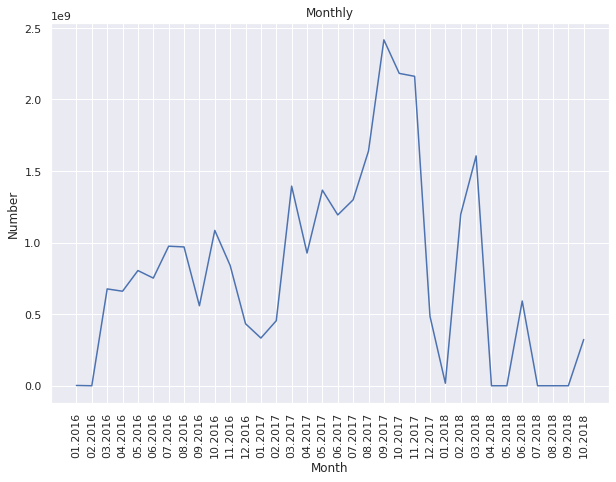

In [ ]:
ax = pd.DataFrame(Melb_housing_4.set_index('Date')['Price'].resample('M').sum().values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Month')
ax.set_ylabel('Number')
ax.set_title('Monthly')
plt.xticks(
    range(len(Melb_housing_4.set_index('Date')['Price'].resample('M').sum().index)), 
    [x.strftime('%m.%Y') for x in Melb_housing_4.set_index('Date')['Price'].resample('M').sum().index], 
    rotation=90
)
plt.show()

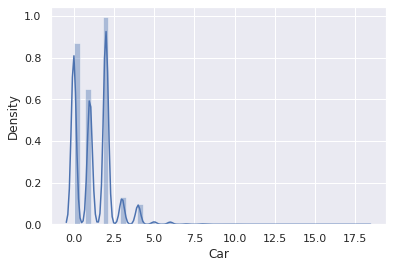

In [ ]:
sns.distplot(Melb_housing_4.Car)

In [ ]:
Cek = Melb_housing_4.groupby('Car')['Car'].count()
Cek

Car
0.0     7926
1.0     5932
2.0     9054
3.0     1213
4.0      903
5.0      113
6.0      104
7.0       18
8.0       18
9.0        2
10.0       5
11.0       1
18.0       1
Name: Car, dtype: int64

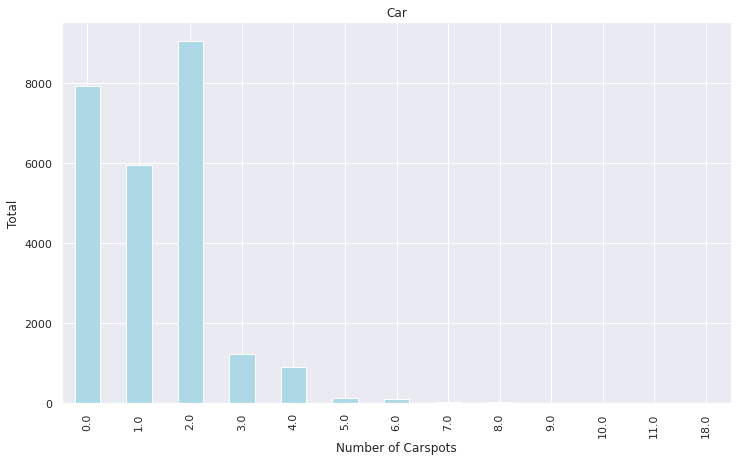

In [ ]:
ax = Cek.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='lightblue'
)

ax.set_title('Car')
ax.set_xlabel('Number of Carspots')
ax.set_ylabel('Total')
plt.show()

In [ ]:
Melb_housing_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25290 entries, 1 to 34856
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         25290 non-null  object        
 1   Rooms          25290 non-null  int64         
 2   Type           25290 non-null  object        
 3   Price          25290 non-null  float64       
 4   Method         25290 non-null  object        
 5   SellerG        25290 non-null  object        
 6   Date           25290 non-null  datetime64[ns]
 7   Distance       25290 non-null  float64       
 8   Bathroom       25290 non-null  float64       
 9   Car            25290 non-null  float64       
 10  Landsize       25290 non-null  float64       
 11  CouncilArea    25290 non-null  object        
 12  Regionname     25290 non-null  object        
 13  Propertycount  25290 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 2.

In [ ]:
Melb_housing_4.head(10)

Suburb  Rooms  ...             Regionname  Propertycount
1   Abbotsford      2  ...  Northern Metropolitan         4019.0
2   Abbotsford      2  ...  Northern Metropolitan         4019.0
4   Abbotsford      3  ...  Northern Metropolitan         4019.0
5   Abbotsford      3  ...  Northern Metropolitan         4019.0
6   Abbotsford      4  ...  Northern Metropolitan         4019.0
10  Abbotsford      2  ...  Northern Metropolitan         4019.0
11  Abbotsford      3  ...  Northern Metropolitan         4019.0
14  Abbotsford      2  ...  Northern Metropolitan         4019.0
15  Abbotsford      3  ...  Northern Metropolitan         4019.0
16  Abbotsford      2  ...  Northern Metropolitan         4019.0

[10 rows x 14 columns]

In [ ]:
# Convert objects to categorical variables
obj_cats = ['Type','Method','SellerG']

for colname in obj_cats:
    Melb_housing_4[colname] = Melb_housing_4[colname].astype('category')  

In [ ]:
Melb_housing_4['Rooms_2'] = np.where((Melb_housing_4['Rooms'] == 1), '1',  
                                       np.where ((Melb_housing_4['Rooms'] == 2), '2',
                                                np.where((Melb_housing_4['Rooms']==3), '3',
                                                        np.where((Melb_housing_4['Rooms'] == 4), '4',
                                                                np.where((Melb_housing_4['Rooms']>4) , '>4',''
                                                                                                )))))
Melb_housing_4['Bathroom_2'] = np.where((Melb_housing_4['Bathroom'] == 0), '0',  
                                       np.where ((Melb_housing_4['Bathroom'] == 1), '1',
                                                np.where((Melb_housing_4['Bathroom']==2), '2',
                                                        np.where((Melb_housing_4['Bathroom'] >2), '>2',''
                                                                                                ))))
Melb_housing_4['Car_2'] = np.where((Melb_housing_4['Car'] == 0), '0',  
                                       np.where ((Melb_housing_4['Car'] == 1), '1',
                                                np.where((Melb_housing_4['Car']==2), '2',
                                                        np.where((Melb_housing_4['Car'] >2), '>2',''
                                                                                                ))))

In [ ]:
Melb_housing_4['Rooms_2']= Melb_housing_4["Rooms_2"].astype('category')
Melb_housing_4['Bathroom_2']= Melb_housing_4["Bathroom_2"].astype('category')
Melb_housing_4['Car_2']= Melb_housing_4["Car_2"].astype('category')

In [ ]:
Melb_housing_4

Suburb  Rooms Type  ...  Rooms_2 Bathroom_2 Car_2
1      Abbotsford      2    h  ...        2          1     1
2      Abbotsford      2    h  ...        2          1     0
4      Abbotsford      3    h  ...        3          2     0
5      Abbotsford      3    h  ...        3          2     1
6      Abbotsford      4    h  ...        4          1     2
...           ...    ...  ...  ...      ...        ...   ...
34852  Yarraville      4    h  ...        4          1    >2
34853  Yarraville      2    h  ...        2          2     1
34854  Yarraville      2    t  ...        2          1     2
34855  Yarraville      3    h  ...        3          1     0
34856  Yarraville      2    h  ...        2          1     0

[25290 rows x 17 columns]

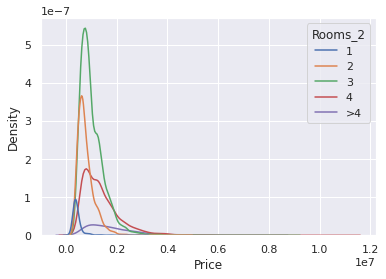

In [ ]:
sns.kdeplot(data=Melb_housing_4, x="Price", hue="Rooms_2")

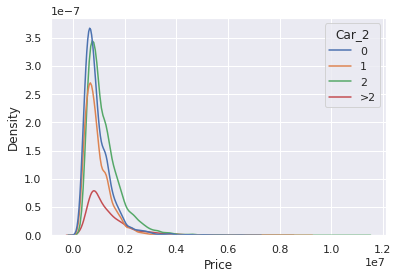

In [ ]:
sns.kdeplot(data=Melb_housing_4, x="Price", hue="Car_2")

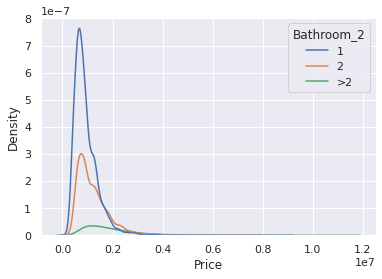

In [ ]:
sns.kdeplot(data=Melb_housing_4, x="Price", hue="Bathroom_2")

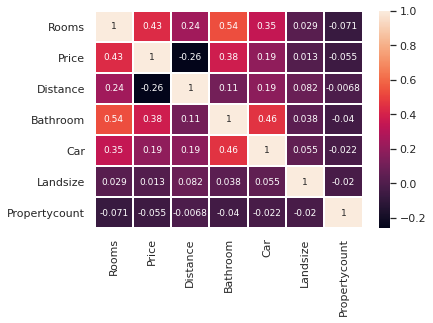

In [ ]:
sns.heatmap(Melb_housing_4.corr(),linewidth = 1,annot= True, annot_kws={"size": 9})

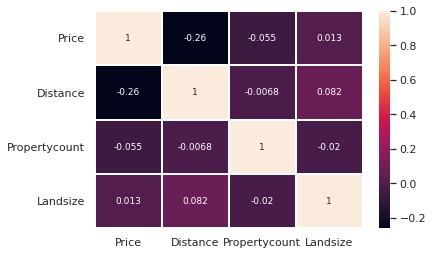

In [ ]:
sns.heatmap(Melb_housing_4[['Price','Distance','Propertycount','Landsize']].corr(),linewidth = 1,annot= True, annot_kws={"size": 9})

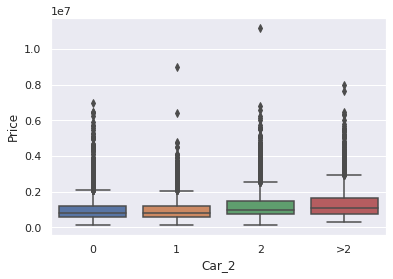

In [ ]:
ax= sns.boxplot(x="Car_2", y="Price", data=Melb_housing_4)

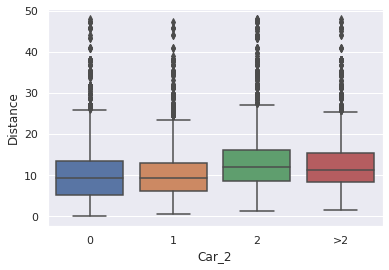

In [ ]:
ax = sns.boxplot(x="Car_2", y="Distance", data=Melb_housing_4)

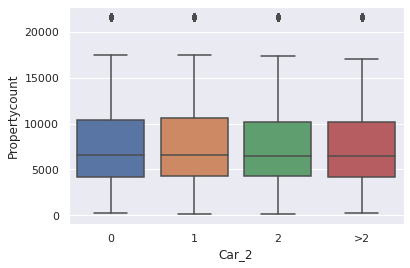

In [ ]:
ax = sns.boxplot(x="Car_2", y="Propertycount", data=Melb_housing_4)

In [ ]:
#Data tanpa outlier
#Price lebih banyak outliernya
Melb_housing_4_2 = Melb_housing_4[np.abs(Melb_housing_4.Price - Melb_housing_4.Price.mean())<=(2*Melb_housing_4.Price.std())]
Melb_housing_4_2

Suburb  Rooms Type  ...  Rooms_2 Bathroom_2 Car_2
1      Abbotsford      2    h  ...        2          1     1
2      Abbotsford      2    h  ...        2          1     0
4      Abbotsford      3    h  ...        3          2     0
5      Abbotsford      3    h  ...        3          2     1
6      Abbotsford      4    h  ...        4          1     2
...           ...    ...  ...  ...      ...        ...   ...
34852  Yarraville      4    h  ...        4          1    >2
34853  Yarraville      2    h  ...        2          2     1
34854  Yarraville      2    t  ...        2          1     2
34855  Yarraville      3    h  ...        3          1     0
34856  Yarraville      2    h  ...        2          1     0

[24201 rows x 17 columns]

In [ ]:
Melb_housing_4_2.describe()

Rooms         Price  ...       Landsize  Propertycount
count  24201.000000  2.420100e+04  ...   24201.000000   24201.000000
mean       3.023759  9.875581e+05  ...     587.711458    7519.846122
std        0.895058  4.452064e+05  ...    1651.868263    4564.001245
min        1.000000  1.120000e+05  ...       1.000000      83.000000
25%        2.000000  6.500000e+05  ...     449.000000    4181.000000
50%        3.000000  8.800000e+05  ...     512.000000    6543.000000
75%        4.000000  1.255000e+06  ...     598.000000   10412.000000
max       12.000000  2.376000e+06  ...  146699.000000   21650.000000

[8 rows x 7 columns]

In [ ]:
#Data Outlier
Melb_housing_4_3 = Melb_housing_4[np.abs(Melb_housing_4.Price - Melb_housing_4.Price.mean())>(2*Melb_housing_4.Price.std())]
Melb_housing_4_3

Suburb  Rooms Type  ...  Rooms_2 Bathroom_2 Car_2
135       Albert Park      3    h  ...        3          2     0
146       Albert Park      3    h  ...        3          1     0
152       Albert Park      3    h  ...        3          2     1
158       Albert Park      3    h  ...        3          2     1
166       Albert Park      3    h  ...        3          2     0
...               ...    ...  ...  ...      ...        ...   ...
34529    Moonee Ponds      5    h  ...       >4         >2    >2
34623  Port Melbourne      3    u  ...        3          1     0
34632         Prahran      3    h  ...        3          2     2
34714     South Yarra      3    h  ...        3          2     1
34719       Southbank      3    u  ...        3          1     0

[1089 rows x 17 columns]

In [ ]:
Melb_housing_4_3.describe()

Rooms         Price  ...     Landsize  Propertycount
count  1089.000000  1.089000e+03  ...  1089.000000    1089.000000
mean      4.122130  3.168436e+06  ...   690.529844    7418.524334
std       0.972393  8.916684e+05  ...   411.220951    3180.517493
min       1.000000  2.380000e+06  ...    95.000000     394.000000
25%       4.000000  2.600000e+06  ...   512.000000    5454.000000
50%       4.000000  2.855000e+06  ...   620.000000    7217.000000
75%       5.000000  3.400000e+06  ...   792.000000   10331.000000
max      16.000000  1.120000e+07  ...  5042.000000   17496.000000

[8 rows x 7 columns]

# Data Tanpa Outlier
Putri Triridita

In [ ]:
#Tampilan Data tanpa Outlier
Melb_housing_4_2 = Melb_housing_4[np.abs(Melb_housing_4.Price - Melb_housing_4.Price.mean())<=(2*Melb_housing_4.Price.std())]
Melb_housing_4_2.head(10)

Suburb  Rooms Type      Price  ... Propertycount Rooms_2 Bathroom_2  Car_2
1   Abbotsford      2    h  1480000.0  ...        4019.0       2          1      1
2   Abbotsford      2    h  1035000.0  ...        4019.0       2          1      0
4   Abbotsford      3    h  1465000.0  ...        4019.0       3          2      0
5   Abbotsford      3    h   850000.0  ...        4019.0       3          2      1
6   Abbotsford      4    h  1600000.0  ...        4019.0       4          1      2
10  Abbotsford      2    h   941000.0  ...        4019.0       2          1      0
11  Abbotsford      3    h  1876000.0  ...        4019.0       3          2      0
14  Abbotsford      2    h  1636000.0  ...        4019.0       2          1      2
15  Abbotsford      3    h  1000000.0  ...        4019.0       3          1      0
16  Abbotsford      2    t   745000.0  ...        4019.0       2          1      0

[10 rows x 17 columns]

*Type x Price*

Price                     
              mean       min        max
Type                                   
h     1.084698e+06  131000.0  2376000.0
t     9.175160e+05  256000.0  2350000.0
u     6.385838e+05  112000.0  2300000.0

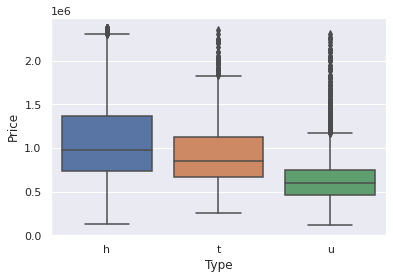

In [ ]:
ax = sns.boxplot(x="Type", y="Price", data=Melb_housing_4_2)
Melb_housing_4_2.groupby('Type').agg({"Price": ['mean',min , max]})

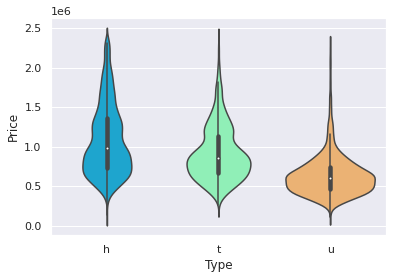

In [ ]:
p = sns.violinplot(x="Type", y="Price", data=Melb_housing_4_2,palette='rainbow')

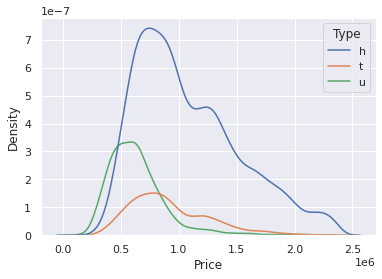

In [ ]:
sns.kdeplot(data=Melb_housing_4_2, x="Price", hue="Type")

*Method x Price*

Price                     
                mean       min        max
Method                                   
PI      1.036705e+06  121000.0  2375000.0
S       9.923675e+05  112000.0  2376000.0
SA      9.438404e+05  240000.0  2290000.0
SP      8.647938e+05  245000.0  2361000.0
VB      1.072714e+06  160000.0  2375000.0

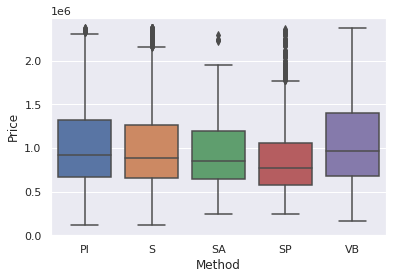

In [ ]:
ax = sns.boxplot(x="Method", y="Price", data=Melb_housing_4_2)
Melb_housing_4_2.groupby('Method').agg({"Price": ['mean',min , max]})

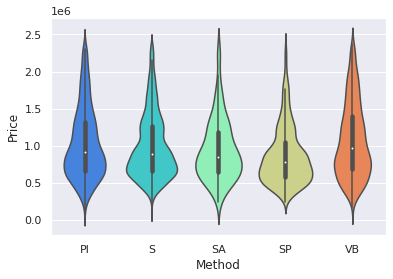

In [ ]:
p = sns.violinplot(x="Method", y="Price", data=Melb_housing_4_2,palette='rainbow')

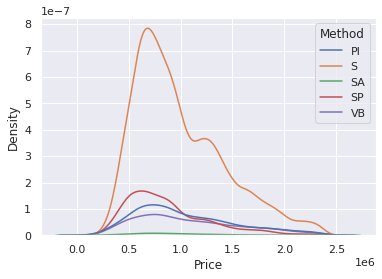

In [ ]:
sns.kdeplot(data=Melb_housing_4_2, x="Price", hue="Method")

*Regionname x Price*

Price                     
                                    mean       min        max
Regionname                                                   
Eastern Metropolitan        1.079858e+06  288000.0  2365000.0
Eastern Victoria            7.132029e+05  337000.0  2300000.0
Northern Metropolitan       8.577652e+05  121000.0  2375000.0
Northern Victoria           6.190512e+05  296000.0  1430000.0
South-Eastern Metropolitan  8.657330e+05  275000.0  2185000.0
Southern Metropolitan       1.257526e+06  112000.0  2376000.0
Western Metropolitan        8.402858e+05  145000.0  2355000.0
Western Victoria            4.326068e+05  280000.0  1152000.0

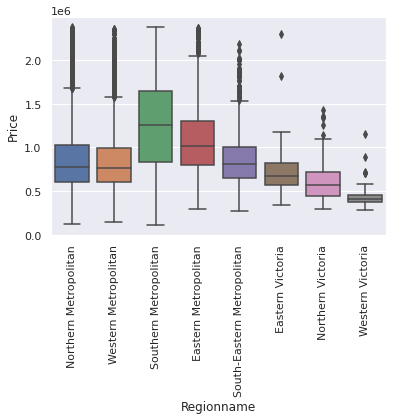

In [ ]:
ax = sns.boxplot(x="Regionname", y="Price", data=Melb_housing_4_2)
plt.xticks(rotation=90)
Melb_housing_4_2.groupby('Regionname').agg({"Price": ['mean',min , max]})

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

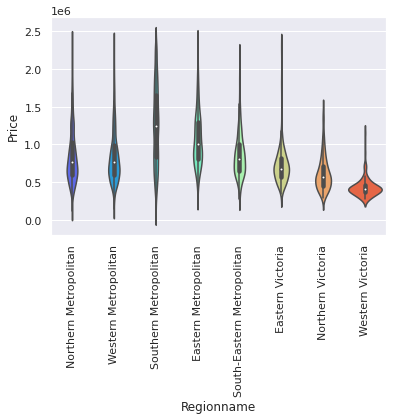

In [ ]:
p = sns.violinplot(x="Regionname", y="Price", data=Melb_housing_4_2,palette='rainbow')
plt.xticks(rotation=90)

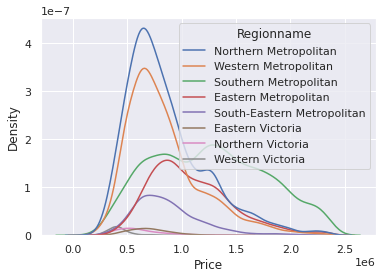

In [ ]:
sns.kdeplot(data=Melb_housing_4_2, x="Price", hue="Regionname")

*Rooms_2 x Price*

Price                     
                 mean       min        max
Rooms_2                                   
1        4.474296e+05  112000.0  2115000.0
2        7.807857e+05  230000.0  2367000.0
3        9.926690e+05  256000.0  2375000.0
4        1.194710e+06  131000.0  2376000.0
>4       1.359981e+06  355000.0  2375000.0

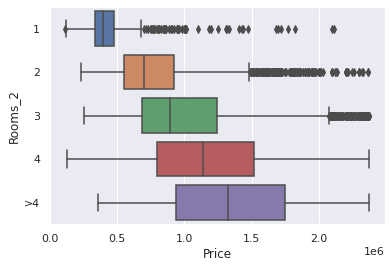

In [ ]:
ax = sns.boxplot(x="Price", y="Rooms_2", data=Melb_housing_4_2)
Melb_housing_4_2.groupby('Rooms_2').agg({"Price": ['mean',min , max]})

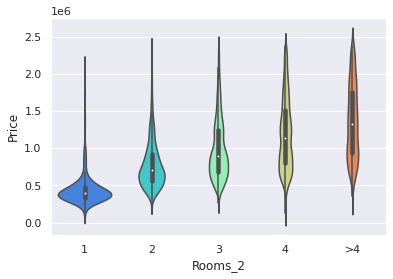

In [ ]:
p = sns.violinplot(x="Rooms_2", y="Price", data=Melb_housing_4_2,palette='rainbow')

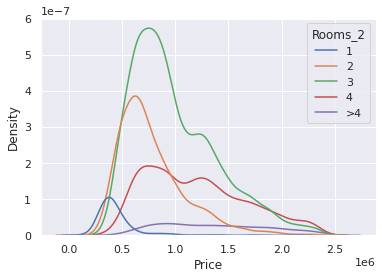

In [ ]:
sns.kdeplot(data=Melb_housing_4_2, x="Price", hue="Rooms_2")

*Bathroom_2 x Price*

Price                     
                    mean       min        max
Bathroom_2                                   
1           8.942406e+05  112000.0  2368000.0
2           1.102447e+06  320000.0  2376000.0
>2          1.401345e+06  440000.0  2375000.0

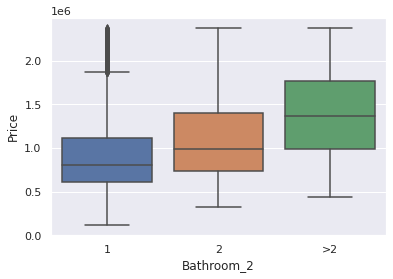

In [ ]:
ax = sns.boxplot(x="Bathroom_2", y="Price", data=Melb_housing_4_2)
Melb_housing_4_2.groupby('Bathroom_2').agg({"Price": ['mean',min , max]})

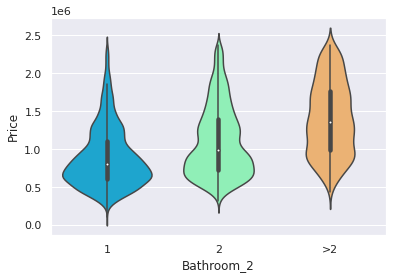

In [ ]:
p = sns.violinplot(x="Bathroom_2", y="Price", data=Melb_housing_4_2,palette='rainbow')

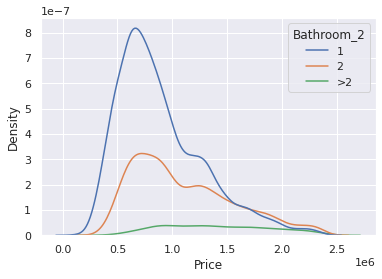

In [ ]:
sns.kdeplot(data=Melb_housing_4_2, x="Price", hue="Bathroom_2")

*Car_2 x Price*

Price                     
               mean       min        max
Car_2                                   
0      9.019469e+05  112000.0  2365000.0
1      9.118412e+05  145000.0  2375000.0
2      1.082926e+06  131000.0  2376000.0
>2     1.122555e+06  295000.0  2368000.0

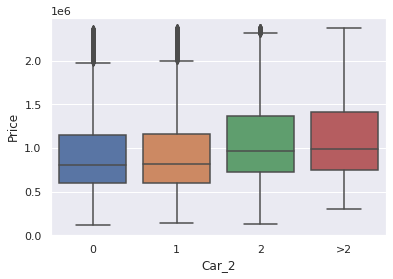

In [ ]:
ax = sns.boxplot(x="Car_2", y="Price", data=Melb_housing_4_2)
Melb_housing_4_2.groupby('Car_2').agg({"Price": ['mean',min , max]})

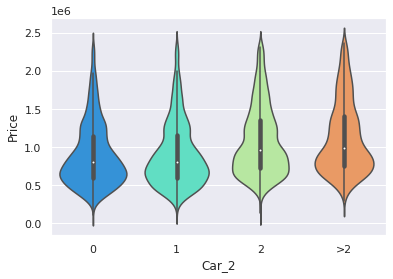

In [ ]:
p = sns.violinplot(x="Car_2", y="Price", data=Melb_housing_4_2,palette='rainbow')

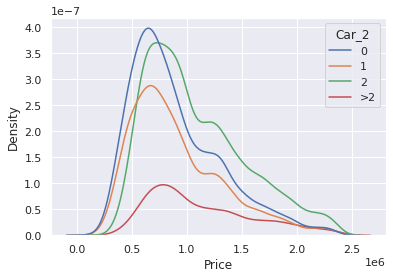

In [ ]:
sns.kdeplot(data=Melb_housing_4_2, x="Price", hue="Car_2")

**Distplot**

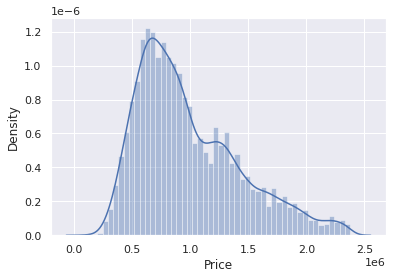

In [ ]:
sns.distplot(Melb_housing_4_2['Price'])

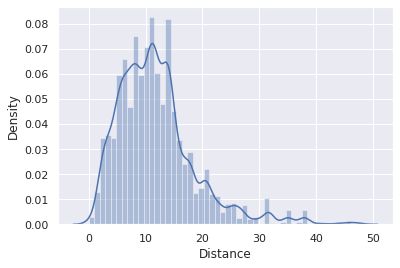

In [ ]:
sns.distplot(Melb_housing_4_2['Distance'])

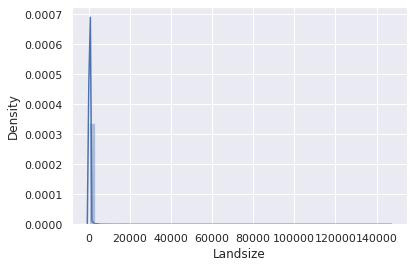

In [ ]:
sns.distplot(Melb_housing_4_2['Landsize'])

**Pie Chart**

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Type')['Type'].count())

Type
Type       
h     17245
t      2697
u      4259

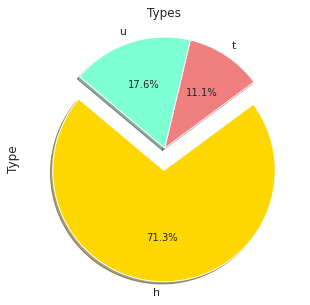

In [ ]:
ax = Melb_housing_4_2.groupby('Type')['Type'].count().plot(
    kind='pie',
    figsize=(5, 5),
    colors = ['gold','lightcoral', 'aquamarine'],
    labels = ['h','t','u'],
    explode = (0.2, 0, 0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Types')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Method')['Method'].count())

Method
Method        
PI        2835
S        15787
SA         173
SP        3213
VB        2193

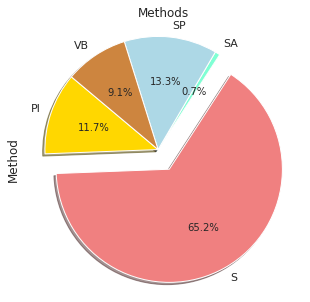

In [ ]:
ax = Melb_housing_4_2.groupby('Method')['Method'].count().plot(
    kind='pie',
    figsize=(5, 5),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue', 'peru'],
    labels = ['PI','S','SA','SP','VB'],
    explode = (0, 0.2, 0,0,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Methods')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Regionname')['Regionname'].count())

Regionname
Regionname                            
Eastern Metropolitan              3161
Eastern Victoria                   165
Northern Metropolitan             7200
Northern Victoria                  166
South-Eastern Metropolitan        1322
Southern Metropolitan             6577
Western Metropolitan              5514
Western Victoria                    96

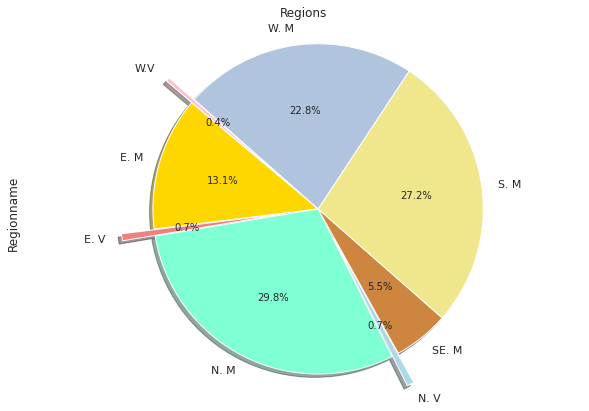

In [ ]:
ax = Melb_housing_4_2.groupby('Regionname')['Regionname'].count().plot(
    kind='pie',
    figsize=(10, 7),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue', 'peru','khaki','lightsteelblue','pink'],
    labels = ['E. M','E. V','N. M','N. V','SE. M','S. M','W. M','W.V'],
    explode = (0, 0.2, 0,0.2,0,0,0,0.2) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Regions')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Rooms_2')['Rooms_2'].count())

Rooms_2
Rooms_2         
1            745
2           5600
3          11452
4           5344
>4          1060

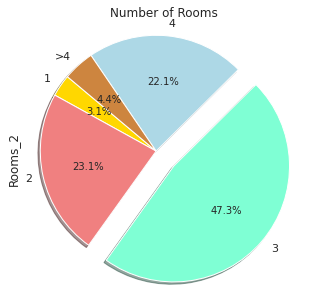

In [ ]:
ax = Melb_housing_4_2.groupby('Rooms_2')['Rooms_2'].count().plot(
    kind='pie',
    figsize=(5, 5),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue', 'peru'],
    labels = ['1','2','3','4','>4'],
    explode = (0, 0, 0.2,0,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Number of Rooms')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Bathroom_2')['Bathroom_2'].count())

Bathroom_2
Bathroom_2            
1                15242
2                 7644
>2                1315

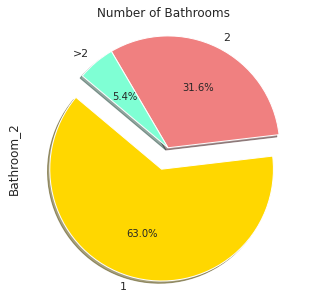

In [ ]:
ax = Melb_housing_4_2.groupby('Bathroom_2')['Bathroom_2'].count().plot(
    kind='pie',
    figsize=(5, 5),
    colors = ['gold','lightcoral', 'aquamarine'],
    labels = ['1','2','>2'],
    explode = (0.2, 0,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Number of Bathrooms')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Car_2')['Car_2'].count())

Car_2
Car_2       
0       7712
1       5829
2       8516
>2      2144

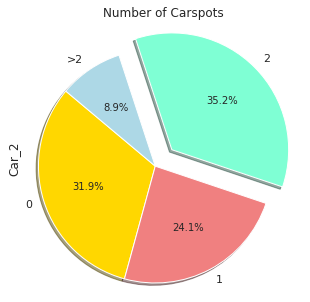

In [ ]:
ax = Melb_housing_4_2.groupby('Car_2')['Car_2'].count().plot(
    kind='pie',
    figsize=(5, 5),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue'],
    labels = ['0','1','2','>2'],
    explode = (0, 0, 0.2,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Number of Carspots')
plt.show()

In [ ]:
region = pd.DataFrame(Melb_housing_4_2.groupby('Regionname').agg({"Price":[min, max,'mean']}))
region

Price                         
                                 min        max          mean
Regionname                                                   
Eastern Metropolitan        288000.0  2365000.0  1.079858e+06
Eastern Victoria            337000.0  2300000.0  7.132029e+05
Northern Metropolitan       121000.0  2375000.0  8.577652e+05
Northern Victoria           296000.0  1430000.0  6.190512e+05
South-Eastern Metropolitan  275000.0  2185000.0  8.657330e+05
Southern Metropolitan       112000.0  2376000.0  1.257526e+06
Western Metropolitan        145000.0  2355000.0  8.402858e+05
Western Victoria            280000.0  1152000.0  4.326068e+05

In [ ]:
region2 = region.reset_index()
region2

Regionname     Price                         
                                    min        max          mean
0        Eastern Metropolitan  288000.0  2365000.0  1.079858e+06
1            Eastern Victoria  337000.0  2300000.0  7.132029e+05
2       Northern Metropolitan  121000.0  2375000.0  8.577652e+05
3           Northern Victoria  296000.0  1430000.0  6.190512e+05
4  South-Eastern Metropolitan  275000.0  2185000.0  8.657330e+05
5       Southern Metropolitan  112000.0  2376000.0  1.257526e+06
6        Western Metropolitan  145000.0  2355000.0  8.402858e+05
7            Western Victoria  280000.0  1152000.0  4.326068e+05

In [ ]:
region2.sort_values(('Price','mean'),ascending=False).head(3)

Regionname     Price                         
                                    min        max          mean
5       Southern Metropolitan  112000.0  2376000.0  1.257526e+06
0        Eastern Metropolitan  288000.0  2365000.0  1.079858e+06
4  South-Eastern Metropolitan  275000.0  2185000.0  8.657330e+05

In [ ]:
region2.sort_values(('Price','mean'),ascending=True).head(3)

Regionname     Price                          
                           min        max           mean
7   Western Victoria  280000.0  1152000.0  432606.770833
3  Northern Victoria  296000.0  1430000.0  619051.204819
1   Eastern Victoria  337000.0  2300000.0  713202.921212

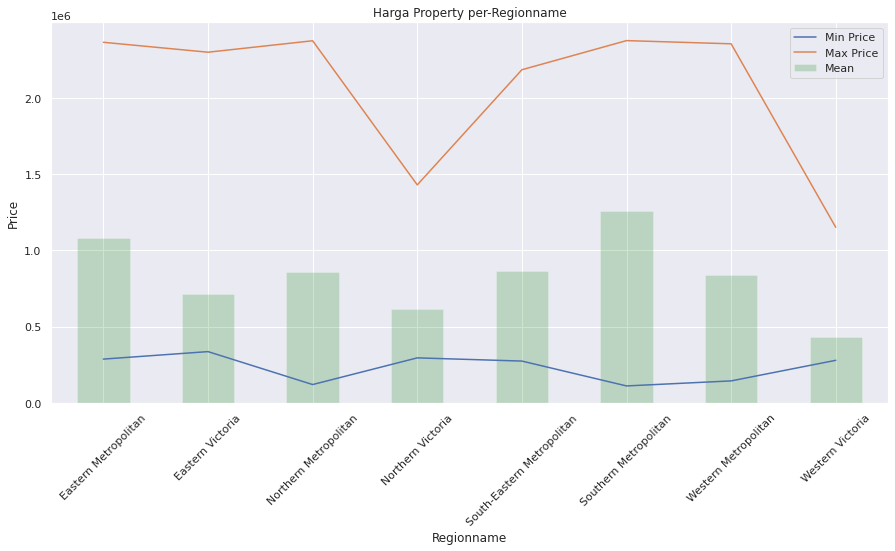

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby('Regionname').agg({"Price":[min]})).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby('Regionname').agg({"Price":[max]})).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby('Regionname').agg({"Price":['mean']}))).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Regionname')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-Regionname')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')
plt.xticks(rotation=45)

plt.show()

In [ ]:
suburb_price = pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean']})).sort_values(('Price', 'mean'),ascending=False).head(5)
suburb_price

Price                         
                    max        min          mean
Suburb                                          
Wonga Park    1815000.0  1815000.0  1.815000e+06
Albert Park   2340000.0   420000.0  1.663676e+06
Middle Park   2360000.0   535000.0  1.625882e+06
Kew East      2375000.0   590000.0  1.622330e+06
Balwyn North  2367000.0   555500.0  1.621335e+06

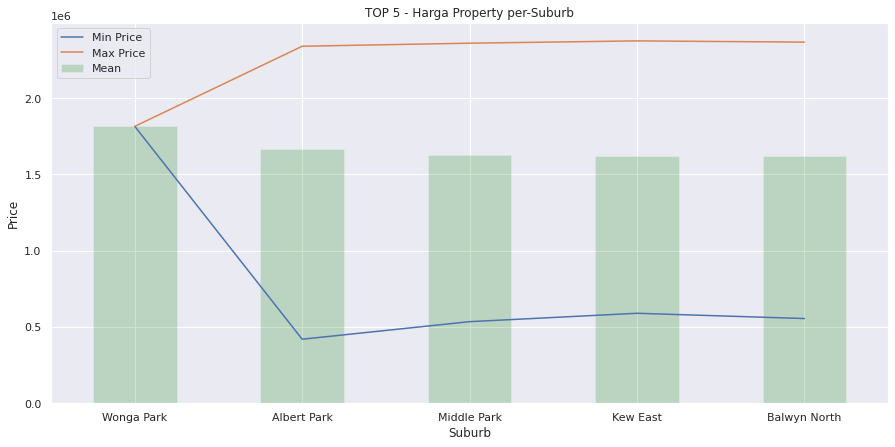

In [ ]:
ax = pd.DataFrame(suburb_price[('Price',  'min')].values).plot(
    figsize=(15,7)
)
pd.DataFrame(suburb_price[('Price',  'max')].values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame((suburb_price[('Price',  'mean')])).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Suburb')
ax.set_ylabel('Price')
ax.set_title('TOP 5 - Harga Property per-Suburb')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')
plt.xticks(rotation=0)

plt.show()

In [ ]:
suburb_price2 = pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean']})).sort_values(('Price', 'mean'),ascending=True).head(5)
suburb_price2

Price                         
                     max       min           mean
Suburb                                           
Darley          380000.0  380000.0  380000.000000
Kurunjang       565000.0  296000.0  380653.846154
Bacchus Marsh   545000.0  285000.0  423000.000000
Melton South   1152000.0  280000.0  423691.964286
Melton          710000.0  283000.0  434583.333333

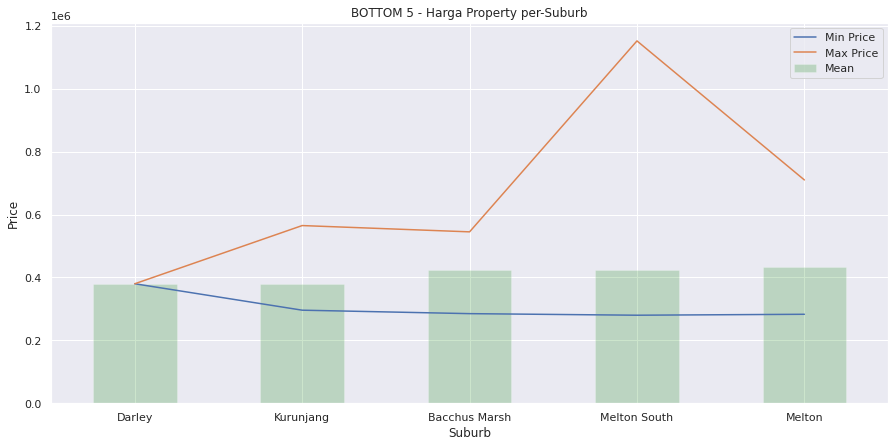

In [ ]:
ax = pd.DataFrame(suburb_price2[('Price',  'min')].values).plot(
    figsize=(15,7)
)
pd.DataFrame(suburb_price2[('Price',  'max')].values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame((suburb_price2[('Price',  'mean')])).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Suburb')
ax.set_ylabel('Price')
ax.set_title('BOTTOM 5 - Harga Property per-Suburb')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')
plt.xticks(rotation=0)

plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Type"])['Price'].count())

Price
Regionname                 Type       
Eastern Metropolitan       h      2483
                           t       283
                           u       395
Eastern Victoria           h       158
                           t         2
                           u         5
Northern Metropolitan      h      5172
                           t       807
                           u      1221
Northern Victoria          h       162
                           t         1
                           u         3
South-Eastern Metropolitan h      1029
                           t       115
                           u       178
Southern Metropolitan      h      3791
                           t       941
                           u      1845
Western Metropolitan       h      4356
                           t       548
                           u       610
Western Victoria           h        94
                           t         0
                           u         2

Text(0, 0.5, 'Total')

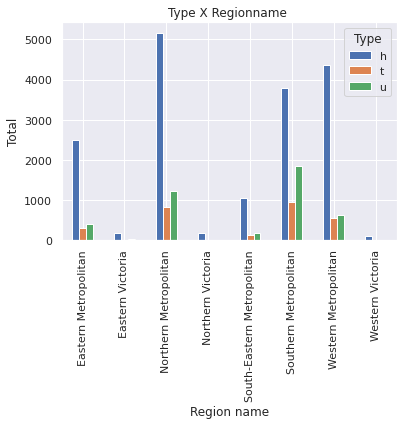

In [ ]:
counts = Melb_housing_4_2.groupby(["Regionname", "Type"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Regionname ")
plt.xticks(rotation=90)
plt.xlabel("Region name")
plt.ylabel("Total")

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

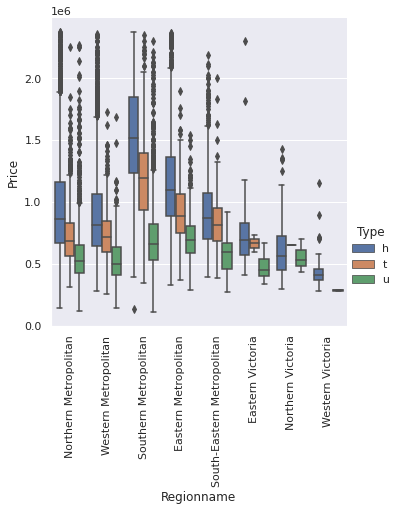

In [ ]:
p = sns.catplot(y="Price", x="Regionname", hue="Type", kind="box", data=Melb_housing_4_2)
plt.xticks(rotation=90)

In [ ]:
region_type = pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Type"]).agg({"Price":[min, max,'mean']})).fillna(0)
region_type

Price                         
                                      min        max          mean
Regionname                 Type                                   
Eastern Metropolitan       h     330000.0  2365000.0  1.156318e+06
                           t     370000.0  1900000.0  9.236877e+05
                           u     288000.0  1542000.0  7.111128e+05
Eastern Victoria           h     410500.0  2300000.0  7.212815e+05
                           t     595000.0   735000.0  6.650000e+05
                           u     337000.0   665000.0  4.772000e+05
Northern Metropolitan      h     145000.0  2375000.0  9.462429e+05
                           t     310000.0  2250000.0  7.238067e+05
                           u     121000.0  2265000.0  5.715226e+05
Northern Victoria          h     296000.0  1430000.0  6.200957e+05
                           t     648000.0   648000.0  6.480000e+05
                           u     430000.0   699000.0  5.530000e+05
South-Eastern Metropolitan h     396000.0  2185000.0  9.182514e+05
                           t     386000.0  2006000.0  8.512630e+05
                           u     275000.0   917000.0  5.714775e+05
Southern Metropolitan      h     131000.0  2376000.0  1.538984e+06
                           t     345000.0  2350000.0  1.196489e+06
                           u     112000.0  2300000.0  7.103310e+05
Western Metropolitan       h     280000.0  2355000.0  8.966872e+05
                           t     256000.0  1731000.0  7.358679e+05
                           u     145000.0  1685000.0  5.313293e+05
Western Victoria           h     280500.0  1152000.0  4.357473e+05
                           t          0.0        0.0  0.000000e+00
                           u     280000.0   290000.0  2.850000e+05

In [ ]:
region_type2 = region_type.reset_index()
region_type2

Regionname Type     Price                         
                                          min        max          mean
0         Eastern Metropolitan    h  330000.0  2365000.0  1.156318e+06
1         Eastern Metropolitan    t  370000.0  1900000.0  9.236877e+05
2         Eastern Metropolitan    u  288000.0  1542000.0  7.111128e+05
3             Eastern Victoria    h  410500.0  2300000.0  7.212815e+05
4             Eastern Victoria    t  595000.0   735000.0  6.650000e+05
5             Eastern Victoria    u  337000.0   665000.0  4.772000e+05
6        Northern Metropolitan    h  145000.0  2375000.0  9.462429e+05
7        Northern Metropolitan    t  310000.0  2250000.0  7.238067e+05
8        Northern Metropolitan    u  121000.0  2265000.0  5.715226e+05
9            Northern Victoria    h  296000.0  1430000.0  6.200957e+05
10           Northern Victoria    t  648000.0   648000.0  6.480000e+05
11           Northern Victoria    u  430000.0   699000.0  5.530000e+05
12  South-Eastern Metropolitan    h  396000.0  2185000.0  9.182514e+05
13  South-Eastern Metropolitan    t  386000.0  2006000.0  8.512630e+05
14  South-Eastern Metropolitan    u  275000.0   917000.0  5.714775e+05
15       Southern Metropolitan    h  131000.0  2376000.0  1.538984e+06
16       Southern Metropolitan    t  345000.0  2350000.0  1.196489e+06
17       Southern Metropolitan    u  112000.0  2300000.0  7.103310e+05
18        Western Metropolitan    h  280000.0  2355000.0  8.966872e+05
19        Western Metropolitan    t  256000.0  1731000.0  7.358679e+05
20        Western Metropolitan    u  145000.0  1685000.0  5.313293e+05
21            Western Victoria    h  280500.0  1152000.0  4.357473e+05
22            Western Victoria    t       0.0        0.0  0.000000e+00
23            Western Victoria    u  280000.0   290000.0  2.850000e+05

In [ ]:
region_type2.sort_values(('Price', 'mean'), ascending=False).head(3)

Regionname Type     Price                         
                                     min        max          mean
15  Southern Metropolitan    h  131000.0  2376000.0  1.538984e+06
16  Southern Metropolitan    t  345000.0  2350000.0  1.196489e+06
0    Eastern Metropolitan    h  330000.0  2365000.0  1.156318e+06

In [ ]:
region_type2.sort_values(('Price', 'mean'), ascending=True).head(3)

Regionname Type     Price                          
                                min        max           mean
22  Western Victoria    t       0.0        0.0       0.000000
23  Western Victoria    u  280000.0   290000.0  285000.000000
21  Western Victoria    h  280500.0  1152000.0  435747.340426

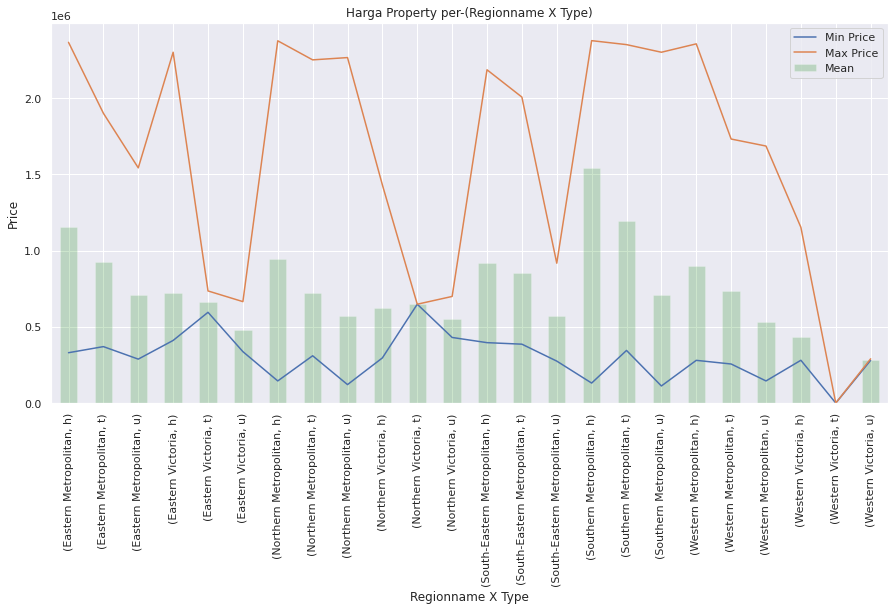

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Type"]).agg({"Price":[min]})).fillna(0).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Type"]).agg({"Price":[max]})).fillna(0).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Type"]).agg({"Price":['mean']})).fillna(0)).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('Regionname X Type')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-(Regionname X Type)')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')

plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Method"])['Price'].count())

Price
Regionname                 Method       
Eastern Metropolitan       PI        405
                           S        2072
                           SA         32
                           SP        339
                           VB        313
Eastern Victoria           PI         11
                           S          97
                           SA          5
                           SP         38
                           VB         14
Northern Metropolitan      PI        740
                           S        4878
                           SA         43
                           SP        999
                           VB        540
Northern Victoria          PI          6
                           S         109
                           SA          2
                           SP         39
                           VB         10
South-Eastern Metropolitan PI        121
                           S         918
                           SA         14
                           SP        197
                           VB         72
Southern Metropolitan      PI        936
                           S        4202
                           SA         46
                           SP        541
                           VB        852
Western Metropolitan       PI        612
                           S        3442
                           SA         31
                           SP       1040
                           VB        389
Western Victoria           PI          4
                           S          69
                           SA          0
                           SP         20
                           VB          3

Text(0, 0.5, 'Total')

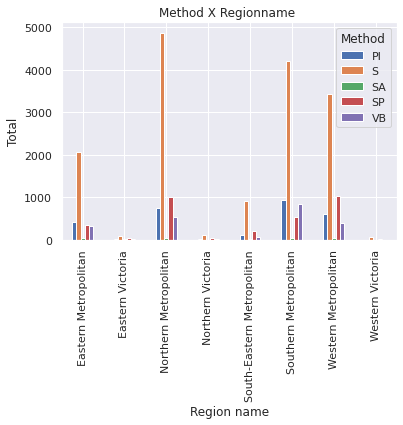

In [ ]:
counts = Melb_housing_4_2.groupby(["Regionname", "Method"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Method X Regionname ")
plt.xticks(rotation=90)
plt.xlabel("Region name")
plt.ylabel("Total")

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

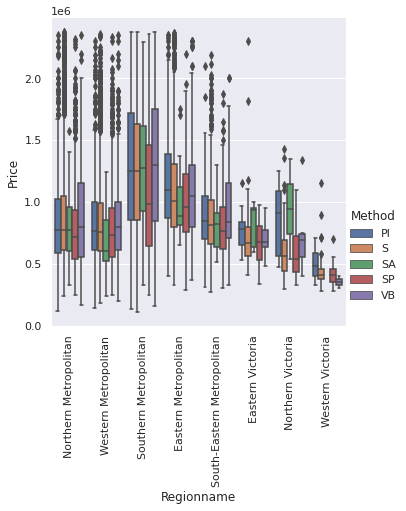

In [ ]:
p = sns.catplot(y="Price", x="Regionname", hue="Method", kind="box", data=Melb_housing_4_2)
plt.xticks(rotation=90)

In [ ]:
region_method = pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Method"]).agg({"Price":[min, max,'mean']}))
region_method

Price                         
                                        min        max          mean
Regionname                 Method                                   
Eastern Metropolitan       PI      400000.0  2350000.0  1.149425e+06
                           S       325000.0  2365000.0  1.078358e+06
                           SA      650000.0  1750000.0  9.838594e+05
                           SP      288000.0  2200000.0  1.008210e+06
                           VB      370000.0  2300000.0  1.087188e+06
Eastern Victoria           PI      530000.0  1150000.0  7.717727e+05
                           S       410500.0  2300000.0  7.188866e+05
                           SA      595000.0  1000000.0  8.230000e+05
                           SP      337000.0   975000.0  6.700522e+05
                           VB      485000.0   950000.0  7.057143e+05
Northern Metropolitan      PI      121000.0  2350000.0  8.453757e+05
                           S       237000.0  2375000.0  8.701484e+05
                           SA      328000.0  1575000.0  8.117648e+05
                           SP      250000.0  2315000.0  7.883832e+05
                           VB      170000.0  2350000.0  8.949019e+05
Northern Victoria          PI      470000.0  1250000.0  8.558333e+05
                           S       296000.0  1430000.0  6.013119e+05
                           SA      540000.0  1350000.0  9.450000e+05
                           SP      330000.0  1100000.0  5.975513e+05
                           VB      400000.0  1340000.0  6.890000e+05
South-Eastern Metropolitan PI      315000.0  2100000.0  8.786983e+05
                           S       275000.0  2185000.0  8.716010e+05
                           SA      510000.0  1300000.0  8.023571e+05
                           SP      300000.0  1870000.0  8.068466e+05
                           VB      330000.0  2000000.0  9.425694e+05
Southern Metropolitan      PI      131000.0  2375000.0  1.285634e+06
                           S       112000.0  2376000.0  1.264419e+06
                           SA      330000.0  2290000.0  1.272663e+06
                           SP      250000.0  2361000.0  1.090487e+06
                           VB      160000.0  2375000.0  1.297899e+06
Western Metropolitan       PI      145000.0  2300000.0  8.540088e+05
                           S       185000.0  2355000.0  8.451433e+05
                           SA      240000.0  1240000.0  6.811129e+05
                           SP      245000.0  2335000.0  8.107259e+05
                           VB      200000.0  2350000.0  8.674293e+05
Western Victoria           PI      330000.0   710000.0  5.025000e+05
                           S       280500.0  1152000.0  4.360761e+05
                           SA           NaN        NaN           NaN
                           SP      280000.0   700000.0  4.190500e+05
                           VB      300000.0   400000.0  3.500000e+05

In [ ]:
region_method2 = region_method.reset_index()
region_method2

Regionname Method     Price                         
                                            min        max          mean
0         Eastern Metropolitan     PI  400000.0  2350000.0  1.149425e+06
1         Eastern Metropolitan      S  325000.0  2365000.0  1.078358e+06
2         Eastern Metropolitan     SA  650000.0  1750000.0  9.838594e+05
3         Eastern Metropolitan     SP  288000.0  2200000.0  1.008210e+06
4         Eastern Metropolitan     VB  370000.0  2300000.0  1.087188e+06
5             Eastern Victoria     PI  530000.0  1150000.0  7.717727e+05
6             Eastern Victoria      S  410500.0  2300000.0  7.188866e+05
7             Eastern Victoria     SA  595000.0  1000000.0  8.230000e+05
8             Eastern Victoria     SP  337000.0   975000.0  6.700522e+05
9             Eastern Victoria     VB  485000.0   950000.0  7.057143e+05
10       Northern Metropolitan     PI  121000.0  2350000.0  8.453757e+05
11       Northern Metropolitan      S  237000.0  2375000.0  8.701484e+05
12       Northern Metropolitan     SA  328000.0  1575000.0  8.117648e+05
13       Northern Metropolitan     SP  250000.0  2315000.0  7.883832e+05
14       Northern Metropolitan     VB  170000.0  2350000.0  8.949019e+05
15           Northern Victoria     PI  470000.0  1250000.0  8.558333e+05
16           Northern Victoria      S  296000.0  1430000.0  6.013119e+05
17           Northern Victoria     SA  540000.0  1350000.0  9.450000e+05
18           Northern Victoria     SP  330000.0  1100000.0  5.975513e+05
19           Northern Victoria     VB  400000.0  1340000.0  6.890000e+05
20  South-Eastern Metropolitan     PI  315000.0  2100000.0  8.786983e+05
21  South-Eastern Metropolitan      S  275000.0  2185000.0  8.716010e+05
22  South-Eastern Metropolitan     SA  510000.0  1300000.0  8.023571e+05
23  South-Eastern Metropolitan     SP  300000.0  1870000.0  8.068466e+05
24  South-Eastern Metropolitan     VB  330000.0  2000000.0  9.425694e+05
25       Southern Metropolitan     PI  131000.0  2375000.0  1.285634e+06
26       Southern Metropolitan      S  112000.0  2376000.0  1.264419e+06
27       Southern Metropolitan     SA  330000.0  2290000.0  1.272663e+06
28       Southern Metropolitan     SP  250000.0  2361000.0  1.090487e+06
29       Southern Metropolitan     VB  160000.0  2375000.0  1.297899e+06
30        Western Metropolitan     PI  145000.0  2300000.0  8.540088e+05
31        Western Metropolitan      S  185000.0  2355000.0  8.451433e+05
32        Western Metropolitan     SA  240000.0  1240000.0  6.811129e+05
33        Western Metropolitan     SP  245000.0  2335000.0  8.107259e+05
34        Western Metropolitan     VB  200000.0  2350000.0  8.674293e+05
35            Western Victoria     PI  330000.0   710000.0  5.025000e+05
36            Western Victoria      S  280500.0  1152000.0  4.360761e+05
37            Western Victoria     SA       NaN        NaN           NaN
38            Western Victoria     SP  280000.0   700000.0  4.190500e+05
39            Western Victoria     VB  300000.0   400000.0  3.500000e+05

In [ ]:
region_method2.sort_values(('Price','mean'),ascending=False).head(3)

Regionname Method     Price                         
                                       min        max          mean
29  Southern Metropolitan     VB  160000.0  2375000.0  1.297899e+06
25  Southern Metropolitan     PI  131000.0  2375000.0  1.285634e+06
27  Southern Metropolitan     SA  330000.0  2290000.0  1.272663e+06

In [ ]:
region_method2.sort_values(('Price','mean'),ascending=True).head(3)

Regionname Method     Price                          
                                  min        max           mean
39  Western Victoria     VB  300000.0   400000.0  350000.000000
38  Western Victoria     SP  280000.0   700000.0  419050.000000
36  Western Victoria      S  280500.0  1152000.0  436076.086957

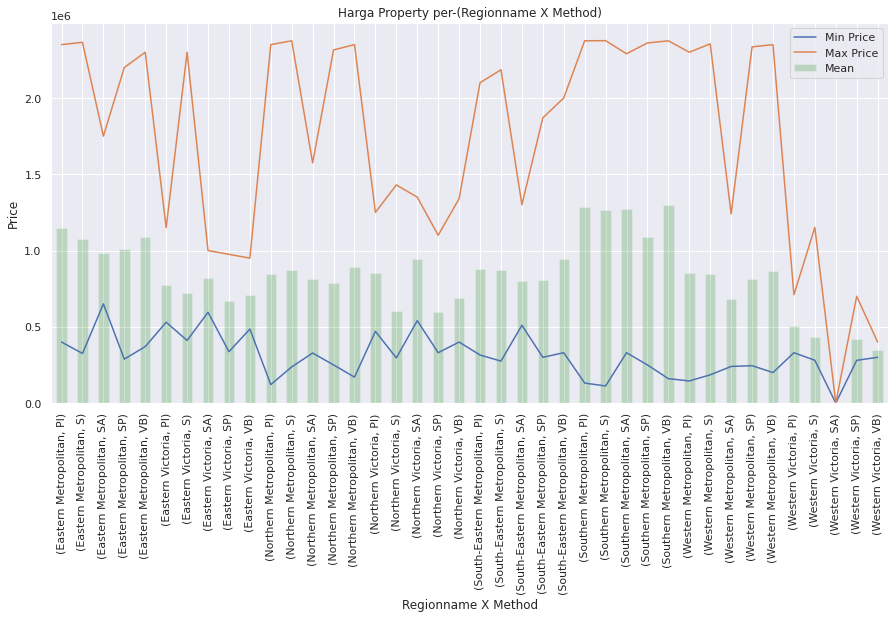

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Method"]).agg({"Price":[min]})).fillna(0).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Method"]).agg({"Price":[max]})).fillna(0).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Regionname", "Method"]).agg({"Price":['mean']})).fillna(0)).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('Regionname X Method')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-(Regionname X Method)')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')

plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby(["Method", "Type"])['Price'].count())

Price
Method Type       
PI     h      1955
       t       413
       u       467
S      h     11574
       t      1601
       u      2612
SA     h       128
       t        20
       u        25
SP     h      2148
       t       355
       u       710
VB     h      1440
       t       308
       u       445

Text(0, 0.5, 'Total')

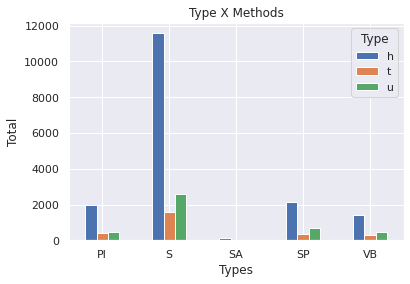

In [ ]:
counts = Melb_housing_4_2.groupby(["Method", "Type"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Methods")
plt.xticks(rotation=0)
plt.xlabel("Types")
plt.ylabel("Total")

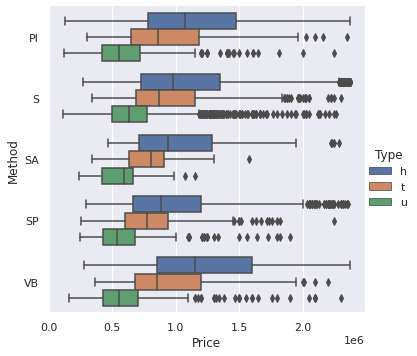

In [ ]:
p = sns.catplot(x="Price", y="Method", hue="Type", kind="box", data=Melb_housing_4_2)

In [ ]:
method_type = pd.DataFrame(Melb_housing_4_2.groupby(["Method", "Type"]).agg({"Price":[min, max,'mean']}))
method_type

Price                         
                  min        max          mean
Method Type                                   
PI     h     131000.0  2375000.0  1.162011e+06
       t     300000.0  2350000.0  9.305266e+05
       u     121000.0  2250000.0  6.060396e+05
S      h     273000.0  2376000.0  1.074807e+06
       t     340000.0  2300000.0  9.297732e+05
       u     112000.0  2265000.0  6.654381e+05
SA     h     465000.0  2290000.0  1.032429e+06
       t     339000.0  1575000.0  8.293750e+05
       u     240000.0  1155000.0  5.818400e+05
SP     h     295000.0  2361000.0  9.679662e+05
       t     256000.0  2250000.0  8.133910e+05
       u     245000.0  1900000.0  5.783625e+05
VB     h     280000.0  2375000.0  1.238012e+06
       t     360000.0  2200000.0  9.620942e+05
       u     160000.0  2300000.0  6.143820e+05

In [ ]:
method_type2 = method_type.reset_index()
method_type2

Method Type     Price                         
                     min        max          mean
0      PI    h  131000.0  2375000.0  1.162011e+06
1      PI    t  300000.0  2350000.0  9.305266e+05
2      PI    u  121000.0  2250000.0  6.060396e+05
3       S    h  273000.0  2376000.0  1.074807e+06
4       S    t  340000.0  2300000.0  9.297732e+05
5       S    u  112000.0  2265000.0  6.654381e+05
6      SA    h  465000.0  2290000.0  1.032429e+06
7      SA    t  339000.0  1575000.0  8.293750e+05
8      SA    u  240000.0  1155000.0  5.818400e+05
9      SP    h  295000.0  2361000.0  9.679662e+05
10     SP    t  256000.0  2250000.0  8.133910e+05
11     SP    u  245000.0  1900000.0  5.783625e+05
12     VB    h  280000.0  2375000.0  1.238012e+06
13     VB    t  360000.0  2200000.0  9.620942e+05
14     VB    u  160000.0  2300000.0  6.143820e+05

In [ ]:
method_type2.sort_values(('Price','mean'),ascending=False).head(3)

Method Type     Price                         
                     min        max          mean
12     VB    h  280000.0  2375000.0  1.238012e+06
0      PI    h  131000.0  2375000.0  1.162011e+06
3       S    h  273000.0  2376000.0  1.074807e+06

In [ ]:
method_type2.sort_values(('Price','mean'),ascending=True).head(3)

Method Type     Price                          
                     min        max           mean
11     SP    u  245000.0  1900000.0  578362.538028
8      SA    u  240000.0  1155000.0  581840.000000
2      PI    u  121000.0  2250000.0  606039.614561

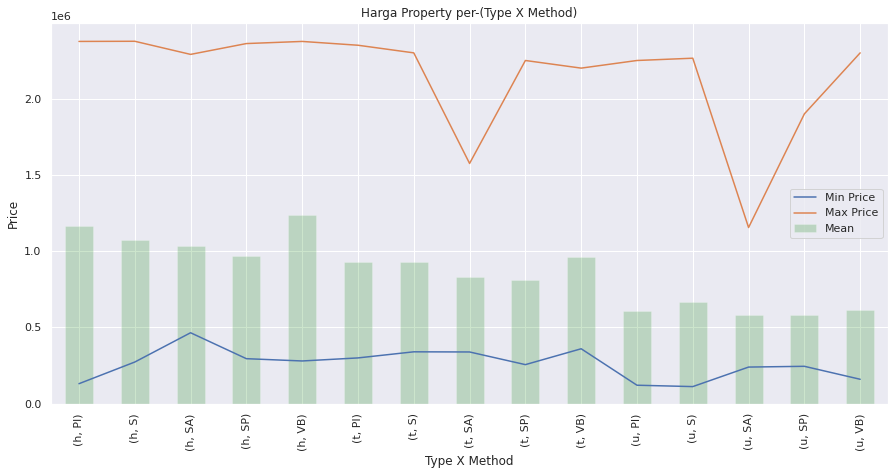

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Type", "Method"]).agg({"Price":[min]})).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Type", "Method"]).agg({"Price":[max]})).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_2.groupby(["Type", "Method"]).agg({"Price":['mean']}))).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Type X Method')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-(Type X Method)')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')

plt.show()

Text(0, 0.5, 'Total')

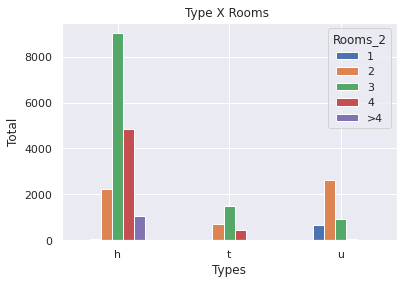

In [ ]:
counts = Melb_housing_4_2.groupby(["Type", "Rooms_2"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Rooms ")
plt.xticks(rotation=0)
plt.xlabel("Types")
plt.ylabel("Total")

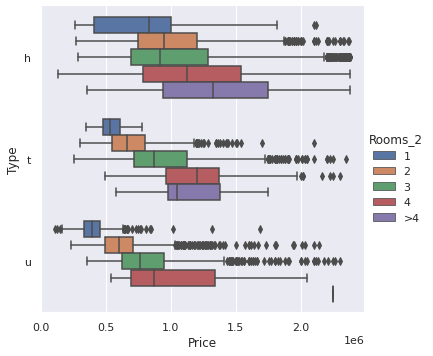

In [ ]:
p= sns.catplot(x="Price", y="Type", hue="Rooms_2", kind="box", data=Melb_housing_4_2)

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby(["Type", "Bathroom_2"]).agg({"Price":[min, max,'count','mean','sum']}))

Price                                             
                      min        max count          mean           sum
Type Bathroom_2                                                       
h    1           131000.0  2368000.0  9704  1.012051e+06  9.820940e+09
     2           320000.0  2376000.0  6393  1.133115e+06  7.244004e+09
     >2          440000.0  2375000.0  1148  1.429164e+06  1.640680e+09
t    1           256000.0  2350000.0  1655  8.540717e+05  1.413489e+09
     2           370000.0  2300000.0   886  9.822857e+05  8.703051e+08
     >2          450000.0  2100000.0   156  1.222737e+06  1.907470e+08
u    1           112000.0  2300000.0  3883  6.169422e+05  2.395587e+09
     2           346000.0  2250000.0   365  8.569852e+05  3.127996e+08
     >2          550000.0  2175000.0    11  1.031091e+06  1.134200e+07

Text(0, 0.5, 'Total')

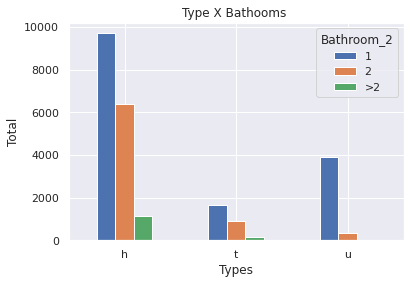

In [ ]:
counts = Melb_housing_4_2.groupby(["Type", "Bathroom_2"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Bathooms ")
plt.xticks(rotation=0)
plt.xlabel("Types")
plt.ylabel("Total")

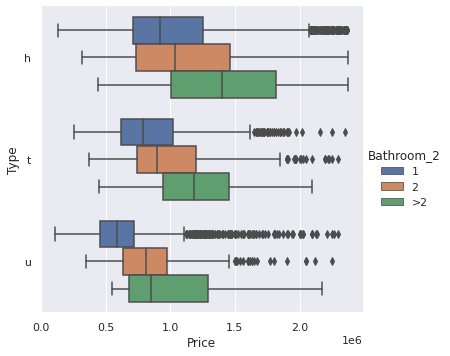

In [ ]:
p = sns.catplot(x="Price", y="Type", hue="Bathroom_2", kind="box", data=Melb_housing_4_2)

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby(["Type", "Car_2"]).agg({"Price":[min, max,'count','mean','sum']}))

Price                                             
                 min        max count          mean           sum
Type Car_2                                                       
h    0      273000.0  2365000.0  3945  1.067386e+06  4.210837e+09
     1      145000.0  2375000.0  3871  1.044008e+06  4.041356e+09
     2      131000.0  2376000.0  7346  1.104922e+06  8.116758e+09
     >2     295000.0  2368000.0  2083  1.121782e+06  2.336673e+09
t    0      256000.0  2350000.0  1294  8.966822e+05  1.160307e+09
     1      300000.0  2200000.0   578  8.008045e+05  4.628650e+08
     2      358000.0  2300000.0   789  1.020403e+06  8.050980e+08
     >2     465000.0  2200000.0    36  1.285306e+06  4.627100e+07
u    0      112000.0  2300000.0  2473  6.407889e+05  1.584671e+09
     1      145000.0  2050000.0  1380  5.876100e+05  8.109018e+08
     2      302500.0  2175000.0   381  7.882983e+05  3.003417e+08
     >2     394000.0  2250000.0    25  9.525600e+05  2.381400e+07

Text(0, 0.5, 'Total')

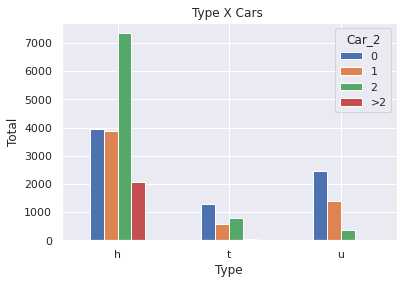

In [ ]:
counts = Melb_housing_4_2.groupby(["Type", "Car_2"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Cars ")
plt.xticks(rotation=0)
plt.xlabel("Type")
plt.ylabel("Total")

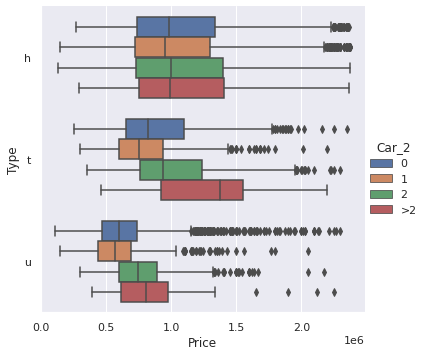

In [ ]:
p = sns.catplot(x="Price", y="Type", hue="Car_2", kind="box", data=Melb_housing_4_2)

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby(['Regionname','CouncilArea'])['CouncilArea'].count())

CouncilArea
Regionname                 CouncilArea                                
Eastern Metropolitan       Banyule City Council                    939
                           Boroondara City Council                  64
                           Knox City Council                       253
                           Manningham City Council                 821
                           Maroondah City Council                  353
                           Monash City Council                     296
                           Nillumbik Shire Council                  11
                           Whitehorse City Council                 424
Eastern Victoria           Cardinia Shire Council                   26
                           Casey City Council                       42
                           Frankston City Council                   28
                           Manningham City Council                   1
                           Yarra Ranges Shire Council               68
Northern Metropolitan      Banyule City Council                    466
                           Darebin City Council                   2204
                           Hume City Council                       833
                           Melbourne City Council                  624
                           Moreland City Council                  1616
                           Whittlesea City Council                 705
                           Yarra City Council                      752
Northern Victoria          Macedon Ranges Shire Council             39
                           Melton City Council                      42
                           Mitchell Shire Council                   11
                           Nillumbik Shire Council                  67
                           Whittlesea City Council                   4
                           Yarra Ranges Shire Council                3
South-Eastern Metropolitan Casey City Council                       96
                           Frankston City Council                  200
                           Greater Dandenong City Council          209
                           Kingston City Council                   611
                           Knox City Council                        34
                           Monash City Council                     172
Southern Metropolitan      Bayside City Council                   1065
                           Boroondara City Council                1791
                           Glen Eira City Council                 1463
                           Kingston City Council                   108
                           Melbourne City Council                  422
                           Monash City Council                     507
                           Port Phillip City Council               664
                           Stonnington City Council                557
Western Metropolitan       Brimbank City Council                  1355
                           Hobsons Bay City Council                749
                           Hume City Council                       200
                           Maribyrnong City Council               1120
                           Melton City Council                     109
                           Moonee Valley City Council             1447
                           Moreland City Council                    42
                           Wyndham City Council                    492
Western Victoria           Melton City Council                      91
                           Moorabool Shire Council                   5

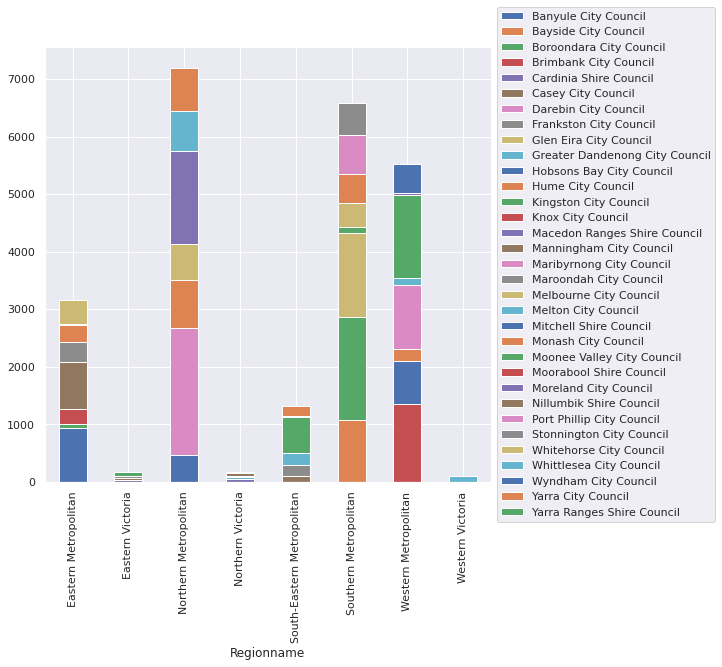

In [ ]:
CT = pd.crosstab(index=Melb_housing_4_2["Regionname"], columns=Melb_housing_4_2["CouncilArea"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)
p.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
pd.DataFrame(Melb_housing_4_2.set_index('Date')['Price'].resample('Y').sum())

Price
Date                    
2016-12-31  6.647449e+09
2017-12-31  1.392076e+10
2018-12-31  3.331684e+09

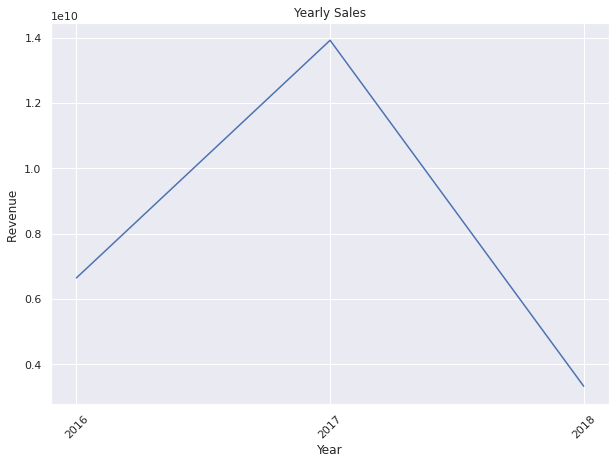

In [ ]:
ax = pd.DataFrame(Melb_housing_4_2.set_index('Date')['Price'].resample('Y').sum().values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Year')
ax.set_ylabel('Revenue ')
ax.set_title('Yearly Sales' )
plt.xticks(
    range(len(Melb_housing_4_2.set_index('Date')['Price'].resample('Y').sum().index)), 
    [x.strftime('%Y') for x in Melb_housing_4_2.set_index('Date')['Price'].resample('Y').sum().index], 
    rotation=45
)
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.set_index('Date')['Price'].resample('M').sum())

Price
Date                    
2016-01-31  2.018000e+06
2016-02-29  0.000000e+00
2016-03-31  5.397355e+08
2016-04-30  5.989695e+08
2016-05-31  6.795496e+08
2016-06-30  6.507799e+08
2016-07-31  8.877489e+08
2016-08-31  8.407876e+08
2016-09-30  5.095430e+08
2016-10-31  9.032022e+08
2016-11-30  6.755731e+08
2016-12-31  3.595413e+08
2017-01-31  3.029014e+08
2017-02-28  3.853608e+08
2017-03-31  1.209174e+09
2017-04-30  8.262387e+08
2017-05-31  1.153397e+09
2017-06-30  1.053765e+09
2017-07-31  1.236763e+09
2017-08-31  1.462376e+09
2017-09-30  2.134654e+09
2017-10-31  1.879648e+09
2017-11-30  1.875793e+09
2017-12-31  4.006906e+08
2018-01-31  1.749810e+07
2018-02-28  1.062309e+09
2018-03-31  1.391129e+09
2018-04-30  0.000000e+00
2018-05-31  0.000000e+00
2018-06-30  5.402240e+08
2018-07-31  0.000000e+00
2018-08-31  0.000000e+00
2018-09-30  0.000000e+00
2018-10-31  3.205238e+08

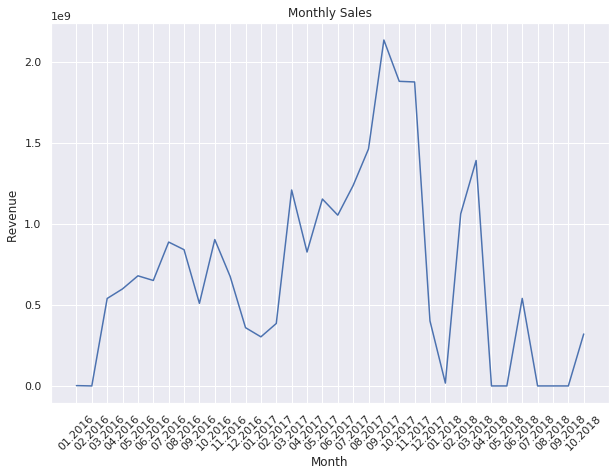

In [ ]:
ax = pd.DataFrame(Melb_housing_4_2.set_index('Date')['Price'].resample('M').sum().values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)


ax.set_xlabel('Month')
ax.set_ylabel('Revenue ')
ax.set_title('Monthly Sales' )
plt.xticks(
    range(len(Melb_housing_4_2.set_index('Date')['Price'].resample('M').sum().index)), 
    [x.strftime('%m.%Y') for x in Melb_housing_4_2.set_index('Date')['Price'].resample('M').sum().index], 
    rotation=45
)
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Regionname').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean']}))

Price            ... Distance           
                                  max       min  ...      min       mean
Regionname                                       ...                    
Eastern Metropolitan        2365000.0  288000.0  ...      7.8  14.698102
Eastern Victoria            2300000.0  337000.0  ...     25.2  34.399394
Northern Metropolitan       2375000.0  121000.0  ...      0.0   9.748181
Northern Victoria           1430000.0  296000.0  ...     20.1  33.140964
South-Eastern Metropolitan  2185000.0  275000.0  ...     14.7  24.314070
Southern Metropolitan       2376000.0  112000.0  ...      0.7   9.453003
Western Metropolitan        2355000.0  145000.0  ...      4.3  11.088429
Western Victoria            1152000.0  280000.0  ...     29.8  30.794792

[8 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Regionname').agg({"Price" : [max,min,'mean',sum] ,"Landsize":[max,min,'mean']}))

Price            ... Landsize             
                                  max       min  ...      min         mean
Regionname                                       ...                      
Eastern Metropolitan        2365000.0  288000.0  ...      1.0   615.107561
Eastern Victoria            2300000.0  337000.0  ...    196.0  1757.393939
Northern Metropolitan       2375000.0  121000.0  ...      5.0   527.058333
Northern Victoria           1430000.0  296000.0  ...    151.0  3063.355422
South-Eastern Metropolitan  2185000.0  275000.0  ...     57.0   591.484871
Southern Metropolitan       2376000.0  112000.0  ...      1.0   584.032842
Western Metropolitan        2355000.0  145000.0  ...     14.0   544.090316
Western Victoria            1152000.0  280000.0  ...    180.0   648.979167

[8 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean']})).sort_values(('Price', 'mean'),ascending=False).head(10)

Price                           ... Distance                 
                     max        min          mean  ...      max   min       mean
Suburb                                             ...                          
Wonga Park     1815000.0  1815000.0  1.815000e+06  ...     25.2  25.2  25.200000
Albert Park    2340000.0   420000.0  1.663676e+06  ...      3.3   3.0   3.172059
Middle Park    2360000.0   535000.0  1.625882e+06  ...      4.1   3.0   3.582353
Kew East       2375000.0   590000.0  1.622330e+06  ...      7.5   7.3   7.393182
Balwyn North   2367000.0   555500.0  1.621335e+06  ...      9.7   9.2   9.442187
Ivanhoe East   2365000.0   470000.0  1.598750e+06  ...      9.0   7.8   8.400000
Ashburton      2350000.0   500000.0  1.562145e+06  ...     11.0  10.2  10.712000
Beaumaris      2350000.0   291500.0  1.525766e+06  ...     17.3  17.3  17.300000
Brighton East  2375000.0   561000.0  1.520114e+06  ...     10.7  10.3  10.533043
Balwyn         2360000.0   390000.0  1.499180e+06  ...      9.7   7.9   8.900000

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean']})).sort_values(('Distance', 'mean'),ascending=True).head(10)

Price                          ... Distance               
                       max       min          mean  ...      max  min      mean
Suburb                                              ...                        
Southbank         801000.0  370000.0  5.602742e+05  ...      1.2  0.7  0.893548
East Melbourne   2010000.0  121000.0  1.004972e+06  ...      1.5  1.3  1.377778
Melbourne        2250000.0  270000.0  7.624369e+05  ...      2.8  0.0  1.488288
Docklands        1220000.0  430000.0  7.675000e+05  ...      1.9  1.4  1.650000
Carlton          2345000.0  400000.0  1.181958e+06  ...      1.8  1.6  1.686792
Collingwood      2330000.0  380000.0  9.376462e+05  ...      2.0  1.6  1.784615
Fitzroy          2300000.0  308000.0  1.169327e+06  ...      2.1  1.6  1.901282
North Melbourne  2161000.0  330000.0  9.618757e+05  ...      2.3  1.8  1.978571
South Melbourne  2260000.0  320000.0  1.308048e+06  ...      2.1  1.9  1.984211
Parkville        2375000.0  350000.0  1.202326e+06  ...      2.6  1.8  2.294118

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Landsize":[max,min,'mean']})).sort_values(('Price', 'mean'),ascending=False).head(10)

Price                           ... Landsize                   
                     max        min          mean  ...      max    min        mean
Suburb                                             ...                            
Wonga Park     1815000.0  1815000.0  1.815000e+06  ...    512.0  512.0  512.000000
Albert Park    2340000.0   420000.0  1.663676e+06  ...   1488.0   79.0  254.294118
Middle Park    2360000.0   535000.0  1.625882e+06  ...    760.0   98.0  253.735294
Kew East       2375000.0   590000.0  1.622330e+06  ...  12300.0  204.0  729.863636
Balwyn North   2367000.0   555500.0  1.621335e+06  ...  75100.0  132.0  909.863281
Ivanhoe East   2365000.0   470000.0  1.598750e+06  ...   1473.0  180.0  688.937500
Ashburton      2350000.0   500000.0  1.562145e+06  ...   1063.0  153.0  564.990000
Beaumaris      2350000.0   291500.0  1.525766e+06  ...   8000.0  243.0  680.376623
Brighton East  2375000.0   561000.0  1.520114e+06  ...   1233.0   74.0  527.600000
Balwyn         2360000.0   390000.0  1.499180e+06  ...   1611.0   87.0  520.215686

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Landsize":[max,min,'mean']})).sort_values(('Landsize', 'mean'),ascending=True).head(10)

Price                          ... Landsize                   
                       max       min          mean  ...      max    min        mean
Suburb                                              ...                            
Middle Park      2360000.0  535000.0  1.625882e+06  ...    760.0   98.0  253.735294
Albert Park      2340000.0  420000.0  1.663676e+06  ...   1488.0   79.0  254.294118
Seddon           1870000.0  435000.0  1.004040e+06  ...    934.0   97.0  315.931818
Clifton Hill     2300000.0  340000.0  1.190479e+06  ...   1727.0   36.0  328.885417
Carlton North    2210000.0  468000.0  1.352159e+06  ...   4025.0   73.0  351.365079
Kingsville       1480000.0  241000.0  9.228224e+05  ...    555.0   84.0  358.241379
Flemington       2268000.0  272500.0  9.249177e+05  ...   2077.0  119.0  369.493671
South Melbourne  2260000.0  320000.0  1.308048e+06  ...   6880.0   64.0  374.456140
Burnley          1940000.0  370000.0  1.186910e+06  ...   1212.0   92.0  379.363636
Williamstown     2350000.0  435000.0  1.311900e+06  ...    782.0   56.0  379.386207

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('SellerG').agg({"Price" : [max,min,'mean',sum,'count']})).head(10).sort_values(('Price', 'count'),ascending=False)

Price                                           
                    max        min          mean         sum count
SellerG                                                           
Alexkarbon    2371000.0   330000.0  9.606171e+05  49952090.0    52
Abercromby's  2100000.0   580000.0  1.542048e+06  32383000.0    21
@Realty       1650000.0   395000.0  7.200455e+05   7920500.0    11
ASL           1890000.0   705500.0  1.227100e+06   6135500.0     5
Ace            860000.0   475000.0  6.287500e+05   2515000.0     4
Allens        1461400.0   752000.0  1.106700e+06   2213400.0     2
AIME           980000.0   980000.0  9.800000e+05    980000.0     1
Airport       1035000.0  1035000.0  1.035000e+06   1035000.0     1
Alex          1100000.0  1100000.0  1.100000e+06   1100000.0     1
Allan          920000.0   920000.0  9.200000e+05    920000.0     1

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean'],"Propertycount":['unique']})).sort_values(('Price', 'mean'),ascending=False).head(10)

Price             ...   Distance Propertycount
                     max        min  ...       mean        unique
Suburb                               ...                         
Wonga Park     1815000.0  1815000.0  ...  25.200000      [1328.0]
Albert Park    2340000.0   420000.0  ...   3.172059      [3280.0]
Middle Park    2360000.0   535000.0  ...   3.582353      [2019.0]
Kew East       2375000.0   590000.0  ...   7.393182      [2671.0]
Balwyn North   2367000.0   555500.0  ...   9.442187      [7809.0]
Ivanhoe East   2365000.0   470000.0  ...   8.400000      [1554.0]
Ashburton      2350000.0   500000.0  ...  10.712000      [3052.0]
Beaumaris      2350000.0   291500.0  ...  17.300000      [5366.0]
Brighton East  2375000.0   561000.0  ...  10.533043      [6938.0]
Balwyn         2360000.0   390000.0  ...   8.900000      [5682.0]

[10 rows x 8 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean'],"Propertycount":['unique']})).sort_values(('Distance', 'mean'),ascending=True).head(10)

Price                          ... Distance           Propertycount
                       max       min          mean  ...      min      mean        unique
Suburb                                              ...                                 
Southbank         801000.0  370000.0  5.602742e+05  ...      0.7  0.893548      [8400.0]
East Melbourne   2010000.0  121000.0  1.004972e+06  ...      1.3  1.377778      [3040.0]
Melbourne        2250000.0  270000.0  7.624369e+05  ...      0.0  1.488288     [17496.0]
Docklands        1220000.0  430000.0  7.675000e+05  ...      1.4  1.650000      [4707.0]
Carlton          2345000.0  400000.0  1.181958e+06  ...      1.6  1.686792      [6786.0]
Collingwood      2330000.0  380000.0  9.376462e+05  ...      1.6  1.784615      [4553.0]
Fitzroy          2300000.0  308000.0  1.169327e+06  ...      1.6  1.901282      [5825.0]
North Melbourne  2161000.0  330000.0  9.618757e+05  ...      1.8  1.978571      [6821.0]
South Melbourne  2260000.0  320000.0  1.308048e+06  ...      1.9  1.984211      [5943.0]
Parkville        2375000.0  350000.0  1.202326e+06  ...      1.8  2.294118      [2309.0]

[10 rows x 8 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_2.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean'],"Propertycount":['unique']})).sort_values(('Propertycount', 'unique'),ascending=False).head(10)

Price                          ... Distance            Propertycount
                     max       min          mean  ...      min       mean        unique
Suburb                                            ...                                  
Reservoir      1700000.0  240000.0  6.986638e+05  ...     11.2  11.582411     [21650.0]
Melbourne      2250000.0  270000.0  7.624369e+05  ...      0.0   1.488288     [17496.0]
Pakenham        841000.0  410500.0  5.229333e+05  ...     47.3  47.300000     [17384.0]
Berwick        2300000.0  426000.0  8.089231e+05  ...     35.2  35.200000     [17093.0]
Frankston      1700000.0  300000.0  6.710824e+05  ...     38.0  38.000000     [17055.0]
Werribee        931000.0  280000.0  5.268524e+05  ...     14.7  14.700000     [16166.0]
Point Cook     1060000.0  411000.0  6.597093e+05  ...     14.7  14.700000     [15542.0]
Craigieburn    1000000.0  310000.0  5.661735e+05  ...     20.6  20.600000     [15510.0]
Glen Waverley  2350000.0  515000.0  1.263598e+06  ...     16.7  16.700000     [15321.0]
Richmond       2368000.0  280000.0  1.091375e+06  ...      2.4   2.499454     [14949.0]

[10 rows x 8 columns]

In [ ]:
Melb_housing_4_2.groupby('Regionname').describe(include=['category']).T

Regionname        Eastern Metropolitan  ... Western Victoria
Type       count                  3161  ...               96
           unique                    3  ...                2
           top                       h  ...                h
           freq                   2483  ...               94
Method     count                  3161  ...               96
           unique                    5  ...                4
           top                       S  ...                S
           freq                   2072  ...               69
SellerG    count                  3161  ...               96
           unique                   96  ...               12
           top                   Barry  ...    hockingstuart
           freq                    580  ...               23
Rooms_2    count                  3161  ...               96
           unique                    5  ...                4
           top                       3  ...                3
           freq                   1449  ...               62
Bathroom_2 count                  3161  ...               96
           unique                    3  ...                3
           top                       1  ...                1
           freq                   1658  ...               61
Car_2      count                  3161  ...               96
           unique                    4  ...                4
           top                       2  ...                2
           freq                   1445  ...               43

[24 rows x 8 columns]

In [ ]:
Melb_housing_4_2.groupby('Suburb').describe(include=['category']).T

Suburb            Abbotsford Aberfeldie  ... croydon viewbank
Type       count          90         59  ...       1        1
           unique          3          3  ...       1        1
           top             h          h  ...       h        t
           freq           63         43  ...       1        1
Method     count          90         59  ...       1        1
           unique          4          4  ...       1        1
           top             S          S  ...       S       SP
           freq           64         31  ...       1        1
SellerG    count          90         59  ...       1        1
           unique         15         11  ...       1        1
           top        Biggin     Nelson  ...     Ray      Ray
           freq           38         22  ...       1        1
Rooms_2    count          90         59  ...       1        1
           unique          4          5  ...       1        1
           top             3          3  ...       3        3
           freq           40         24  ...       1        1
Bathroom_2 count          90         59  ...       1        1
           unique          3          3  ...       1        1
           top             1          1  ...       1        1
           freq           69         29  ...       1        1
Car_2      count          90         59  ...       1        1
           unique          3          4  ...       1        1
           top             0          2  ...       0        0
           freq           51         23  ...       1        1

[24 rows x 344 columns]

In [ ]:
overall_best_agent = pd.DataFrame(Melb_housing_4_2.groupby('SellerG')['SellerG'].count())
overall_best_agent

SellerG
SellerG                             
@Realty                           11
AIME                               1
ASL                                5
Abercromby's                      21
Ace                                4
...                              ...
hockingstuart/hockingstuart        7
iHomes                             1
iProperty                          1
iSell                             25
iTRAK                             31

[338 rows x 1 columns]

In [ ]:
overall_best_agent.rename(columns={"SellerG": "Counts"}, inplace=True)

In [ ]:
overall_best_agent.sort_values('Counts',ascending=False).head(5)

Counts
SellerG              
Nelson           2479
Barry            2349
Jellis           2096
hockingstuart    1811
Ray              1523

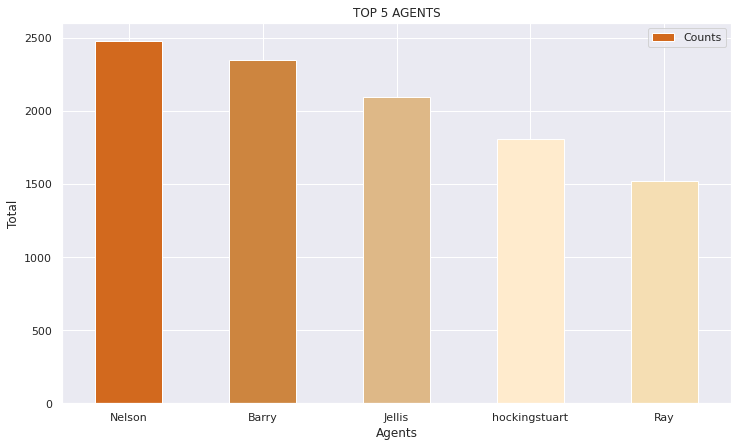

In [ ]:
ax = overall_best_agent.sort_values('Counts',ascending=False).head(5).plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color=[['chocolate', 'peru', 'burlywood', 'blanchedalmond', 'wheat']]
)
 
ax.set_title('TOP 5 AGENTS')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Melb_housing_4_2['SellerG_2']= Melb_housing_4_2["SellerG"].astype('object')

In [ ]:
region_best_agent = pd.DataFrame(Melb_housing_4_2.groupby(['Regionname','SellerG_2'])['SellerG_2'].count())
region_best_agent

SellerG_2
Regionname           SellerG_2               
Eastern Metropolitan @Realty                2
                     ASL                    2
                     Allens                 1
                     Appleby                5
                     Ascend                 1
...                                       ...
Western Victoria     Ray                    2
                     Reliance               7
                     Ryder                 11
                     YPA                   10
                     hockingstuart         23

[669 rows x 1 columns]

In [ ]:
region_best_agent.rename(columns={"SellerG_2": "Counts"}, inplace=True)

In [ ]:
region_best_agent = region_best_agent.reset_index(level='Regionname')
region_best_agent

Regionname  Counts
SellerG_2                                  
@Realty        Eastern Metropolitan       2
ASL            Eastern Metropolitan       2
Allens         Eastern Metropolitan       1
Appleby        Eastern Metropolitan       5
Ascend         Eastern Metropolitan       1
...                             ...     ...
Ray                Western Victoria       2
Reliance           Western Victoria       7
Ryder              Western Victoria      11
YPA                Western Victoria      10
hockingstuart      Western Victoria      23

[669 rows x 2 columns]

In [ ]:
top3_agent_em = region_best_agent[region_best_agent['Regionname']=='Eastern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_em

Regionname  Counts
SellerG_2                              
Barry      Eastern Metropolitan     580
Jellis     Eastern Metropolitan     369
Ray        Eastern Metropolitan     305

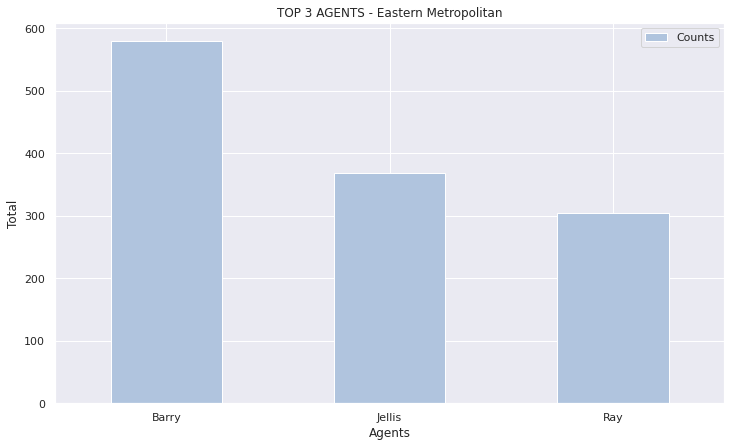

In [ ]:
ax = top3_agent_em.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='lightsteelblue'
)

ax.set_title('TOP 3 AGENTS - Eastern Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_ev = region_best_agent[region_best_agent['Regionname']=='Eastern Victoria'].sort_values('Counts',ascending=False).head(3)
top3_agent_ev

Regionname  Counts
SellerG_2                          
Fletchers  Eastern Victoria      20
Ray        Eastern Victoria      19
Barry      Eastern Victoria      18

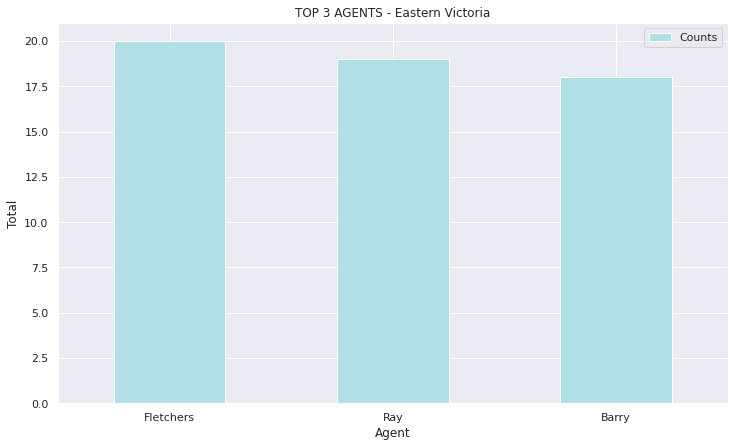

In [ ]:
ax = top3_agent_ev.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='powderblue'
)

ax.set_title('TOP 3 AGENTS - Eastern Victoria')
ax.set_xlabel('Agent')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_nm = region_best_agent[region_best_agent['Regionname']=='Northern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_nm

Regionname  Counts
SellerG_2                               
Nelson     Northern Metropolitan    1466
Barry      Northern Metropolitan     764
Jellis     Northern Metropolitan     684

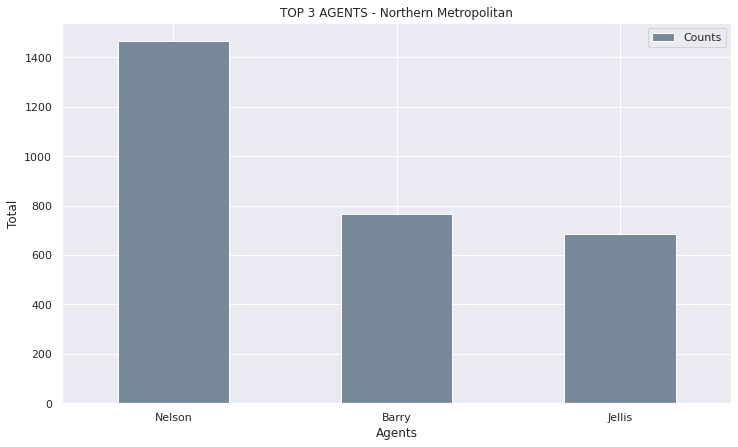

In [ ]:
ax = top3_agent_nm.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='lightslategray'
)

ax.set_title('TOP 3 AGENTS - Northern Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_nv = region_best_agent[region_best_agent['Regionname']=='Northern Victoria'].sort_values('Counts',ascending=False).head(3)
top3_agent_nv

Regionname  Counts
SellerG_2                               
Raine          Northern Victoria      38
Barry          Northern Victoria      24
hockingstuart  Northern Victoria      14

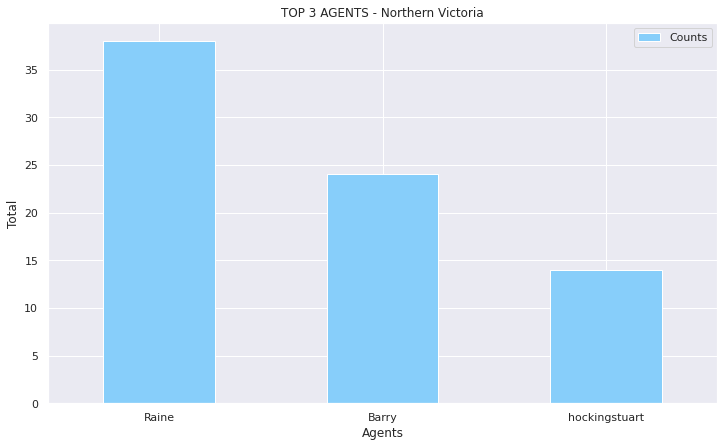

In [ ]:
ax = top3_agent_nv.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='lightskyblue'
)

ax.set_title('TOP 3 AGENTS - Northern Victoria')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_sem = region_best_agent[region_best_agent['Regionname']=='South-Eastern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_sem

Regionname  Counts
SellerG_2                                    
Buxton     South-Eastern Metropolitan     223
Ray        South-Eastern Metropolitan     177
Barry      South-Eastern Metropolitan     124

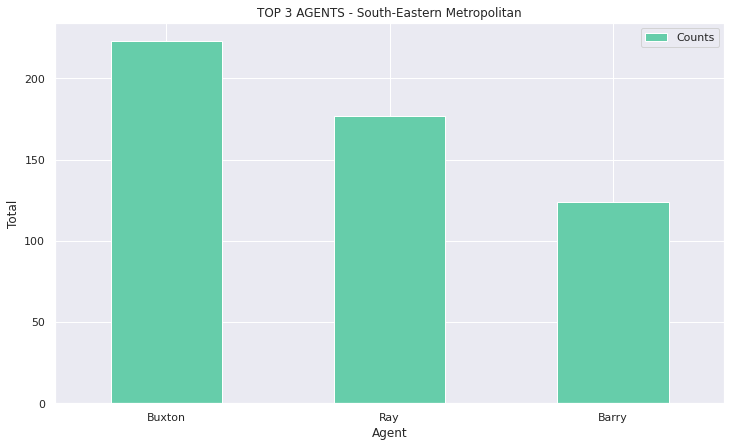

In [ ]:
ax = top3_agent_sem.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='mediumaquamarine'
)

ax.set_title('TOP 3 AGENTS - South-Eastern Metropolitan')
ax.set_xlabel('Agent')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_sm = region_best_agent[region_best_agent['Regionname']=='Southern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_sm

Regionname  Counts
SellerG_2                                   
Buxton         Southern Metropolitan    1039
Jellis         Southern Metropolitan     930
hockingstuart  Southern Metropolitan     792

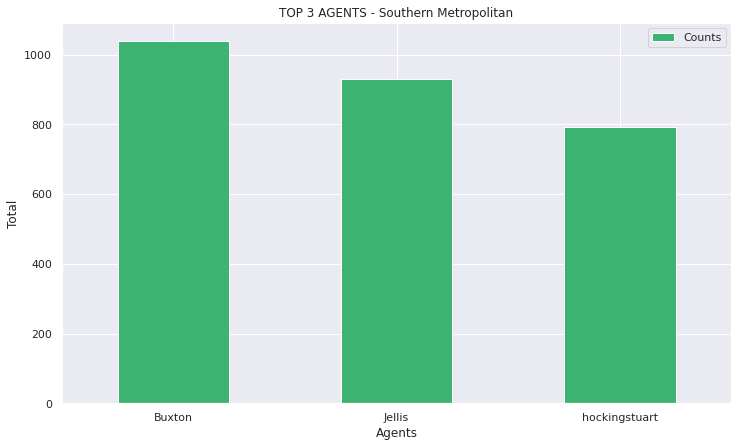

In [ ]:
ax = top3_agent_sm.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='mediumseagreen'
)

ax.set_title('TOP 3 AGENTS - Southern Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_wm = region_best_agent[region_best_agent['Regionname']=='Western Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_wm

Regionname  Counts
SellerG_2                              
Nelson     Western Metropolitan     797
Barry      Western Metropolitan     779
Jas        Western Metropolitan     374

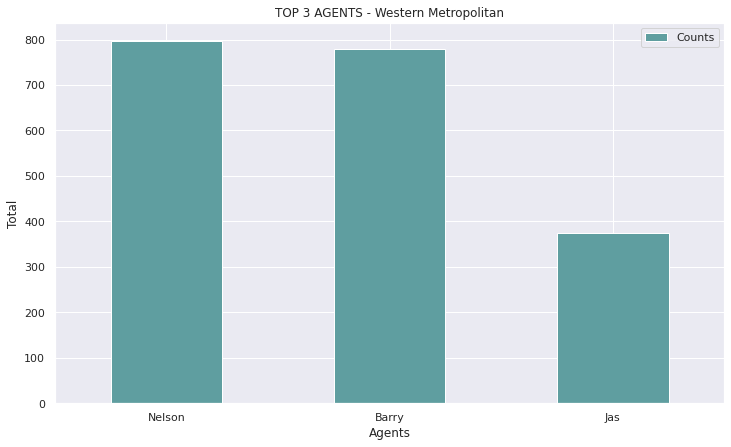

In [ ]:
ax = top3_agent_wm.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='cadetblue'
)

ax.set_title('TOP 3 AGENTS - Western Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_wv = region_best_agent[region_best_agent['Regionname']=='Western Victoria'].sort_values('Counts',ascending=False).head(3)
top3_agent_wv

Regionname  Counts
SellerG_2                              
hockingstuart  Western Victoria      23
Raine          Western Victoria      17
Ryder          Western Victoria      11

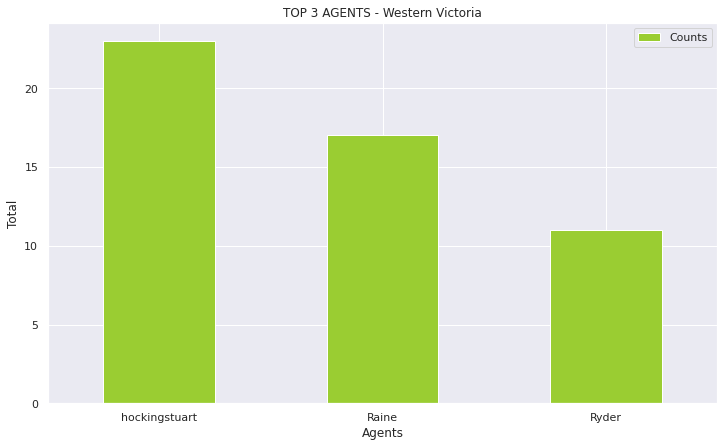

In [ ]:
ax = top3_agent_wv.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='yellowgreen'
)

ax.set_title('TOP 3 AGENTS - Western Victoria')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

# Data Outlier
Salwa Febiola

In [ ]:
#Data Outlier
Melb_housing_4_3 = Melb_housing_4[np.abs(Melb_housing_4.Price - Melb_housing_4.Price.mean())>(2*Melb_housing_4.Price.std())]
Melb_housing_4_3.head(10)

Suburb  Rooms Type      Price  ... Propertycount Rooms_2 Bathroom_2  Car_2
135  Albert Park      3    h  2850000.0  ...        3280.0       3          2      0
146  Albert Park      3    h  2485000.0  ...        3280.0       3          1      0
152  Albert Park      3    h  2615000.0  ...        3280.0       3          2      1
158  Albert Park      3    h  2575000.0  ...        3280.0       3          2      1
166  Albert Park      3    h  3010000.0  ...        3280.0       3          2      0
168  Albert Park      4    h  2800000.0  ...        3280.0       4         >2      1
178  Albert Park      4    h  4735000.0  ...        3280.0       4          2      1
182  Albert Park      3    h  3755000.0  ...        3280.0       3          2      2
202   Alphington      5    h  2840000.0  ...        2211.0      >4         >2     >2
370     Armadale      3    h  2675000.0  ...        4836.0       3          1      0

[10 rows x 17 columns]

In [ ]:
Melb_housing_4_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 135 to 34719
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         1089 non-null   object        
 1   Rooms          1089 non-null   int64         
 2   Type           1089 non-null   category      
 3   Price          1089 non-null   float64       
 4   Method         1089 non-null   category      
 5   SellerG        1089 non-null   category      
 6   Date           1089 non-null   datetime64[ns]
 7   Distance       1089 non-null   float64       
 8   Bathroom       1089 non-null   float64       
 9   Car            1089 non-null   float64       
 10  Landsize       1089 non-null   float64       
 11  CouncilArea    1089 non-null   object        
 12  Regionname     1089 non-null   object        
 13  Propertycount  1089 non-null   float64       
 14  Rooms_2        1089 non-null   category      
 15  Bathroom_2     108

*Type x Price*

Price                       
              mean        min         max
Type                                     
h     3.178176e+06  2380000.0  11200000.0
t     2.728896e+06  2400000.0   3820000.0
u     3.190714e+06  2460000.0   6500000.0

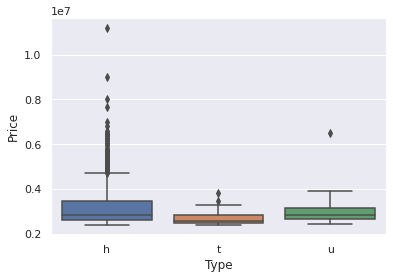

In [ ]:
ax = sns.boxplot(x="Type", y="Price", data=Melb_housing_4_3)
Melb_housing_4_3.groupby('Type').agg({"Price": ['mean',min , max]})

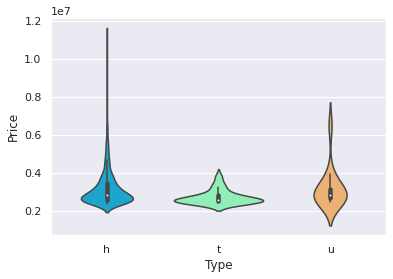

In [ ]:
p = sns.violinplot(x="Type", y="Price", data=Melb_housing_4_3,palette='rainbow')

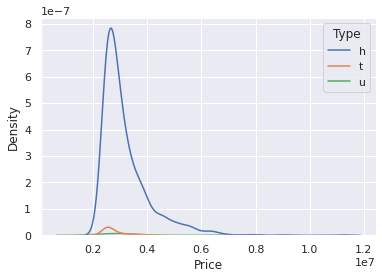

In [ ]:
sns.kdeplot(data=Melb_housing_4_3, x="Price", hue="Type")

*Method x Price*

Price                       
                mean        min         max
Method                                     
PI      3.177994e+06  2385000.0   9000000.0
S       3.170820e+06  2380000.0   7650000.0
SA      2.934500e+06  2600000.0   3750000.0
SP      3.097447e+06  2380000.0   6050000.0
VB      3.182051e+06  2400000.0  11200000.0

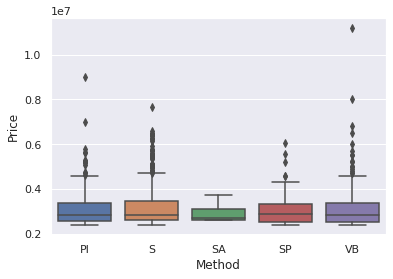

In [ ]:
ax = sns.boxplot(x="Method", y="Price", data=Melb_housing_4_3)
Melb_housing_4_3.groupby('Method').agg({"Price": ['mean',min , max]})

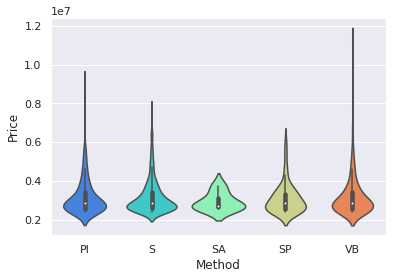

In [ ]:
p = sns.violinplot(x="Method", y="Price", data=Melb_housing_4_3,palette='rainbow')

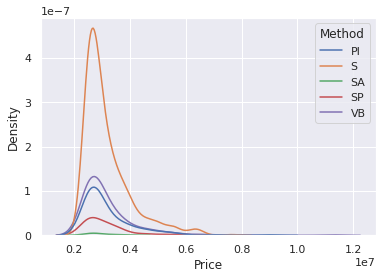

In [ ]:
sns.kdeplot(data=Melb_housing_4_3, x="Price", hue="Method")

*Regionname x Price*

Price                       
                                    mean        min         max
Regionname                                                     
Eastern Metropolitan        2.857485e+06  2380000.0   5000000.0
Northern Metropolitan       3.112600e+06  2400000.0   6500000.0
South-Eastern Metropolitan  3.787500e+06  2475000.0   9000000.0
Southern Metropolitan       3.208444e+06  2380000.0  11200000.0
Western Metropolitan        2.747838e+06  2390000.0   4020000.0

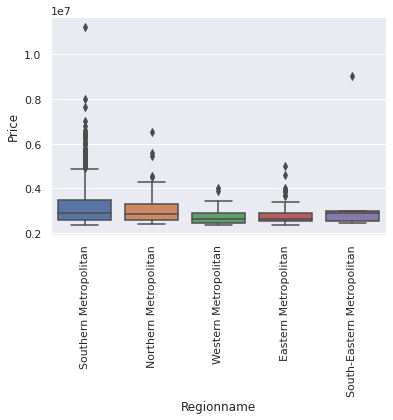

In [ ]:
ax = sns.boxplot(x="Regionname", y="Price", data=Melb_housing_4_3)
plt.xticks(rotation=90)
Melb_housing_4_3.groupby('Regionname').agg({"Price": ['mean',min , max]})

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

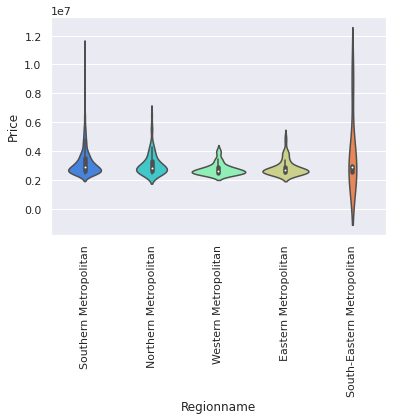

In [ ]:
p = sns.violinplot(x="Regionname", y="Price", data=Melb_housing_4_3,palette='rainbow')
plt.xticks(rotation=90)

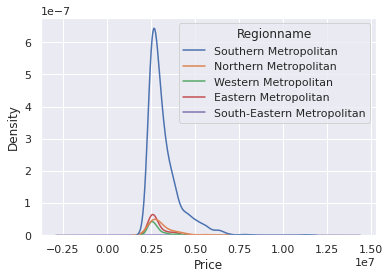

In [ ]:
sns.kdeplot(data=Melb_housing_4_3, x="Price", hue="Regionname")

*Room x Price*

Price                       
                 mean        min         max
Rooms_2                                     
1        2.701667e+06  2450000.0   3050000.0
2        2.972350e+06  2400000.0   4800000.0
3        3.014974e+06  2380000.0   9000000.0
4        3.126384e+06  2380000.0  11200000.0
>4       3.354077e+06  2400000.0   8000000.0

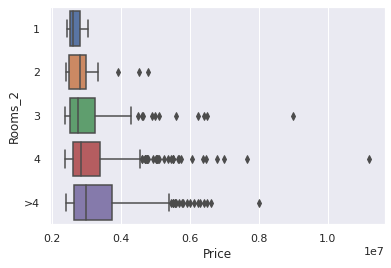

In [ ]:
ax = sns.boxplot(x="Price", y="Rooms_2", data=Melb_housing_4_3)
Melb_housing_4_3.groupby('Rooms_2').agg({"Price": ['mean',min , max]})

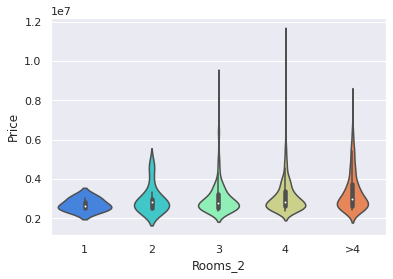

In [ ]:
p = sns.violinplot(x="Rooms_2", y="Price", data=Melb_housing_4_3,palette='rainbow')

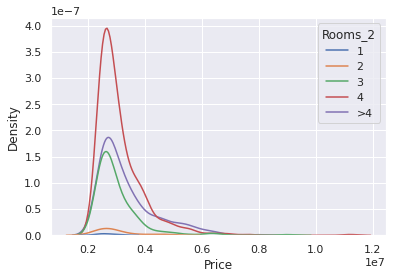

In [ ]:
sns.kdeplot(data=Melb_housing_4_3, x="Price", hue="Rooms_2")

*Bathroom x Price*

Price                       
                    mean        min         max
Bathroom_2                                     
1           3.200597e+06  2380000.0   9000000.0
2           3.001419e+06  2380000.0   7650000.0
>2          3.307671e+06  2385000.0  11200000.0

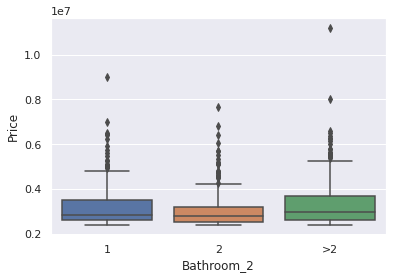

In [ ]:
ax = sns.boxplot(x="Bathroom_2", y="Price", data=Melb_housing_4_3)
Melb_housing_4_3.groupby('Bathroom_2').agg({"Price": ['mean',min , max]})

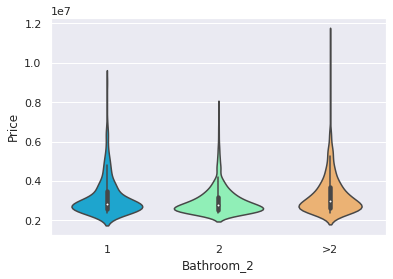

In [ ]:
p = sns.violinplot(x="Bathroom_2", y="Price", data=Melb_housing_4_3,palette='rainbow')

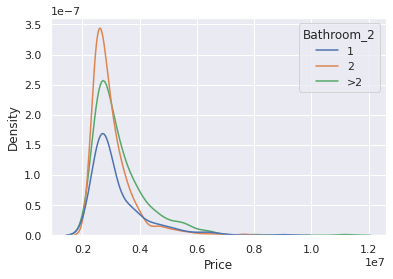

In [ ]:
sns.kdeplot(data=Melb_housing_4_3, x="Price", hue="Bathroom_2")

*Car x Price*

Price                       
               mean        min         max
Car_2                                     
0      3.244647e+06  2385000.0   7000000.0
1      3.029680e+06  2380000.0   9000000.0
2      3.058788e+06  2380000.0  11200000.0
>2     3.411910e+06  2400000.0   8000000.0

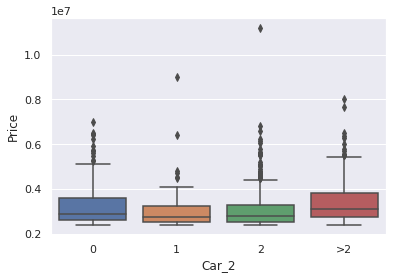

In [ ]:
ax = sns.boxplot(x="Car_2", y="Price", data=Melb_housing_4_3)
Melb_housing_4_3.groupby('Car_2').agg({"Price": ['mean',min , max]})

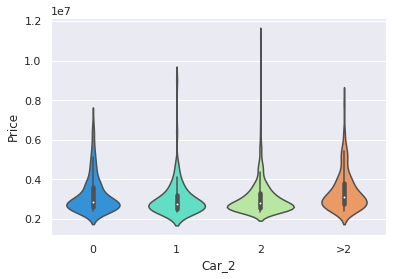

In [ ]:
p = sns.violinplot(x="Car_2", y="Price", data=Melb_housing_4_3,palette='rainbow')

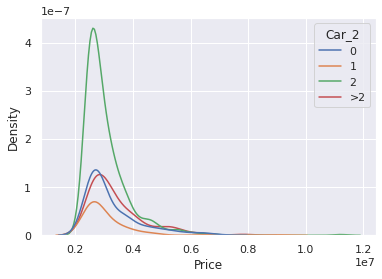

In [ ]:
sns.kdeplot(data=Melb_housing_4_3, x="Price", hue="Car_2")

**Distplot**

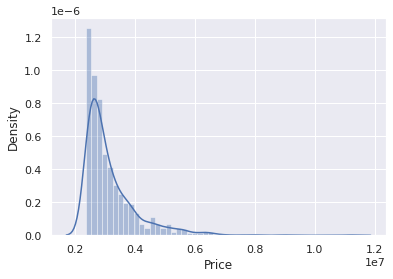

In [ ]:
sns.distplot(Melb_housing_4_3['Price'])

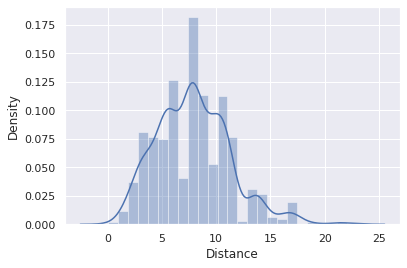

In [ ]:
sns.distplot(Melb_housing_4_3['Distance'])

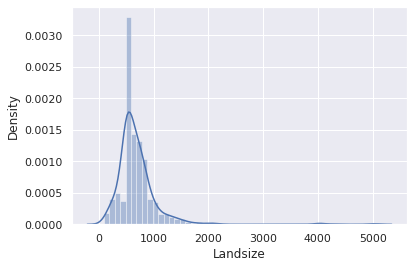

In [ ]:
sns.distplot(Melb_housing_4_3['Landsize'])

**Pie Chart**

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Type')['Type'].count())

Type
Type      
h     1051
t       24
u       14

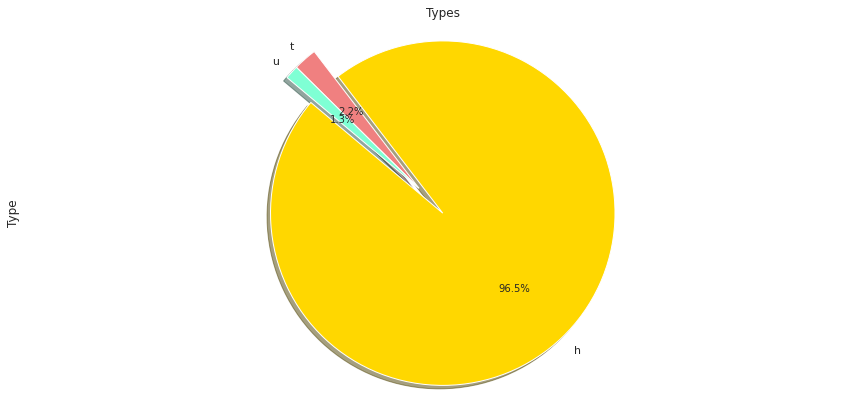

In [ ]:
ax = Melb_housing_4_3.groupby('Type')['Type'].count().plot(
    kind='pie',
    figsize=(15, 7),
    colors = ['gold','lightcoral', 'aquamarine'],
    labels = ['h','t','u'],
    explode = (0.2, 0, 0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Types')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Method')['Method'].count())

Method
Method        
PI         171
S          629
SA           6
SP          66
VB         217

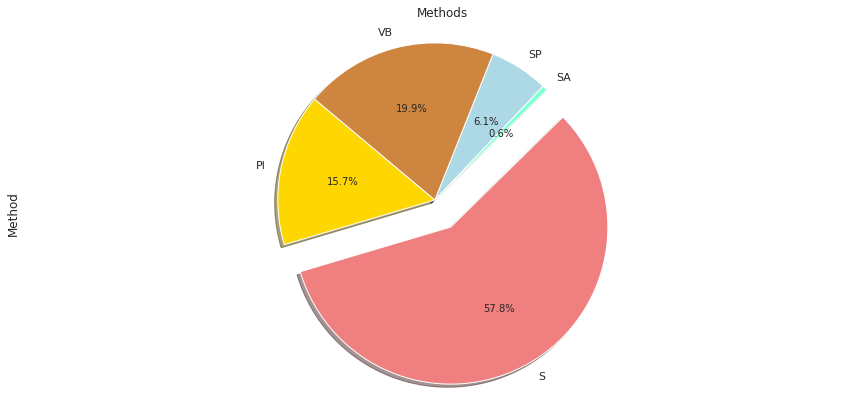

In [ ]:
ax = Melb_housing_4_3.groupby('Method')['Method'].count().plot(
    kind='pie',
    figsize=(15, 7),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue', 'peru'],
    labels = ['PI','S','SA','SP','VB'],
    explode = (0, 0.2, 0,0,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)
 
plt.axis('equal')
plt.title('Methods')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Regionname')['Regionname'].count())

Regionname
Regionname                            
Eastern Metropolitan                65
Northern Metropolitan               75
South-Eastern Metropolitan           6
Southern Metropolitan              906
Western Metropolitan                37

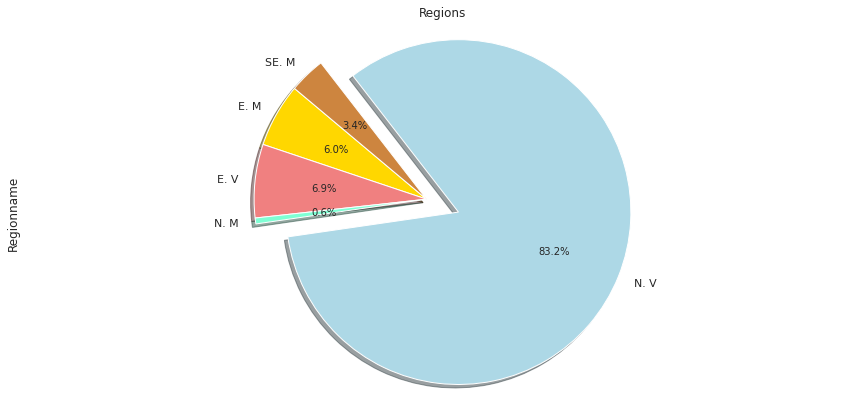

In [ ]:
ax = Melb_housing_4_3.groupby('Regionname')['Regionname'].count().plot(
    kind='pie',
    figsize=(15, 7),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue', 'peru','khaki','lightsteelblue','pink'],
    labels = ['E. M','E. V','N. M','N. V','SE. M','S. M','W. M','W.V'],
    explode = (0, 0, 0,0.2,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Regions')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Rooms_2')['Rooms_2'].count())

Rooms_2
Rooms_2         
1              3
2             20
3            210
4            533
>4           323

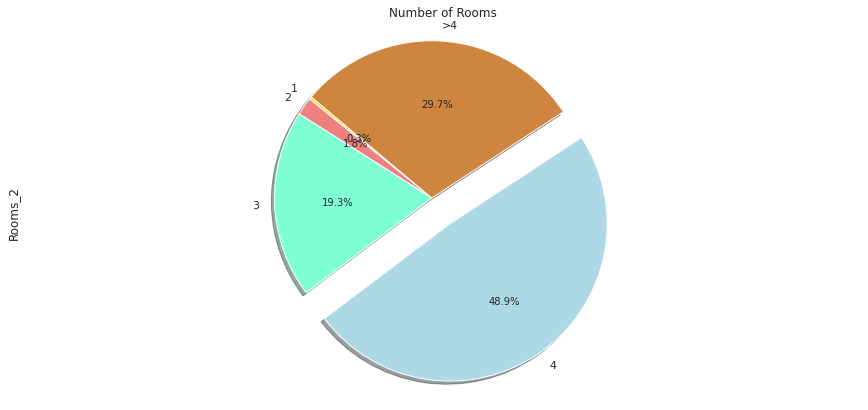

In [ ]:
ax = Melb_housing_4_3.groupby('Rooms_2')['Rooms_2'].count().plot(
    kind='pie',
    figsize=(15, 7),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue', 'peru'],
    labels = ['1','2','3','4','>4'],
    explode = (0, 0, 0, 0.2, 0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Number of Rooms')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Bathroom_2')['Bathroom_2'].count())

Bathroom_2
Bathroom_2            
1                  252
2                  407
>2                 430

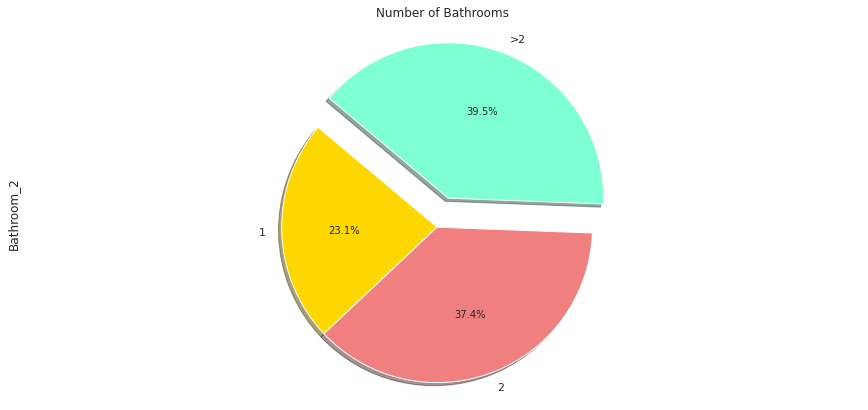

In [ ]:
ax = Melb_housing_4_3.groupby('Bathroom_2')['Bathroom_2'].count().plot(
    kind='pie',
    figsize=(15, 7),
    colors = ['gold','lightcoral', 'aquamarine'],
    labels = ['1','2','>2'],
    explode = (0, 0, 0.2) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Number of Bathrooms')
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Car_2')['Car_2'].count())

Car_2
Car_2       
0        214
1        103
2        538
>2       234

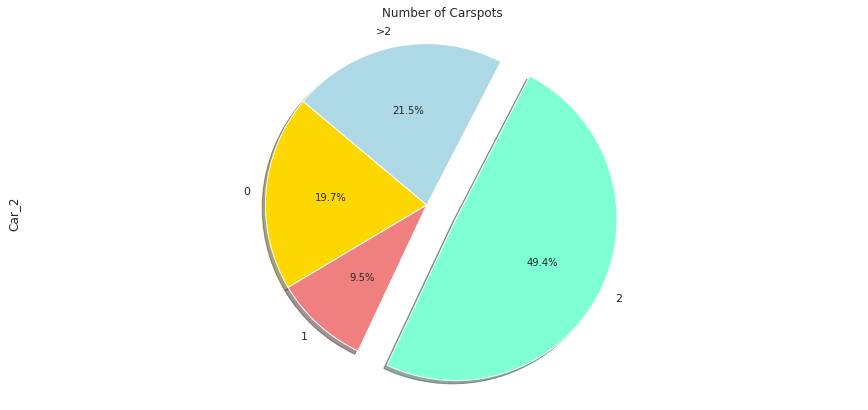

In [ ]:
ax = Melb_housing_4_3.groupby('Car_2')['Car_2'].count().plot(
    kind='pie',
    figsize=(15, 7),
    colors = ['gold','lightcoral', 'aquamarine', 'lightblue'],
    labels = ['0','1','2','>2'],
    explode = (0, 0, 0.2,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Number of Carspots')
plt.show()

In [ ]:
region3 = pd.DataFrame(Melb_housing_4_3.groupby('Regionname').agg({"Price":[min, max,'mean']}))
region3

Price                          
                                  min         max          mean
Regionname                                                     
Eastern Metropolitan        2380000.0   5000000.0  2.857485e+06
Northern Metropolitan       2400000.0   6500000.0  3.112600e+06
South-Eastern Metropolitan  2475000.0   9000000.0  3.787500e+06
Southern Metropolitan       2380000.0  11200000.0  3.208444e+06
Western Metropolitan        2390000.0   4020000.0  2.747838e+06

In [ ]:
region4 = region3.reset_index()
region4

Regionname      Price                          
                                     min         max          mean
0        Eastern Metropolitan  2380000.0   5000000.0  2.857485e+06
1       Northern Metropolitan  2400000.0   6500000.0  3.112600e+06
2  South-Eastern Metropolitan  2475000.0   9000000.0  3.787500e+06
3       Southern Metropolitan  2380000.0  11200000.0  3.208444e+06
4        Western Metropolitan  2390000.0   4020000.0  2.747838e+06

In [ ]:
region4.sort_values(('Price','mean'),ascending=False).head(3)

Regionname      Price                          
                                     min         max          mean
2  South-Eastern Metropolitan  2475000.0   9000000.0  3.787500e+06
3       Southern Metropolitan  2380000.0  11200000.0  3.208444e+06
1       Northern Metropolitan  2400000.0   6500000.0  3.112600e+06

In [ ]:
region4.sort_values(('Price','mean'),ascending=True).head(3)

Regionname      Price                         
                                min        max          mean
4   Western Metropolitan  2390000.0  4020000.0  2.747838e+06
0   Eastern Metropolitan  2380000.0  5000000.0  2.857485e+06
1  Northern Metropolitan  2400000.0  6500000.0  3.112600e+06

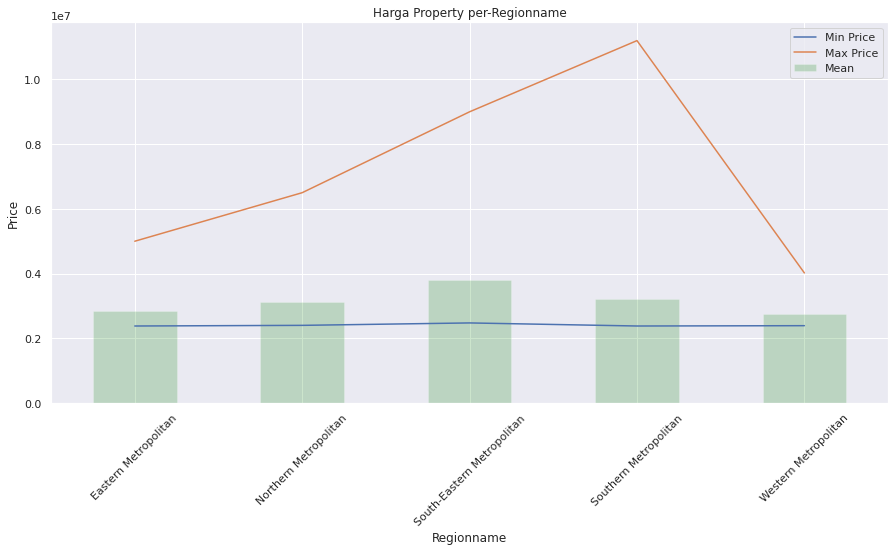

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby('Regionname').agg({"Price":[min]})).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby('Regionname').agg({"Price":[max]})).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby('Regionname').agg({"Price":['mean']}))).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Regionname')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-Regionname')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')
plt.xticks(rotation=45)

plt.show()

In [ ]:
suburb_price3 = pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean']})).sort_values(('Price', 'mean'),ascending=False).head(5)
suburb_price3

Price                      
                 max        min       mean
Suburb                                    
Melbourne  6500000.0  6500000.0  6500000.0
Mulgrave   9000000.0  2480000.0  5740000.0
Mitcham    5000000.0  5000000.0  5000000.0
Carlton    5460000.0  3825000.0  4642500.0
Armadale   7000000.0  2385000.0  4046140.0

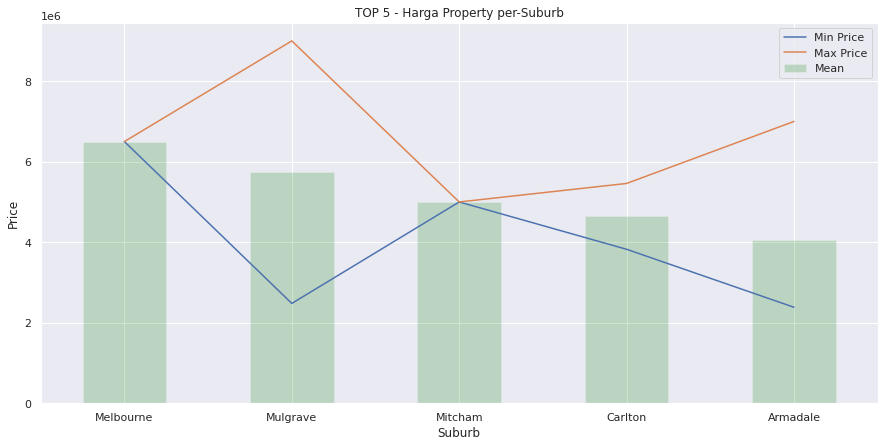

In [ ]:
ax = pd.DataFrame(suburb_price3[('Price',  'min')].values).plot(
    figsize=(15,7)
)
pd.DataFrame(suburb_price3[('Price',  'max')].values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame((suburb_price3[('Price',  'mean')])).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Suburb')
ax.set_ylabel('Price')
ax.set_title('TOP 5 - Harga Property per-Suburb')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')
plt.xticks(rotation=0)

plt.show()

In [ ]:
suburb_price4 = pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean']})).sort_values(('Price', 'mean'),ascending=True).head(5)
suburb_price4

Price                      
                      max        min       mean
Suburb                                         
Blackburn       2380000.0  2380000.0  2380000.0
Croydon         2400000.0  2400000.0  2400000.0
Windsor         2400000.0  2400000.0  2400000.0
Ascot Vale      2425000.0  2425000.0  2425000.0
West Melbourne  2430000.0  2430000.0  2430000.0

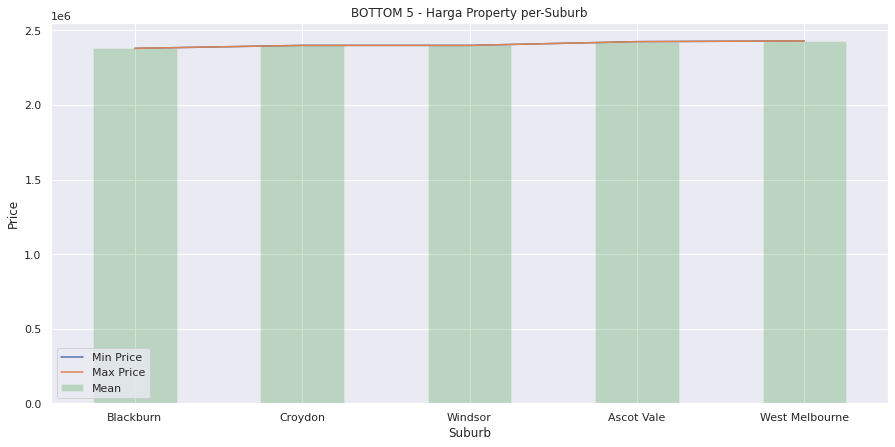

In [ ]:
ax = pd.DataFrame(suburb_price4[('Price',  'min')].values).plot(
    figsize=(15,7)
)
pd.DataFrame(suburb_price4[('Price',  'max')].values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame((suburb_price4[('Price',  'mean')])).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Suburb')
ax.set_ylabel('Price')
ax.set_title('BOTTOM 5 - Harga Property per-Suburb')
 
#ax2.set_ylabel('Mean Price')
 
ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')
plt.xticks(rotation=0)
 
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Type"])['Price'].count())

Price
Regionname                 Type       
Eastern Metropolitan       h        63
                           t         1
                           u         1
Northern Metropolitan      h        73
                           t         0
                           u         2
South-Eastern Metropolitan h         6
                           t         0
                           u         0
Southern Metropolitan      h       872
                           t        23
                           u        11
Western Metropolitan       h        37
                           t         0
                           u         0

Text(0, 0.5, 'Total')

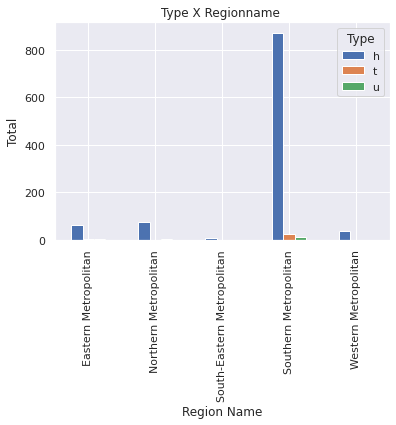

In [ ]:
counts = Melb_housing_4_3.groupby(["Regionname", "Type"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Regionname ")
plt.xticks(rotation=90)
plt.xlabel("Region Name")
plt.ylabel("Total")

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

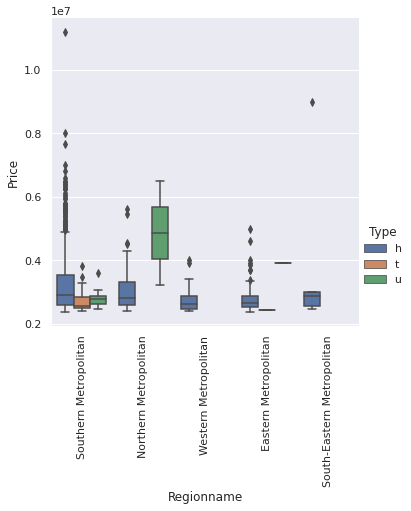

In [ ]:
p= sns.catplot(y="Price", x="Regionname", hue="Type", kind="box", data=Melb_housing_4_3)
plt.xticks(rotation=90)

In [ ]:
region_type3 = pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Type"]).agg({"Price":[min, max,'mean']})).fillna(0)
region_type3

Price                          
                                       min         max          mean
Regionname                 Type                                     
Eastern Metropolitan       h     2380000.0   5000000.0  2.847278e+06
                           t     2435000.0   2435000.0  2.435000e+06
                           u     3923000.0   3923000.0  3.923000e+06
Northern Metropolitan      h     2400000.0   5600000.0  3.064863e+06
                           t           0.0         0.0  0.000000e+00
                           u     3210000.0   6500000.0  4.855000e+06
South-Eastern Metropolitan h     2475000.0   9000000.0  3.787500e+06
                           t           0.0         0.0  0.000000e+00
                           u           0.0         0.0  0.000000e+00
Southern Metropolitan      h     2380000.0  11200000.0  3.225636e+06
                           t     2400000.0   3820000.0  2.741674e+06
                           u     2460000.0   3610000.0  2.821545e+06
Western Metropolitan       h     2390000.0   4020000.0  2.747838e+06
                           t           0.0         0.0  0.000000e+00
                           u           0.0         0.0  0.000000e+00

In [ ]:
region_type4 = region_type3.reset_index()
region_type4

Regionname Type      Price                          
                                           min         max          mean
0         Eastern Metropolitan    h  2380000.0   5000000.0  2.847278e+06
1         Eastern Metropolitan    t  2435000.0   2435000.0  2.435000e+06
2         Eastern Metropolitan    u  3923000.0   3923000.0  3.923000e+06
3        Northern Metropolitan    h  2400000.0   5600000.0  3.064863e+06
4        Northern Metropolitan    t        0.0         0.0  0.000000e+00
5        Northern Metropolitan    u  3210000.0   6500000.0  4.855000e+06
6   South-Eastern Metropolitan    h  2475000.0   9000000.0  3.787500e+06
7   South-Eastern Metropolitan    t        0.0         0.0  0.000000e+00
8   South-Eastern Metropolitan    u        0.0         0.0  0.000000e+00
9        Southern Metropolitan    h  2380000.0  11200000.0  3.225636e+06
10       Southern Metropolitan    t  2400000.0   3820000.0  2.741674e+06
11       Southern Metropolitan    u  2460000.0   3610000.0  2.821545e+06
12        Western Metropolitan    h  2390000.0   4020000.0  2.747838e+06
13        Western Metropolitan    t        0.0         0.0  0.000000e+00
14        Western Metropolitan    u        0.0         0.0  0.000000e+00

In [ ]:
region_type4.sort_values(('Price', 'mean'), ascending=False).head(3)

Regionname Type      Price                      
                                          min        max       mean
5       Northern Metropolitan    u  3210000.0  6500000.0  4855000.0
2        Eastern Metropolitan    u  3923000.0  3923000.0  3923000.0
6  South-Eastern Metropolitan    h  2475000.0  9000000.0  3787500.0

In [ ]:
region_type4.sort_values(('Price', 'mean'), ascending=True).head(3)

Regionname Type Price          
                                     min  max mean
4       Northern Metropolitan    t   0.0  0.0  0.0
7  South-Eastern Metropolitan    t   0.0  0.0  0.0
8  South-Eastern Metropolitan    u   0.0  0.0  0.0

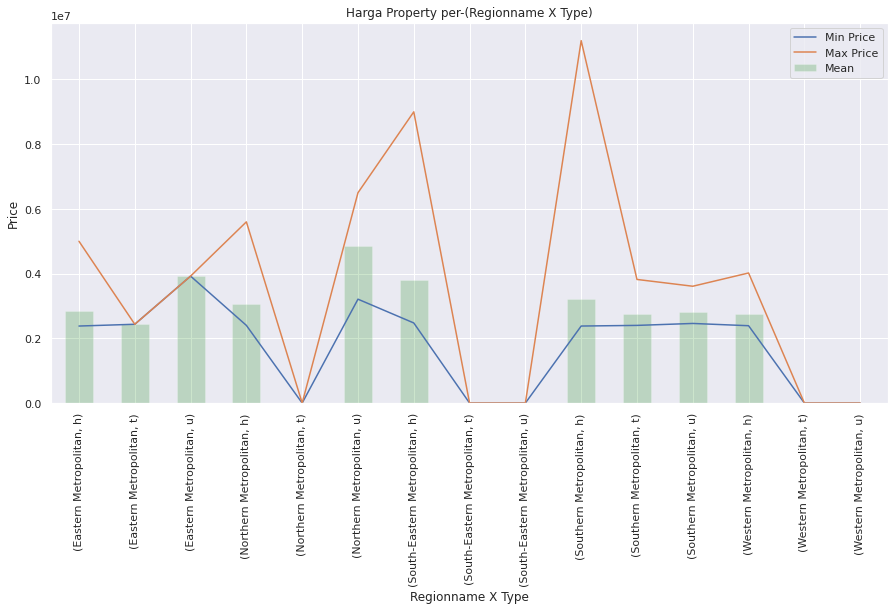

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Type"]).agg({"Price":[min]})).fillna(0).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Type"]).agg({"Price":[max]})).fillna(0).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Type"]).agg({"Price":['mean']})).fillna(0)).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('Regionname X Type')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-(Regionname X Type)')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')

plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Method"])['Price'].count())

Price
Regionname                 Method       
Eastern Metropolitan       PI          7
                           S          37
                           SA          0
                           SP          9
                           VB         12
Northern Metropolitan      PI          5
                           S          53
                           SA          0
                           SP          5
                           VB         12
South-Eastern Metropolitan PI          2
                           S           3
                           SA          0
                           SP          0
                           VB          1
Southern Metropolitan      PI        150
                           S         515
                           SA          5
                           SP         48
                           VB        188
Western Metropolitan       PI          7
                           S          21
                           SA          1
                           SP          4
                           VB          4

Text(0, 0.5, 'Total')

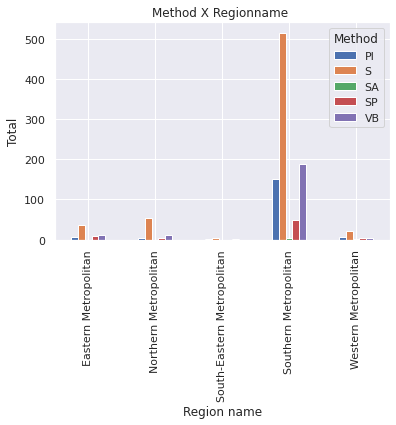

In [ ]:
counts = Melb_housing_4_3.groupby(["Regionname", "Method"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Method X Regionname ")
plt.xticks(rotation=90)
plt.xlabel("Region name")
plt.ylabel("Total")

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

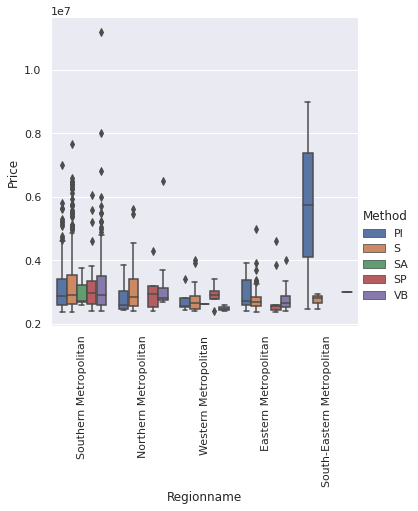

In [ ]:
p= sns.catplot(y="Price", x="Regionname", hue="Method", kind="box", data=Melb_housing_4_3)
plt.xticks(rotation=90)

In [ ]:
region_method3 = pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Method"]).agg({"Price":[min, max,'mean']}))
region_method3

Price                          
                                         min         max          mean
Regionname                 Method                                     
Eastern Metropolitan       PI      2400000.0   3900000.0  2.985143e+06
                           S       2380000.0   5000000.0  2.844392e+06
                           SA            NaN         NaN           NaN
                           SP      2380000.0   4600000.0  2.877000e+06
                           VB      2400000.0   4000000.0  2.808750e+06
Northern Metropolitan      PI      2420000.0   3850000.0  2.871000e+06
                           S       2400000.0   5600000.0  3.113962e+06
                           SA            NaN         NaN           NaN
                           SP      2400000.0   4300000.0  3.075000e+06
                           VB      2675000.0   6500000.0  3.222917e+06
South-Eastern Metropolitan PI      2475000.0   9000000.0  5.737500e+06
                           S       2480000.0   2950000.0  2.750000e+06
                           SA            NaN         NaN           NaN
                           SP            NaN         NaN           NaN
                           VB      3000000.0   3000000.0  3.000000e+06
Southern Metropolitan      PI      2385000.0   7000000.0  3.184373e+06
                           S       2380000.0   7650000.0  3.218434e+06
                           SA      2600000.0   3750000.0  2.996400e+06
                           SP      2400000.0   6050000.0  3.157156e+06
                           VB      2400000.0  11200000.0  3.219016e+06
Western Metropolitan       PI      2425000.0   3420000.0  2.722143e+06
                           S       2390000.0   4020000.0  2.781905e+06
                           SA      2625000.0   2625000.0  2.625000e+06
                           SP      2400000.0   3400000.0  2.905000e+06
                           VB      2400000.0   2600000.0  2.487500e+06

In [ ]:
region_method4 = region_method3.reset_index()
region_method4

Regionname Method      Price                          
                                             min         max          mean
0         Eastern Metropolitan     PI  2400000.0   3900000.0  2.985143e+06
1         Eastern Metropolitan      S  2380000.0   5000000.0  2.844392e+06
2         Eastern Metropolitan     SA        NaN         NaN           NaN
3         Eastern Metropolitan     SP  2380000.0   4600000.0  2.877000e+06
4         Eastern Metropolitan     VB  2400000.0   4000000.0  2.808750e+06
5        Northern Metropolitan     PI  2420000.0   3850000.0  2.871000e+06
6        Northern Metropolitan      S  2400000.0   5600000.0  3.113962e+06
7        Northern Metropolitan     SA        NaN         NaN           NaN
8        Northern Metropolitan     SP  2400000.0   4300000.0  3.075000e+06
9        Northern Metropolitan     VB  2675000.0   6500000.0  3.222917e+06
10  South-Eastern Metropolitan     PI  2475000.0   9000000.0  5.737500e+06
11  South-Eastern Metropolitan      S  2480000.0   2950000.0  2.750000e+06
12  South-Eastern Metropolitan     SA        NaN         NaN           NaN
13  South-Eastern Metropolitan     SP        NaN         NaN           NaN
14  South-Eastern Metropolitan     VB  3000000.0   3000000.0  3.000000e+06
15       Southern Metropolitan     PI  2385000.0   7000000.0  3.184373e+06
16       Southern Metropolitan      S  2380000.0   7650000.0  3.218434e+06
17       Southern Metropolitan     SA  2600000.0   3750000.0  2.996400e+06
18       Southern Metropolitan     SP  2400000.0   6050000.0  3.157156e+06
19       Southern Metropolitan     VB  2400000.0  11200000.0  3.219016e+06
20        Western Metropolitan     PI  2425000.0   3420000.0  2.722143e+06
21        Western Metropolitan      S  2390000.0   4020000.0  2.781905e+06
22        Western Metropolitan     SA  2625000.0   2625000.0  2.625000e+06
23        Western Metropolitan     SP  2400000.0   3400000.0  2.905000e+06
24        Western Metropolitan     VB  2400000.0   2600000.0  2.487500e+06

In [ ]:
region_method4.sort_values(('Price','mean'),ascending=False).head(3)

Regionname Method      Price                          
                                             min         max          mean
10  South-Eastern Metropolitan     PI  2475000.0   9000000.0  5.737500e+06
9        Northern Metropolitan     VB  2675000.0   6500000.0  3.222917e+06
19       Southern Metropolitan     VB  2400000.0  11200000.0  3.219016e+06

In [ ]:
region_method4.sort_values(('Price','mean'),ascending=True).head(3)

Regionname Method      Price                         
                                       min        max          mean
24  Western Metropolitan     VB  2400000.0  2600000.0  2.487500e+06
22  Western Metropolitan     SA  2625000.0  2625000.0  2.625000e+06
20  Western Metropolitan     PI  2425000.0  3420000.0  2.722143e+06

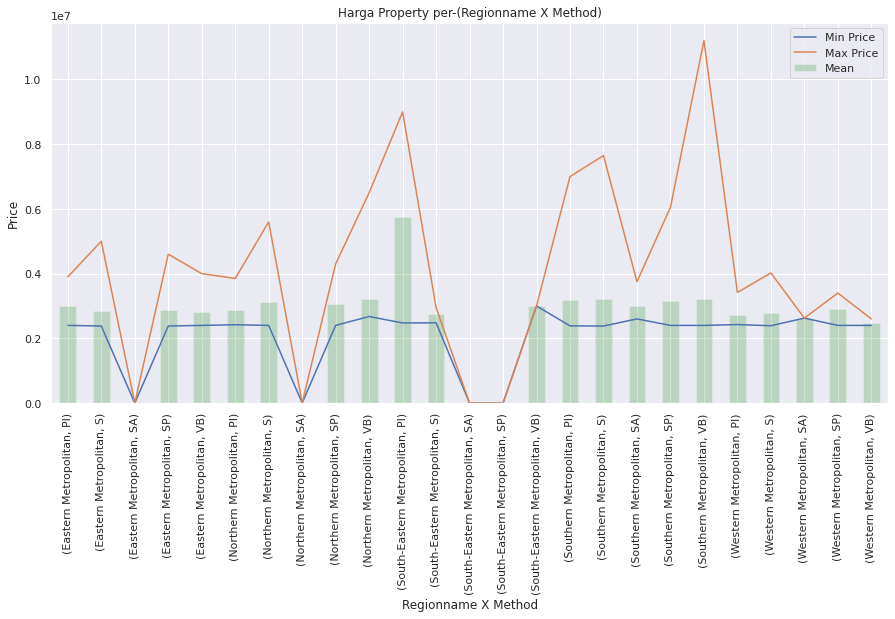

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Method"]).agg({"Price":[min]})).fillna(0).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Method"]).agg({"Price":[max]})).fillna(0).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Regionname", "Method"]).agg({"Price":['mean']})).fillna(0)).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('Regionname X Method')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-(Regionname X Method)')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')

plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby(["Method", "Type"])['Price'].count())

Price
Method Type       
PI     h       169
       t         2
       u         0
S      h       609
       t         9
       u        11
SA     h         6
       t         0
       u         0
SP     h        58
       t         7
       u         1
VB     h       209
       t         6
       u         2

Text(0, 0.5, 'Total')

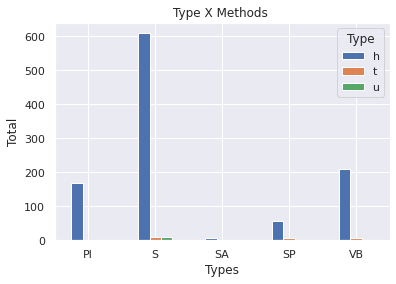

In [ ]:
counts = Melb_housing_4_3.groupby(["Method", "Type"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Methods ")
plt.xticks(rotation=0)
plt.xlabel("Types")
plt.ylabel("Total")

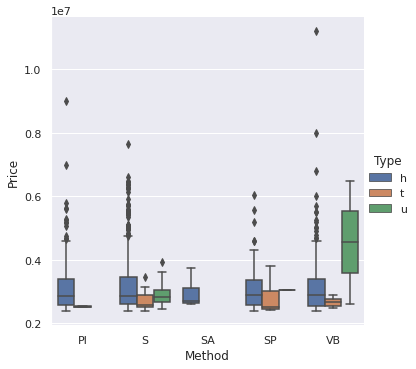

In [ ]:
p = sns.catplot(y="Price", x="Method", hue="Type", kind="box", data=Melb_housing_4_3)

In [ ]:
method_type3 = pd.DataFrame(Melb_housing_4_3.groupby(["Method", "Type"]).agg({"Price":[min, max,'mean']}))
method_type3

Price                          
                   min         max          mean
Method Type                                     
PI     h     2385000.0   9000000.0  3.185663e+06
       t     2500000.0   2560000.0  2.530000e+06
       u           NaN         NaN           NaN
S      h     2380000.0   7650000.0  3.180969e+06
       t     2400000.0   3475000.0  2.746222e+06
       u     2460000.0   3923000.0  2.956364e+06
SA     h     2600000.0   3750000.0  2.934500e+06
       t           NaN         NaN           NaN
       u           NaN         NaN           NaN
SP     h     2380000.0   6050000.0  3.132569e+06
       t     2435000.0   3820000.0  2.813214e+06
       u     3050000.0   3050000.0  3.050000e+06
VB     h     2400000.0  11200000.0  3.183636e+06
       t     2475000.0   2900000.0  2.670833e+06
       u     2600000.0   6500000.0  4.550000e+06

In [ ]:
method_type4 = method_type3.reset_index()
method_type4

Method Type      Price                          
                      min         max          mean
0      PI    h  2385000.0   9000000.0  3.185663e+06
1      PI    t  2500000.0   2560000.0  2.530000e+06
2      PI    u        NaN         NaN           NaN
3       S    h  2380000.0   7650000.0  3.180969e+06
4       S    t  2400000.0   3475000.0  2.746222e+06
5       S    u  2460000.0   3923000.0  2.956364e+06
6      SA    h  2600000.0   3750000.0  2.934500e+06
7      SA    t        NaN         NaN           NaN
8      SA    u        NaN         NaN           NaN
9      SP    h  2380000.0   6050000.0  3.132569e+06
10     SP    t  2435000.0   3820000.0  2.813214e+06
11     SP    u  3050000.0   3050000.0  3.050000e+06
12     VB    h  2400000.0  11200000.0  3.183636e+06
13     VB    t  2475000.0   2900000.0  2.670833e+06
14     VB    u  2600000.0   6500000.0  4.550000e+06

In [ ]:
method_type4.sort_values(('Price','mean'),ascending=False).head(3)

Method Type      Price                          
                      min         max          mean
14     VB    u  2600000.0   6500000.0  4.550000e+06
0      PI    h  2385000.0   9000000.0  3.185663e+06
12     VB    h  2400000.0  11200000.0  3.183636e+06

In [ ]:
method_type4.sort_values(('Price','mean'),ascending=True).head(3)

Method Type      Price                         
                      min        max          mean
1      PI    t  2500000.0  2560000.0  2.530000e+06
13     VB    t  2475000.0  2900000.0  2.670833e+06
4       S    t  2400000.0  3475000.0  2.746222e+06

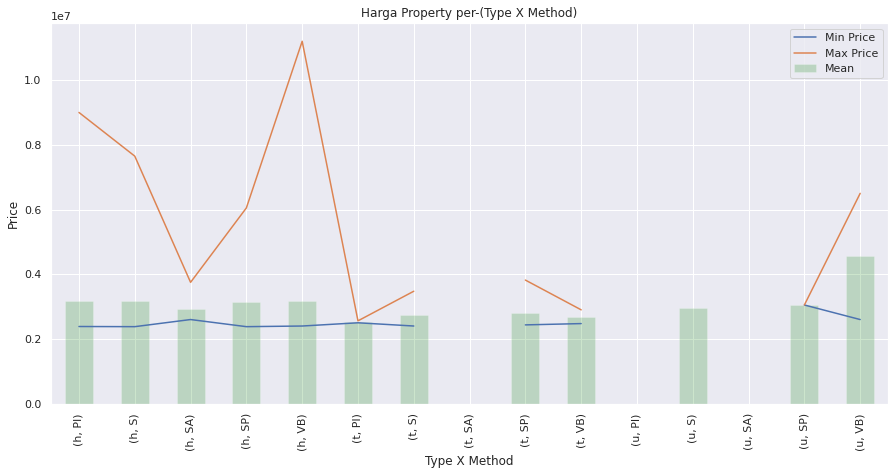

In [ ]:
ax = pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Type", "Method"]).agg({"Price":[min]})).values).plot(
    figsize=(15,7)
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Type", "Method"]).agg({"Price":[max]})).values).plot(
    ax=ax,
    grid=True
)
pd.DataFrame(pd.DataFrame(Melb_housing_4_3.groupby(["Type", "Method"]).agg({"Price":['mean']}))).plot.bar(
    ax=ax,
    grid=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('Type X Method')
ax.set_ylabel('Price')
ax.set_title('Harga Property per-(Type X Method)')

#ax2.set_ylabel('Mean Price')

ax.legend(['Min Price', 'Max Price','Mean'])
#ax2.legend(['Mean'], loc='upper left')

plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby(["Type", "Rooms_2"]).agg({"Price":[min, max,'count','mean','sum']}))

Price                                              
                    min         max count          mean           sum
Type Rooms_2                                                         
h    1        2450000.0   2605000.0     2  2.527500e+06  5.055000e+06
     2        2400000.0   4800000.0    16  2.966375e+06  4.746200e+07
     3        2380000.0   9000000.0   193  3.018974e+06  5.826620e+08
     4        2380000.0  11200000.0   519  3.135911e+06  1.627538e+09
     >4       2400000.0   8000000.0   321  3.356841e+06  1.077546e+09
t    1              NaN         NaN     0           NaN           NaN
     2        2550000.0   2550000.0     1  2.550000e+06  2.550000e+06
     3        2400000.0   3475000.0    10  2.803750e+06  2.803750e+07
     4        2435000.0   3820000.0    12  2.691250e+06  3.229500e+07
     >4       2611000.0   2611000.0     1  2.611000e+06  2.611000e+06
u    1        3050000.0   3050000.0     1  3.050000e+06  3.050000e+06
     2        2660000.0   3923000.0     3  3.145000e+06  9.435000e+06
     3        2460000.0   6500000.0     7  3.206429e+06  2.244500e+07
     4        2920000.0   3610000.0     2  3.265000e+06  6.530000e+06
     >4       3210000.0   3210000.0     1  3.210000e+06  3.210000e+06

Text(0, 0.5, 'Total')

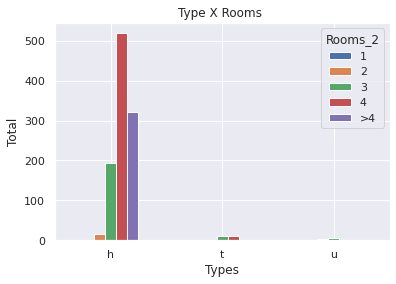

In [ ]:
counts = Melb_housing_4_3.groupby(["Type", "Rooms_2"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Rooms ")
plt.xticks(rotation=0)
plt.xlabel("Types")
plt.ylabel("Total")

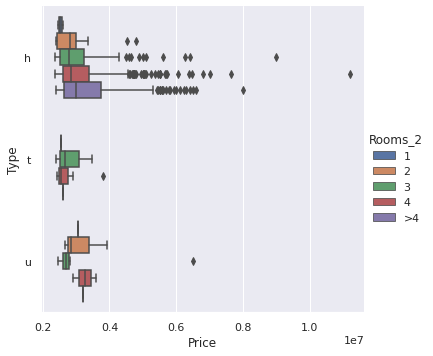

In [ ]:
p = sns.catplot(x="Price", y="Type", hue="Rooms_2", kind="box", data=Melb_housing_4_3)

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby(["Type", "Bathroom_2"]).agg({"Price":[min, max,'count','mean','sum']}))

Price                                              
                       min         max count          mean           sum
Type Bathroom_2                                                         
h    1           2380000.0   9000000.0   233  3.219225e+06  7.500795e+08
     2           2380000.0   7650000.0   398  3.003901e+06  1.195552e+09
     >2          2385000.0  11200000.0   420  3.320550e+06  1.394631e+09
t    1           2435000.0   2800000.0     7  2.553000e+06  1.787100e+07
     2           2440000.0   3820000.0     8  2.945625e+06  2.356500e+07
     >2          2400000.0   3475000.0     9  2.673056e+06  2.405750e+07
u    1           2600000.0   6500000.0    12  3.216667e+06  3.860000e+07
     2           2460000.0   2460000.0     1  2.460000e+06  2.460000e+06
     >2          3610000.0   3610000.0     1  3.610000e+06  3.610000e+06

Text(0, 0.5, 'Total')

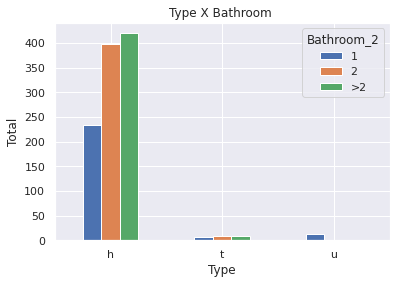

In [ ]:
counts = Melb_housing_4_3.groupby(["Type", "Bathroom_2"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Bathroom ")
plt.xticks(rotation=0)
plt.xlabel("Type")
plt.ylabel("Total")

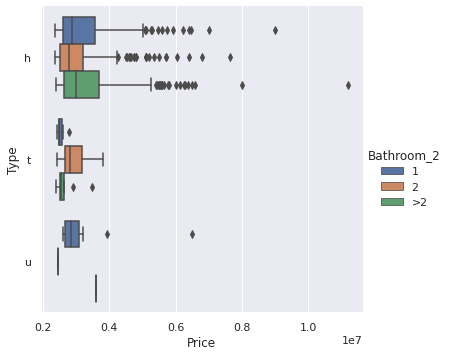

In [ ]:
p = sns.catplot(x="Price", y="Type", hue="Bathroom_2", kind="box", data=Melb_housing_4_3)

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby(["Type", "Car_2"]).agg({"Price":[min, max,'count','mean','sum']}))

Price                                              
                  min         max count          mean           sum
Type Car_2                                                         
h    0      2385000.0   7000000.0   195  3.271197e+06  6.378835e+08
     1      2380000.0   9000000.0   102  3.025314e+06  3.085820e+08
     2      2380000.0  11200000.0   527  3.065352e+06  1.615440e+09
     >2     2400000.0   8000000.0   227  3.428885e+06  7.783570e+08
t    0      2435000.0   2800000.0     7  2.553000e+06  1.787100e+07
     1      3475000.0   3475000.0     1  3.475000e+06  3.475000e+06
     2      2400000.0   3820000.0    10  2.772750e+06  2.772750e+07
     >2     2440000.0   3275000.0     6  2.736667e+06  1.642000e+07
u    0      2600000.0   6500000.0    12  3.216667e+06  3.860000e+07
     1            NaN         NaN     0           NaN           NaN
     2      2460000.0   2460000.0     1  2.460000e+06  2.460000e+06
     >2     3610000.0   3610000.0     1  3.610000e+06  3.610000e+06

Text(0, 0.5, 'Total')

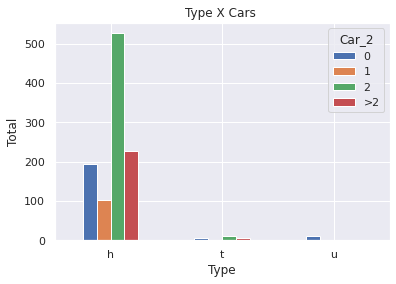

In [ ]:
counts = Melb_housing_4_3.groupby(["Type", "Car_2"])['Price'].count().unstack()
counts.plot(kind="bar")
plt.title("Type X Cars ")
plt.xticks(rotation=0)
plt.xlabel("Type")
plt.ylabel("Total")

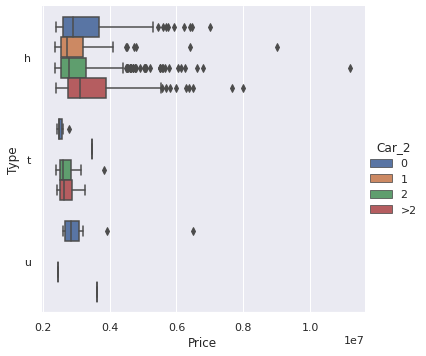

In [ ]:
p = sns.catplot(x="Price", y="Type", hue="Car_2", kind="box", data=Melb_housing_4_3)

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby(['Regionname','CouncilArea'])['CouncilArea'].count())

CouncilArea
Regionname                 CouncilArea                            
Eastern Metropolitan       Banyule City Council                 25
                           Boroondara City Council              10
                           Manningham City Council              11
                           Maroondah City Council                1
                           Monash City Council                  12
                           Whitehorse City Council               6
Northern Metropolitan      Darebin City Council                 14
                           Melbourne City Council               26
                           Moreland City Council                 9
                           Yarra City Council                   26
South-Eastern Metropolitan Kingston City Council                 2
                           Monash City Council                   4
Southern Metropolitan      Bayside City Council                180
                           Boroondara City Council             441
                           Glen Eira City Council               25
                           Melbourne City Council               38
                           Monash City Council                   2
                           Port Phillip City Council            66
                           Stonnington City Council            154
Western Metropolitan       Hobsons Bay City Council             15
                           Maribyrnong City Council              2
                           Moonee Valley City Council           20

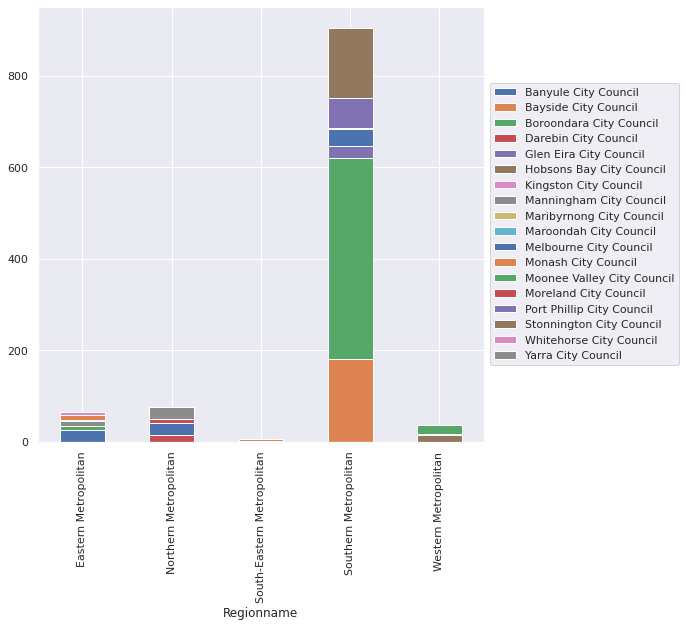

In [ ]:
CT = pd.crosstab(index=Melb_housing_4_3["Regionname"], columns=Melb_housing_4_3["CouncilArea"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)
p.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
Melb_housing_4_3.sort_values(('Landsize'),ascending=False)

Suburb  Rooms Type  ...  Rooms_2 Bathroom_2 Car_2
7912   Port Melbourne      3    u  ...        3          2     2
14342         Donvale      7    h  ...       >4          2    >2
33863      Warrandyte      5    h  ...       >4         >2    >2
16875         Donvale      5    h  ...       >4         >2    >2
29135     Templestowe      6    h  ...       >4         >2    >2
...               ...    ...  ...  ...      ...        ...   ...
166       Albert Park      3    h  ...        3          2     0
9312      South Yarra      4    h  ...        4          2     2
23378  Port Melbourne      4    t  ...        4         >2     2
18036         Fitzroy      3    h  ...        3         >2     1
31744         Fitzroy      3    h  ...        3         >2     1

[1089 rows x 17 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.set_index('Date')['Price'].resample('Y').sum())

Price
Date                    
2016-12-31  1.111799e+09
2017-12-31  1.934365e+09
2018-12-31  4.042620e+08

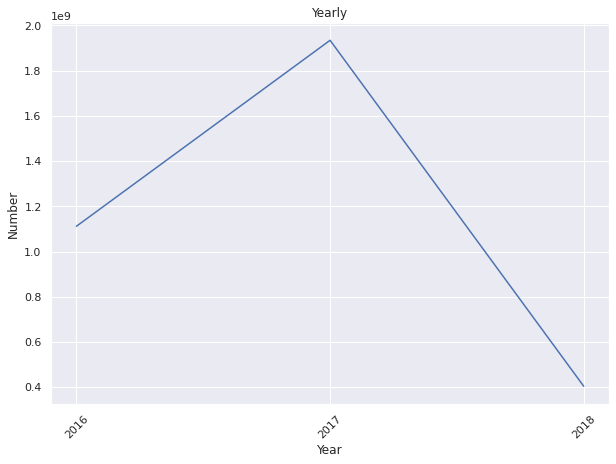

In [ ]:
ax = pd.DataFrame(Melb_housing_4_3.set_index('Date')['Price'].resample('Y').sum().values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('Yearly' )
plt.xticks(
    range(len(Melb_housing_4_3.set_index('Date')['Price'].resample('Y').sum().index)), 
    [x.strftime('%Y') for x in Melb_housing_4_3.set_index('Date')['Price'].resample('Y').sum().index], 
    rotation=45
)
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.set_index('Date')['Price'].resample('M').sum())

Price
Date                   
2016-03-31  136814000.0
2016-04-30   61446000.0
2016-05-31  125307000.0
2016-06-30  101379000.0
2016-07-31   87232000.0
2016-08-31  129114500.0
2016-09-30   49340000.0
2016-10-31  182332388.0
2016-11-30  164927500.0
2016-12-31   73907000.0
2017-01-31   30287000.0
2017-02-28   69077000.0
2017-03-31  185510500.0
2017-04-30  101007000.0
2017-05-31  213173000.0
2017-06-30  139626000.0
2017-07-31   62320000.0
2017-08-31  177771500.0
2017-09-30  282138000.0
2017-10-31  302729000.0
2017-11-30  286048000.0
2017-12-31   84678000.0
2018-01-31          0.0
2018-02-28  135309000.0
2018-03-31  214678000.0
2018-04-30          0.0
2018-05-31          0.0
2018-06-30   51810000.0
2018-07-31          0.0
2018-08-31          0.0
2018-09-30          0.0
2018-10-31    2465000.0

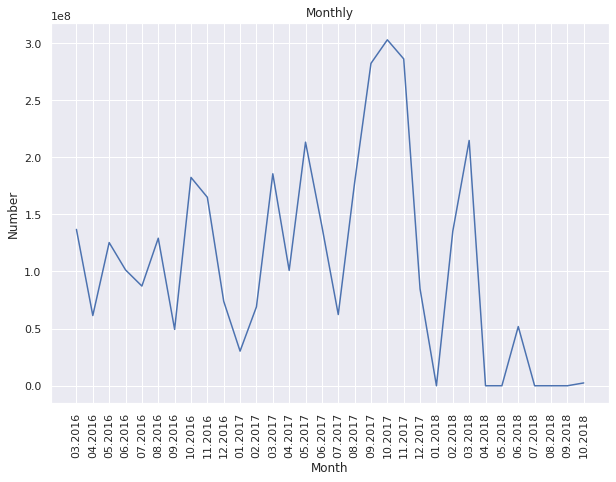

In [ ]:
ax = pd.DataFrame(Melb_housing_4_3.set_index('Date')['Price'].resample('M').sum().values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)


ax.set_xlabel('Month')
ax.set_ylabel('Number')
ax.set_title('Monthly' )
plt.xticks(
    range(len(Melb_housing_4_3.set_index('Date')['Price'].resample('M').sum().index)), 
    [x.strftime('%m.%Y') for x in Melb_housing_4_3.set_index('Date')['Price'].resample('M').sum().index], 
    rotation=90
)
plt.show()

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Regionname').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean']}))

Price             ... Distance           
                                   max        min  ...      min       mean
Regionname                                         ...                    
Eastern Metropolitan         5000000.0  2380000.0  ...      7.8  12.096923
Northern Metropolitan        6500000.0  2400000.0  ...      0.0   3.264000
South-Eastern Metropolitan   9000000.0  2475000.0  ...     16.7  19.000000
Southern Metropolitan       11200000.0  2380000.0  ...      0.7   7.923289
Western Metropolitan         4020000.0  2390000.0  ...      4.3   7.421622

[5 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Regionname').agg({"Price" : [max,min,'mean',sum] ,"Landsize":[max,min,'mean']}))

Price             ... Landsize             
                                   max        min  ...      min         mean
Regionname                                         ...                      
Eastern Metropolitan         5000000.0  2380000.0  ...    402.0  1217.907692
Northern Metropolitan        6500000.0  2400000.0  ...     95.0   472.733333
South-Eastern Metropolitan   9000000.0  2475000.0  ...    512.0   664.166667
Southern Metropolitan       11200000.0  2380000.0  ...    123.0   667.504415
Western Metropolitan         4020000.0  2390000.0  ...    247.0   773.621622

[5 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean']})).sort_values(('Price', 'mean'),ascending=False).head(10)

Price                           ... Distance                 
                      max        min          mean  ...      max   min       mean
Suburb                                              ...                          
Melbourne       6500000.0  6500000.0  6.500000e+06  ...      0.0   0.0   0.000000
Mulgrave        9000000.0  2480000.0  5.740000e+06  ...     18.8  18.8  18.800000
Mitcham         5000000.0  5000000.0  5.000000e+06  ...     17.2  17.2  17.200000
Carlton         5460000.0  3825000.0  4.642500e+06  ...      1.6   1.6   1.600000
Armadale        7000000.0  2385000.0  4.046140e+06  ...      6.3   6.3   6.300000
East Melbourne  4550000.0  2850000.0  3.944000e+06  ...      1.5   1.3   1.420000
Toorak          6460000.0  2400000.0  3.910763e+06  ...      4.6   4.1   4.428947
Middle Park     6400000.0  2500000.0  3.732588e+06  ...      4.1   3.0   3.323529
Hawthorn        7650000.0  2402500.0  3.658132e+06  ...      5.3   4.6   5.032353
Malvern         6600000.0  2400000.0  3.624048e+06  ...      7.4   5.9   6.507143

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean']})).sort_values(('Distance', 'mean'),ascending=True).head(10)

Price                           ... Distance               
                       max        min          mean  ...      max  min      mean
Suburb                                               ...                        
Melbourne        6500000.0  6500000.0  6.500000e+06  ...      0.0  0.0  0.000000
Southbank        2685000.0  2685000.0  2.685000e+06  ...      0.7  0.7  0.700000
East Melbourne   4550000.0  2850000.0  3.944000e+06  ...      1.5  1.3  1.420000
Carlton          5460000.0  3825000.0  4.642500e+06  ...      1.6  1.6  1.600000
South Melbourne  4600000.0  2525000.0  3.439222e+06  ...      2.1  1.9  1.944444
Fitzroy          4011000.0  2478000.0  3.031000e+06  ...      2.1  1.6  1.988889
Parkville        5600000.0  2675000.0  3.535000e+06  ...      2.6  1.8  2.257143
North Melbourne  2920000.0  2920000.0  2.920000e+06  ...      2.3  2.3  2.300000
Richmond         3335000.0  2640000.0  3.002556e+06  ...      2.6  2.4  2.555556
West Melbourne   2430000.0  2430000.0  2.430000e+06  ...      3.1  3.1  3.100000

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Landsize":[max,min,'mean']})).sort_values(('Price', 'mean'),ascending=False).head(10)

Price                           ... Landsize                   
                      max        min          mean  ...      max    min        mean
Suburb                                              ...                            
Melbourne       6500000.0  6500000.0  6.500000e+06  ...    512.0  512.0  512.000000
Mulgrave        9000000.0  2480000.0  5.740000e+06  ...    744.0  512.0  628.000000
Mitcham         5000000.0  5000000.0  5.000000e+06  ...    512.0  512.0  512.000000
Carlton         5460000.0  3825000.0  4.642500e+06  ...    512.0  316.0  414.000000
Armadale        7000000.0  2385000.0  4.046140e+06  ...   1581.0  256.0  638.640000
East Melbourne  4550000.0  2850000.0  3.944000e+06  ...    512.0  220.0  386.800000
Toorak          6460000.0  2400000.0  3.910763e+06  ...   1317.0  224.0  551.394737
Middle Park     6400000.0  2500000.0  3.732588e+06  ...    553.0  160.0  330.529412
Hawthorn        7650000.0  2402500.0  3.658132e+06  ...   1690.0  249.0  700.235294
Malvern         6600000.0  2400000.0  3.624048e+06  ...    950.0  283.0  581.619048

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Landsize":[max,min,'mean']})).sort_values(('Landsize', 'mean'),ascending=True).head(10)

Price                           ... Landsize                   
                       max        min          mean  ...      max    min        mean
Suburb                                               ...                            
Windsor          2400000.0  2400000.0  2.400000e+06  ...    201.0  201.0  201.000000
Albert Park      4735000.0  2485000.0  3.065789e+06  ...    512.0  147.0  276.473684
Kensington       2500000.0  2500000.0  2.500000e+06  ...    277.0  277.0  277.000000
Fitzroy          4011000.0  2478000.0  3.031000e+06  ...    512.0   95.0  287.000000
North Melbourne  2920000.0  2920000.0  2.920000e+06  ...    310.0  310.0  310.000000
Middle Park      6400000.0  2500000.0  3.732588e+06  ...    553.0  160.0  330.529412
South Melbourne  4600000.0  2525000.0  3.439222e+06  ...    512.0  150.0  343.888889
South Yarra      5700000.0  2395000.0  2.978048e+06  ...    564.0  141.0  382.857143
Parkville        5600000.0  2675000.0  3.535000e+06  ...    512.0  180.0  385.714286
East Melbourne   4550000.0  2850000.0  3.944000e+06  ...    512.0  220.0  386.800000

[10 rows x 7 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('SellerG').agg({"Price" : [max,min,'mean',sum,'count']})).sort_values(('Price', 'count'),ascending=False).head(10)

Price                                             
                      max        min          mean           sum count
SellerG                                                               
Marshall        6800000.0  2381000.0  3.255211e+06  1.077475e+09   331
Jellis          6600000.0  2380000.0  3.111430e+06  6.191745e+08   199
Kay             7000000.0  2400000.0  3.492781e+06  2.235380e+08    64
RT              6460000.0  2405000.0  3.464000e+06  2.009120e+08    58
Nelson          5600000.0  2420000.0  3.006270e+06  1.503135e+08    50
Buxton          5150000.0  2390000.0  2.980479e+06  1.430630e+08    48
hockingstuart  11200000.0  2395000.0  3.136023e+06  1.348490e+08    43
Fletchers       4600000.0  2400000.0  2.849891e+06  9.119650e+07    32
Greg            6370000.0  2400000.0  3.195889e+06  8.628900e+07    27
Hodges          4700000.0  2400000.0  2.958599e+06  5.621339e+07    19

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean'],"Propertycount":['unique']})).sort_values(('Price', 'mean'),ascending=False).head(10)

Price             ...   Distance Propertycount
                      max        min  ...       mean        unique
Suburb                                ...                         
Melbourne       6500000.0  6500000.0  ...   0.000000     [17496.0]
Mulgrave        9000000.0  2480000.0  ...  18.800000      [7113.0]
Mitcham         5000000.0  5000000.0  ...  17.200000      [6871.0]
Carlton         5460000.0  3825000.0  ...   1.600000      [6786.0]
Armadale        7000000.0  2385000.0  ...   6.300000      [4836.0]
East Melbourne  4550000.0  2850000.0  ...   1.420000      [3040.0]
Toorak          6460000.0  2400000.0  ...   4.428947      [7217.0]
Middle Park     6400000.0  2500000.0  ...   3.323529      [2019.0]
Hawthorn        7650000.0  2402500.0  ...   5.032353     [11308.0]
Malvern         6600000.0  2400000.0  ...   6.507143      [4675.0]

[10 rows x 8 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean'],"Propertycount":['unique']})).sort_values(('Distance', 'mean'),ascending=True).head(10)

Price             ...  Distance Propertycount
                       max        min  ...      mean        unique
Suburb                                 ...                        
Melbourne        6500000.0  6500000.0  ...  0.000000     [17496.0]
Southbank        2685000.0  2685000.0  ...  0.700000      [8400.0]
East Melbourne   4550000.0  2850000.0  ...  1.420000      [3040.0]
Carlton          5460000.0  3825000.0  ...  1.600000      [6786.0]
South Melbourne  4600000.0  2525000.0  ...  1.944444      [5943.0]
Fitzroy          4011000.0  2478000.0  ...  1.988889      [5825.0]
Parkville        5600000.0  2675000.0  ...  2.257143      [2309.0]
North Melbourne  2920000.0  2920000.0  ...  2.300000      [6821.0]
Richmond         3335000.0  2640000.0  ...  2.555556     [14949.0]
West Melbourne   2430000.0  2430000.0  ...  3.100000      [2230.0]

[10 rows x 8 columns]

In [ ]:
pd.DataFrame(Melb_housing_4_3.groupby('Suburb').agg({"Price" : [max,min,'mean',sum] ,"Distance":[max,min,'mean'],"Propertycount":['unique']})).sort_values(('Propertycount', 'unique'),ascending=False).head(10)

Price             ...   Distance Propertycount
                      max        min  ...       mean        unique
Suburb                                ...                         
Melbourne       6500000.0  6500000.0  ...   0.000000     [17496.0]
Glen Waverley   3056000.0  2380000.0  ...  16.700000     [15321.0]
Richmond        3335000.0  2640000.0  ...   2.555556     [14949.0]
South Yarra     5700000.0  2395000.0  ...   3.100000     [14887.0]
Mount Waverley  2820000.0  2420000.0  ...  14.200000     [13366.0]
St Kilda        5046000.0  2400000.0  ...   5.660000     [13240.0]
Croydon         2400000.0  2400000.0  ...  23.000000     [11925.0]
Brunswick       2545000.0  2500000.0  ...   5.200000     [11918.0]
Northcote       4300000.0  2450000.0  ...   5.388889     [11364.0]
Hawthorn        7650000.0  2402500.0  ...   5.032353     [11308.0]

[10 rows x 8 columns]

In [ ]:
Melb_housing_4_3.groupby('Regionname').describe(include=['category']).T

Regionname        Eastern Metropolitan  ... Western Metropolitan
Type       count                    65  ...                   37
           unique                    3  ...                    1
           top                       h  ...                    h
           freq                     63  ...                   37
Method     count                    65  ...                   37
           unique                    4  ...                    5
           top                       S  ...                    S
           freq                     37  ...                   21
SellerG    count                    65  ...                   37
           unique                   17  ...                   14
           top                   Miles  ...               Nelson
           freq                     16  ...                   10
Rooms_2    count                    65  ...                   37
           unique                    4  ...                    3
           top                       4  ...                    4
           freq                     26  ...                   17
Bathroom_2 count                    65  ...                   37
           unique                    3  ...                    3
           top                      >2  ...                   >2
           freq                     26  ...                   21
Car_2      count                    65  ...                   37
           unique                    4  ...                    4
           top                       2  ...                    2
           freq                     29  ...                   20

[24 rows x 5 columns]

In [ ]:
Melb_housing_4_3.groupby('Suburb').describe(include=['category']).T

Suburb            Aberfeldie Albert Park  ... Windsor Yarraville
Type       count           5          19  ...       1          1
           unique          1           1  ...       1          1
           top             h           h  ...       h          h
           freq            5          19  ...       1          1
Method     count           5          19  ...       1          1
           unique          2           3  ...       1          1
           top             S           S  ...      SP         VB
           freq            4          14  ...       1          1
SellerG    count           5          19  ...       1          1
           unique          3           6  ...       1          1
           top        Nelson        Greg  ...     Kay    Village
           freq            3           9  ...       1          1
Rooms_2    count           5          19  ...       1          1
           unique          2           4  ...       1          1
           top             4           4  ...       4         >4
           freq            3           8  ...       1          1
Bathroom_2 count           5          19  ...       1          1
           unique          2           3  ...       1          1
           top            >2           2  ...      >2         >2
           freq            3           9  ...       1          1
Car_2      count           5          19  ...       1          1
           unique          2           3  ...       1          1
           top             2           1  ...       1          2
           freq            3          11  ...       1          1

[24 rows x 90 columns]

In [ ]:
overall_best_agent2 = pd.DataFrame(Melb_housing_4_3.groupby('SellerG')['SellerG'].count())
overall_best_agent2

SellerG
SellerG                             
@Realty                            0
AIME                               0
ASL                                0
Abercromby's                       7
Ace                                0
...                              ...
hockingstuart/hockingstuart        0
iHomes                             0
iProperty                          0
iSell                              0
iTRAK                              0

[338 rows x 1 columns]

In [ ]:
overall_best_agent2.rename(columns={"SellerG": "Counts"}, inplace=True)

In [ ]:
overall_best_agent2.sort_values('Counts',ascending=False).head(5)

Counts
SellerG         
Marshall     331
Jellis       199
Kay           64
RT            58
Nelson        50

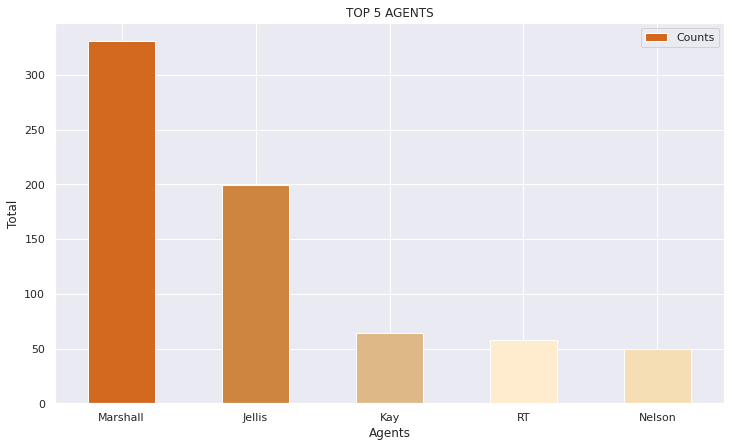

In [ ]:
ax = overall_best_agent2.sort_values('Counts',ascending=False).head(5).plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color=[['chocolate', 'peru', 'burlywood', 'blanchedalmond', 'wheat']]
)

ax.set_title('TOP 5 AGENTS')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Melb_housing_4_3['SellerG_2']= Melb_housing_4_3["SellerG"].astype('object')

In [ ]:
region_best_agent2 = pd.DataFrame(Melb_housing_4_3.groupby(['Regionname','SellerG_2'])['SellerG_2'].count())
region_best_agent2

SellerG_2
Regionname           SellerG_2           
Eastern Metropolitan Barry              5
                     Buxton             2
                     Fletchers          6
                     Harcourts          1
                     Jellis            11
...                                   ...
Western Metropolitan Rendina            2
                     S&L                1
                     Sweeney            3
                     Village            1
                     Williams           4

[104 rows x 1 columns]

In [ ]:
region_best_agent2.rename(columns={"SellerG_2": "Counts"}, inplace=True)

In [ ]:
region_best_agent2 = region_best_agent2.reset_index(level='Regionname')
region_best_agent2

Regionname  Counts
SellerG_2                              
Barry      Eastern Metropolitan       5
Buxton     Eastern Metropolitan       2
Fletchers  Eastern Metropolitan       6
Harcourts  Eastern Metropolitan       1
Jellis     Eastern Metropolitan      11
...                         ...     ...
Rendina    Western Metropolitan       2
S&L        Western Metropolitan       1
Sweeney    Western Metropolitan       3
Village    Western Metropolitan       1
Williams   Western Metropolitan       4

[104 rows x 2 columns]

In [ ]:
top3_agent_em2 = region_best_agent2[region_best_agent2['Regionname']=='Eastern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_em2

Regionname  Counts
SellerG_2                              
Miles      Eastern Metropolitan      16
Jellis     Eastern Metropolitan      11
Fletchers  Eastern Metropolitan       6

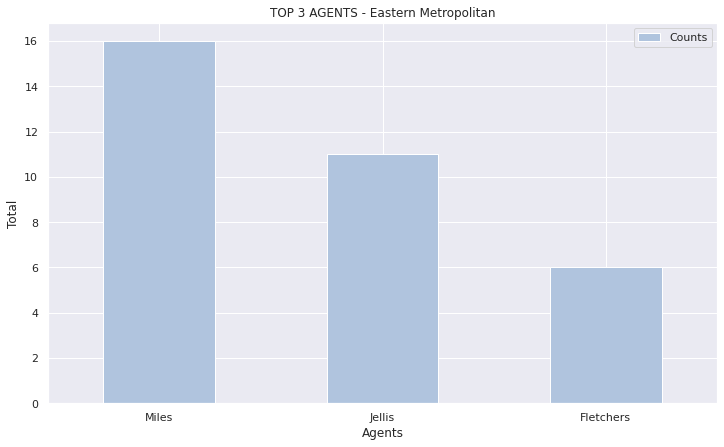

In [ ]:
ax = top3_agent_em2.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='lightsteelblue'
)

ax.set_title('TOP 3 AGENTS - Eastern Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_nm2 = region_best_agent2[region_best_agent2['Regionname']=='Northern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_nm2

Regionname  Counts
SellerG_2                               
Nelson     Northern Metropolitan      30
Jellis     Northern Metropolitan      15
Collins    Northern Metropolitan       7

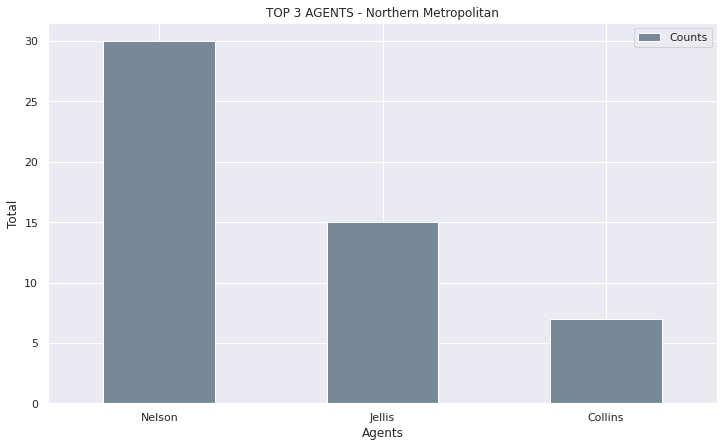

In [ ]:
ax = top3_agent_nm2.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='lightslategray'
)

ax.set_title('TOP 3 AGENTS - Northern Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_sem2 = region_best_agent2[region_best_agent2['Regionname']=='South-Eastern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_sem2

Regionname  Counts
SellerG_2                                    
Buxton     South-Eastern Metropolitan       1
Darras     South-Eastern Metropolitan       1
Hall       South-Eastern Metropolitan       1

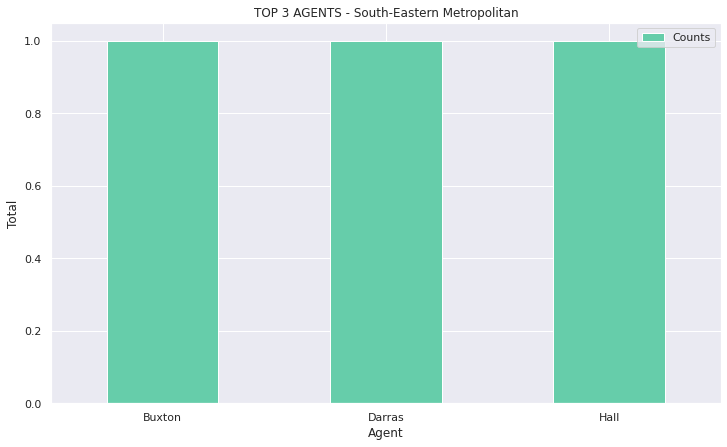

In [ ]:
ax = top3_agent_sem2.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='mediumaquamarine'
)

ax.set_title('TOP 3 AGENTS - South-Eastern Metropolitan')
ax.set_xlabel('Agent')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_sm2 = region_best_agent2[region_best_agent2['Regionname']=='Southern Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_sm2

Regionname  Counts
SellerG_2                               
Marshall   Southern Metropolitan     328
Jellis     Southern Metropolitan     173
Kay        Southern Metropolitan      63

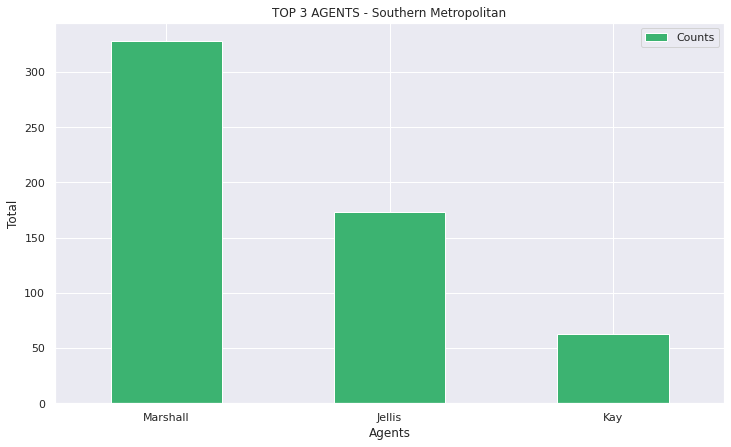

In [ ]:
ax = top3_agent_sm2.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='mediumseagreen'
)

ax.set_title('TOP 3 AGENTS - Southern Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top3_agent_wm2 = region_best_agent2[region_best_agent2['Regionname']=='Western Metropolitan'].sort_values('Counts',ascending=False).head(3)
top3_agent_wm2

Regionname  Counts
SellerG_2                              
Nelson     Western Metropolitan      10
Brad       Western Metropolitan       4
Williams   Western Metropolitan       4

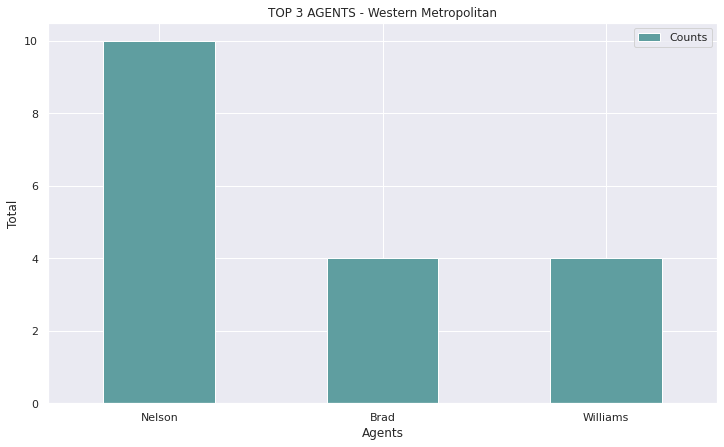

In [ ]:
ax = top3_agent_wm2.plot(
    kind='bar',
    grid=True, 
    figsize=(12,7),
    color='cadetblue'
)

ax.set_title('TOP 3 AGENTS - Western Metropolitan')
ax.set_xlabel('Agents')
ax.set_ylabel('Total')
plt.xticks(rotation=0)
plt.show()

# **CLUSTERING**

# **Import Package yang diperlukan untuk Clustering**

In [ ]:
#Import semua package yang diperlukan untuk clustering
!pip install shap
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score

sns.set(style="ticks", color_codes=True)
random_state = 99

     |████████████████████████████████| 327kB 4.4MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463906 sha256=d74d609e9080f73c75256e74c256a8ecafdff596c745f4233f512688b091fae0
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


# **Melihat Data yang digunakan**



In [ ]:
#melihat data all (include outlier)
print('banyak baris dan kolom adalah: ', Melb_housing_4.shape)
Melb_housing_4.head(10)

banyak baris dan kolom adalah:  (25290, 17)


Suburb  Rooms Type      Price  ... Propertycount Rooms_2 Bathroom_2  Car_2
1   Abbotsford      2    h  1480000.0  ...        4019.0       2          1      1
2   Abbotsford      2    h  1035000.0  ...        4019.0       2          1      0
4   Abbotsford      3    h  1465000.0  ...        4019.0       3          2      0
5   Abbotsford      3    h   850000.0  ...        4019.0       3          2      1
6   Abbotsford      4    h  1600000.0  ...        4019.0       4          1      2
10  Abbotsford      2    h   941000.0  ...        4019.0       2          1      0
11  Abbotsford      3    h  1876000.0  ...        4019.0       3          2      0
14  Abbotsford      2    h  1636000.0  ...        4019.0       2          1      2
15  Abbotsford      3    h  1000000.0  ...        4019.0       3          1      0
16  Abbotsford      2    t   745000.0  ...        4019.0       2          1      0

[10 rows x 17 columns]

In [ ]:
#melihat data tanpa outlier
print('banyak baris dan kolom adalah: ',Melb_housing_4_2.shape)
Melb_housing_4_2.head(10)

banyak baris dan kolom adalah:  (24201, 18)


Suburb  Rooms Type      Price  ... Rooms_2 Bathroom_2 Car_2  SellerG_2
1   Abbotsford      2    h  1480000.0  ...       2          1     1     Biggin
2   Abbotsford      2    h  1035000.0  ...       2          1     0     Biggin
4   Abbotsford      3    h  1465000.0  ...       3          2     0     Biggin
5   Abbotsford      3    h   850000.0  ...       3          2     1     Biggin
6   Abbotsford      4    h  1600000.0  ...       4          1     2     Nelson
10  Abbotsford      2    h   941000.0  ...       2          1     0     Jellis
11  Abbotsford      3    h  1876000.0  ...       3          2     0     Nelson
14  Abbotsford      2    h  1636000.0  ...       2          1     2     Nelson
15  Abbotsford      3    h  1000000.0  ...       3          1     0     Jellis
16  Abbotsford      2    t   745000.0  ...       2          1     0     Jellis

[10 rows x 18 columns]

In [ ]:
#melihat data outlier
print('banyak baris dan kolom adalah: ',Melb_housing_4_3.shape)
Melb_housing_4_3.head(10)

banyak baris dan kolom adalah:  (1089, 18)


Suburb  Rooms Type      Price  ... Rooms_2 Bathroom_2 Car_2  SellerG_2
135  Albert Park      3    h  2850000.0  ...       3          2     0     Buxton
146  Albert Park      3    h  2485000.0  ...       3          1     0     Cayzer
152  Albert Park      3    h  2615000.0  ...       3          2     1     Cayzer
158  Albert Park      3    h  2575000.0  ...       3          2     1       Greg
166  Albert Park      3    h  3010000.0  ...       3          2     0       Greg
168  Albert Park      4    h  2800000.0  ...       4         >2     1     Cayzer
178  Albert Park      4    h  4735000.0  ...       4          2     1   Marshall
182  Albert Park      3    h  3755000.0  ...       3          2     2       Greg
202   Alphington      5    h  2840000.0  ...      >4         >2    >2     Nelson
370     Armadale      3    h  2675000.0  ...       3          1     0   Marshall

[10 rows x 18 columns]

# **Clustering KMeans Variabel Numerik (Kecuali Propertycount)**
Leonardo B.S. Saragih dan Faiz Galih

#K-Means Seluruh Data



In [ ]:
#Data keseluruhan (include Outlier)
Melb_housing_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25290 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         25290 non-null  object        
 1   Rooms          25290 non-null  int64         
 2   Type           25290 non-null  category      
 3   Price          25290 non-null  float64       
 4   Method         25290 non-null  category      
 5   SellerG        25290 non-null  category      
 6   Date           25290 non-null  datetime64[ns]
 7   Distance       25290 non-null  float64       
 8   Bathroom       25290 non-null  float64       
 9   Car            25290 non-null  float64       
 10  Landsize       25290 non-null  float64       
 11  CouncilArea    25290 non-null  object        
 12  Regionname     25290 non-null  object        
 13  Propertycount  25290 non-null  float64       
 14  Rooms_2        25290 non-null  category      
 15  Bathroom_2     2529

In [ ]:
#reset index
Melb_housing_4.reset_index(drop=True, inplace=True)
Melb_housing_4.head(10)

Suburb  Rooms Type      Price  ... Propertycount Rooms_2 Bathroom_2  Car_2
0  Abbotsford      2    h  1480000.0  ...        4019.0       2          1      1
1  Abbotsford      2    h  1035000.0  ...        4019.0       2          1      0
2  Abbotsford      3    h  1465000.0  ...        4019.0       3          2      0
3  Abbotsford      3    h   850000.0  ...        4019.0       3          2      1
4  Abbotsford      4    h  1600000.0  ...        4019.0       4          1      2
5  Abbotsford      2    h   941000.0  ...        4019.0       2          1      0
6  Abbotsford      3    h  1876000.0  ...        4019.0       3          2      0
7  Abbotsford      2    h  1636000.0  ...        4019.0       2          1      2
8  Abbotsford      3    h  1000000.0  ...        4019.0       3          1      0
9  Abbotsford      2    t   745000.0  ...        4019.0       2          1      0

[10 rows x 17 columns]

In [ ]:
#Memilih Variabel Numerik untuk Clustering
num_all = Melb_housing_4[['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize']]
num_all.head()

Rooms      Price  Distance  Bathroom  Car  Landsize
0      2  1480000.0       2.5       1.0  1.0     202.0
1      2  1035000.0       2.5       1.0  0.0     156.0
2      3  1465000.0       2.5       2.0  0.0     134.0
3      3   850000.0       2.5       2.0  1.0      94.0
4      4  1600000.0       2.5       1.0  2.0     120.0

In [ ]:
#Standardisasi 
num_columns = num_all.columns.tolist()
for name in num_columns:
  num_all[[name]] = StandardScaler().fit_transform(num_all[[name]])

num_all.reset_index(drop=True, inplace=True)
X = num_all
X.head(10)

Rooms     Price  Distance  Bathroom       Car  Landsize
0 -1.156975  0.615053 -1.340699 -0.700808 -0.255613 -0.241085
1 -1.156975 -0.071714 -1.340699 -0.700808 -1.111038 -0.269511
2 -0.076756  0.591904 -1.340699  0.793201 -1.111038 -0.283105
3 -0.076756 -0.357223 -1.340699  0.793201 -0.255613 -0.307823
4  1.003463  0.800249 -1.340699 -0.700808  0.599812 -0.291757
5 -1.156975 -0.216783 -1.340699 -0.700808 -1.111038 -0.254062
6 -0.076756  1.226198 -1.340699  0.793201 -1.111038 -0.214513
7 -1.156975  0.855807 -1.340699 -0.700808  0.599812 -0.207716
8 -0.076756 -0.125729 -1.340699 -0.700808 -1.111038 -0.049522
9 -1.156975 -0.519269 -1.340699 -0.700808 -1.111038 -0.049522

In [ ]:
# Implementasi UMAP 2D
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

<Figure size 432x288 with 0 Axes>

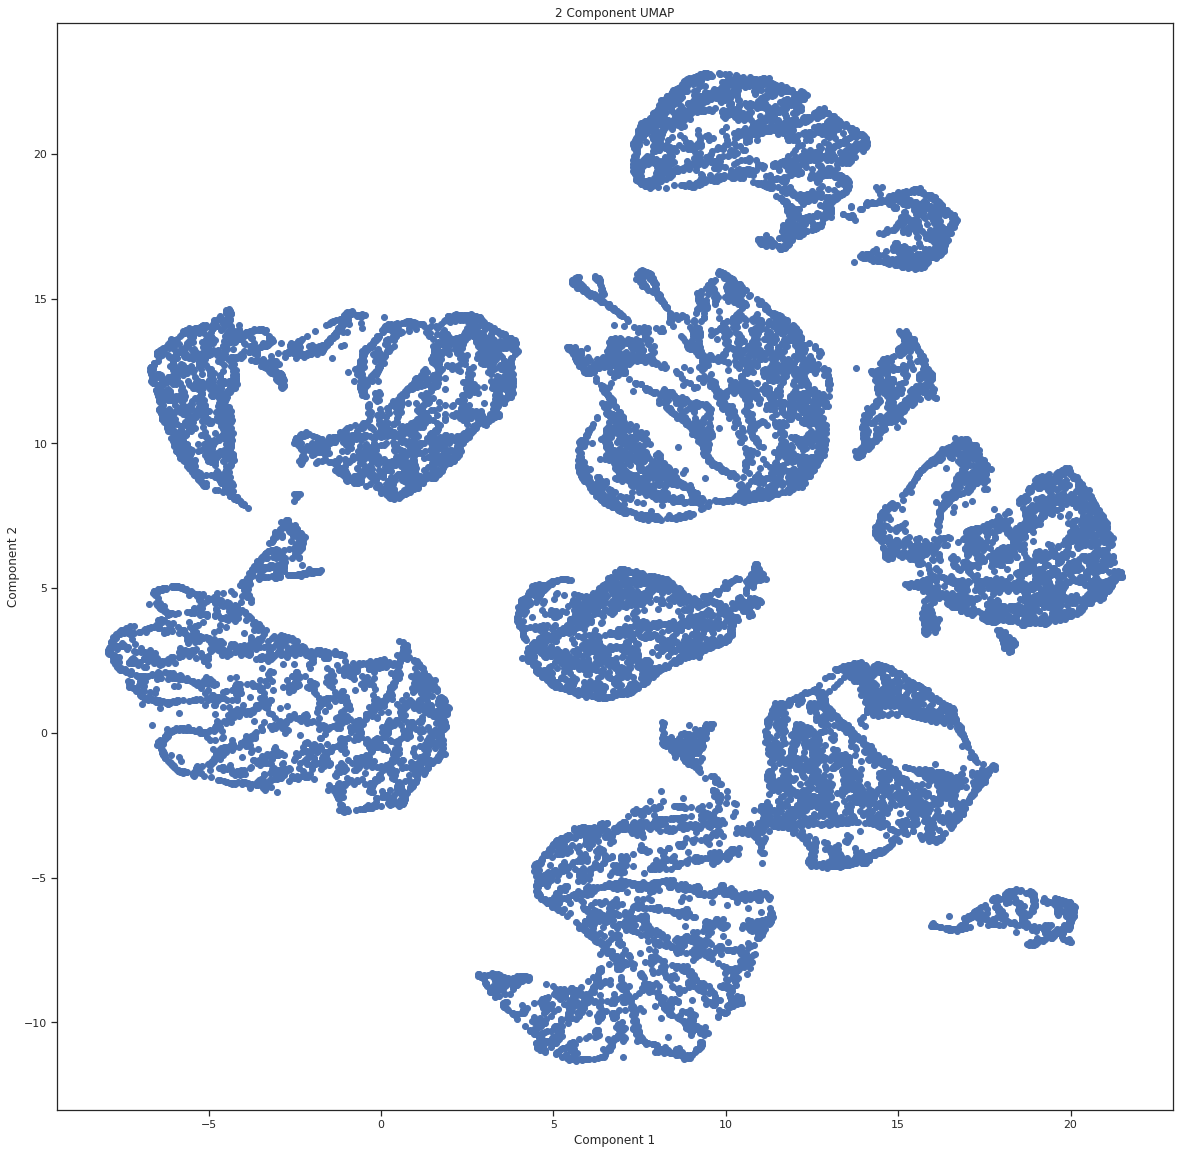

In [ ]:
#Visualisasi Data dengan menggunakan UMAP 2D
plt.figure()
plt.figure(figsize=(20,20))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(umap_component1, umap_component2)

Text(0.5, 1.0, 'Elbow curve')

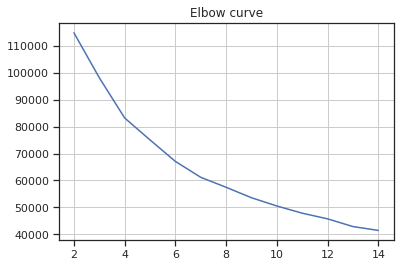

In [ ]:
#Elbow Method untuk Menentukan Jumlah Cluster Optimal
distorsions, k1, kN = [], 2, 15
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(20, 10))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

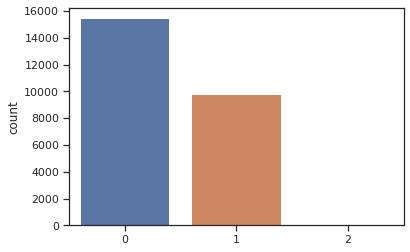

In [ ]:
#Implementasi K-Means dengan Jumlah Cluster k=3
k = 3
km_all = cluster.KMeans(n_clusters=k, init='random', max_iter=1000, tol=0.0001, n_jobs=-1, random_state = random_state)
km_all.fit(X)
# Hasil clusteringnya
C_km_all = km_all.predict(X)
p= sns.countplot(C_km_all)

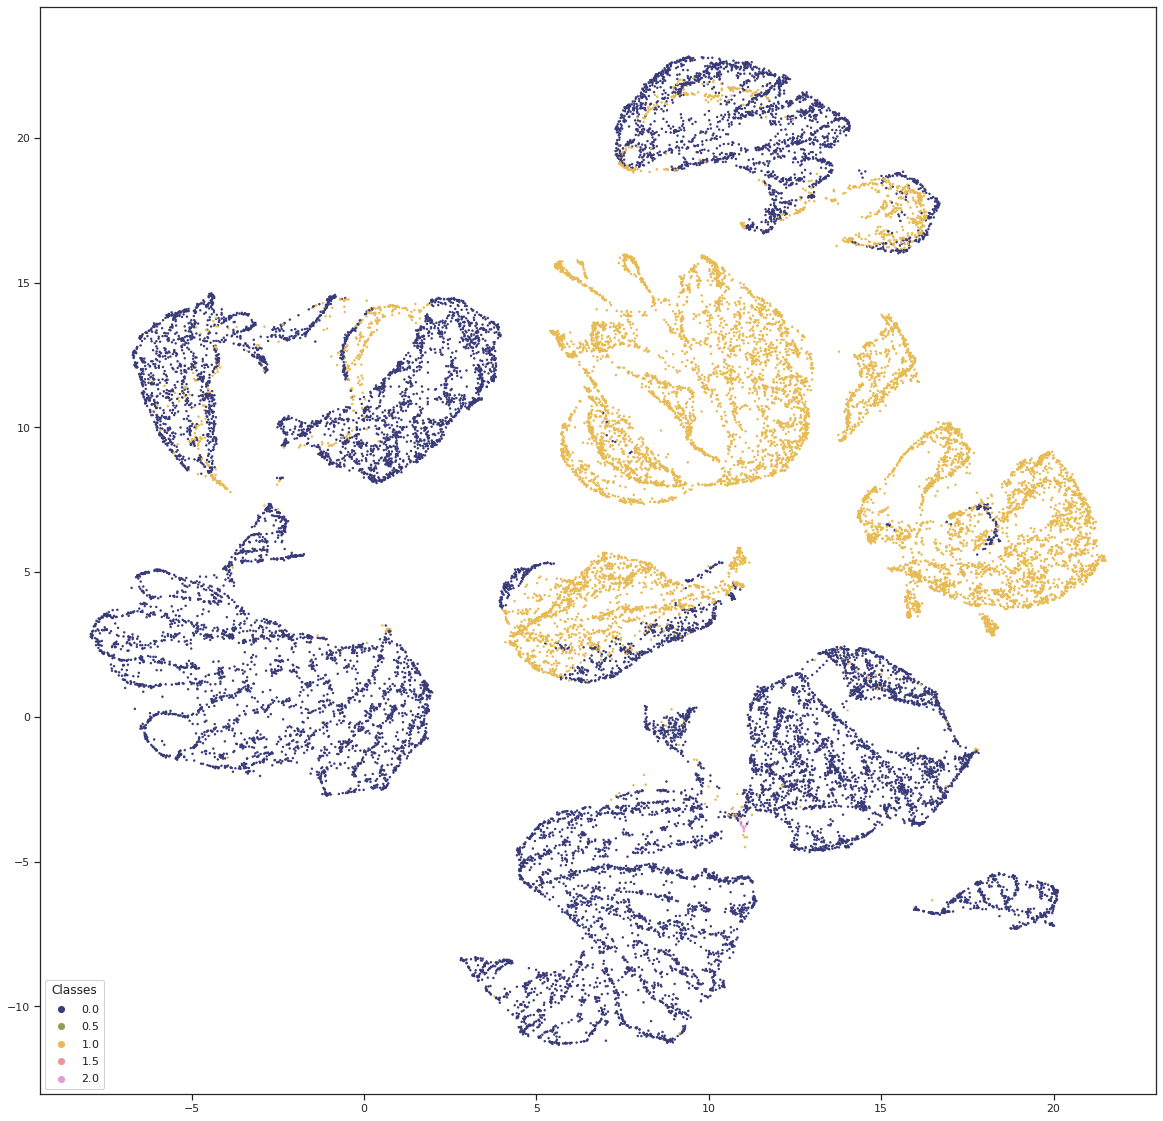

In [ ]:
#Visualisasi Hasil K-Means

fig, ax = plt.subplots()
fig.set_size_inches((20, 20))
scatter = ax.scatter(umap_component1, umap_component2, s=2, c=C_km_all, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(num=5),
                    loc="lower left", title="Classes")
ax.add_artist(legend)

In [ ]:
lgbm_data = num_all.copy()

In [ ]:
#KMeans clusters
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_km, lgbm_data, C_km_all, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_km)}')

CV F1 score for K-Means clusters is 0.9853836401722649


In [ ]:
clf_km.fit(lgbm_data, C_km_all)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(lgbm_data)

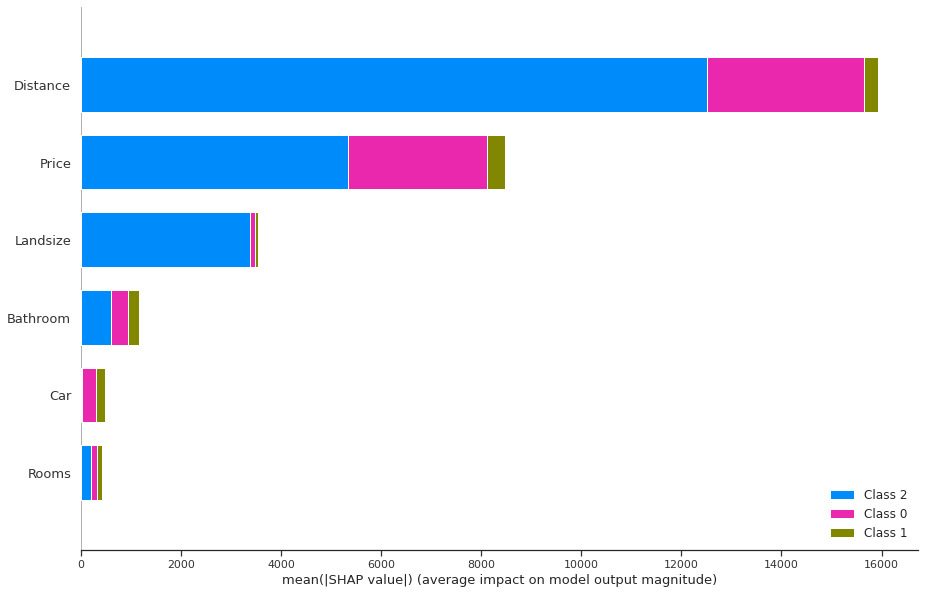

In [ ]:
#Menggunakan SHAP untuk menentukan feature yang berpengaruh dalam hasil clustering
#Variabel Distance, Price, dan Landsize berpengaruh dalam Mengelompokkan Data
shap.summary_plot(shap_values_km, lgbm_data, plot_type="bar", plot_size=(15, 10))

In [ ]:
Melb_housing_4['Cluster_Label'] = km_all.labels_

In [ ]:
#Melihat Centroid dari Masing-Masing Cluster
km_all.cluster_centers_

array([[-4.59339119e-01, -2.88869222e-01, -1.78293871e-01,
        -6.02375250e-01, -4.86981150e-01, -3.63029513e-02],
       [ 7.19795882e-01,  4.53273843e-01,  2.75466004e-01,
         9.43968856e-01,  7.62204208e-01,  7.86221181e-03],
       [ 5.40512167e-01, -8.78078915e-02,  2.96847915e+00,
         6.86486484e-01,  1.21083059e+00,  3.45005851e+01]])

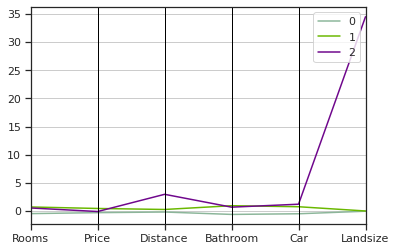

In [ ]:
#Visualisasi Centroid

cols = ['Rooms','Price','Distance','Bathroom', 'Car', 'Landsize']
dfC = pd.DataFrame(km_all.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.show()

In [ ]:
#Menentukan Silhoutte Coefficient
print(siluet(X,C_km_all), end=', ')

0.3020606110063916, 

# K-Means Data Tanpa Outlier

In [ ]:
#Data keseluruhan (non-Outlier)
Melb_housing_4_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24201 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         24201 non-null  object        
 1   Rooms          24201 non-null  int64         
 2   Type           24201 non-null  category      
 3   Price          24201 non-null  float64       
 4   Method         24201 non-null  category      
 5   SellerG        24201 non-null  category      
 6   Date           24201 non-null  datetime64[ns]
 7   Distance       24201 non-null  float64       
 8   Bathroom       24201 non-null  float64       
 9   Car            24201 non-null  float64       
 10  Landsize       24201 non-null  float64       
 11  CouncilArea    24201 non-null  object        
 12  Regionname     24201 non-null  object        
 13  Propertycount  24201 non-null  float64       
 14  Rooms_2        24201 non-null  category      
 15  Bathroom_2     2420

In [ ]:
#reset index
Melb_housing_4_2.reset_index(drop=True, inplace=True)
Melb_housing_4_2.head(10)

Suburb  Rooms Type      Price  ... Rooms_2 Bathroom_2 Car_2  SellerG_2
0  Abbotsford      2    h  1480000.0  ...       2          1     1     Biggin
1  Abbotsford      2    h  1035000.0  ...       2          1     0     Biggin
2  Abbotsford      3    h  1465000.0  ...       3          2     0     Biggin
3  Abbotsford      3    h   850000.0  ...       3          2     1     Biggin
4  Abbotsford      4    h  1600000.0  ...       4          1     2     Nelson
5  Abbotsford      2    h   941000.0  ...       2          1     0     Jellis
6  Abbotsford      3    h  1876000.0  ...       3          2     0     Nelson
7  Abbotsford      2    h  1636000.0  ...       2          1     2     Nelson
8  Abbotsford      3    h  1000000.0  ...       3          1     0     Jellis
9  Abbotsford      2    t   745000.0  ...       2          1     0     Jellis

[10 rows x 18 columns]

In [ ]:
#Memilih Variabel Numerik untuk Clustering
num_non = Melb_housing_4_2[['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize']]
num_non.head()

Rooms      Price  Distance  Bathroom  Car  Landsize
0      2  1480000.0       2.5       1.0  1.0     202.0
1      2  1035000.0       2.5       1.0  0.0     156.0
2      3  1465000.0       2.5       2.0  0.0     134.0
3      3   850000.0       2.5       2.0  1.0      94.0
4      4  1600000.0       2.5       1.0  2.0     120.0

In [ ]:
#Standardisasi
num_columns = num_non.columns.tolist()
for name in num_columns:
  num_non[[name]] = StandardScaler().fit_transform(num_non[[name]])

num_non.reset_index(drop=True, inplace=True)
X = num_non
X.head(10)

Rooms     Price  Distance  Bathroom       Car  Landsize
0 -1.143814  1.106121  -1.35234 -0.693924 -0.235857 -0.233505
1 -1.143814  0.106564  -1.35234 -0.693924 -1.101096 -0.261353
2 -0.026546  1.072428  -1.35234  0.916206 -1.101096 -0.274671
3 -0.026546 -0.308982  -1.35234  0.916206 -0.235857 -0.298887
4  1.090723  1.375664  -1.35234 -0.693924  0.629381 -0.283147
5 -1.143814 -0.104579  -1.35234 -0.693924 -1.101096 -0.246218
6 -0.026546  1.995614  -1.35234  0.916206 -1.101096 -0.207473
7 -1.143814  1.456527  -1.35234 -0.693924  0.629381 -0.200814
8 -0.026546  0.027947  -1.35234 -0.693924 -1.101096 -0.045835
9 -1.143814 -0.544833  -1.35234 -0.693924 -1.101096 -0.045835

In [ ]:
#Implementasi UMAP 2D
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

<Figure size 432x288 with 0 Axes>

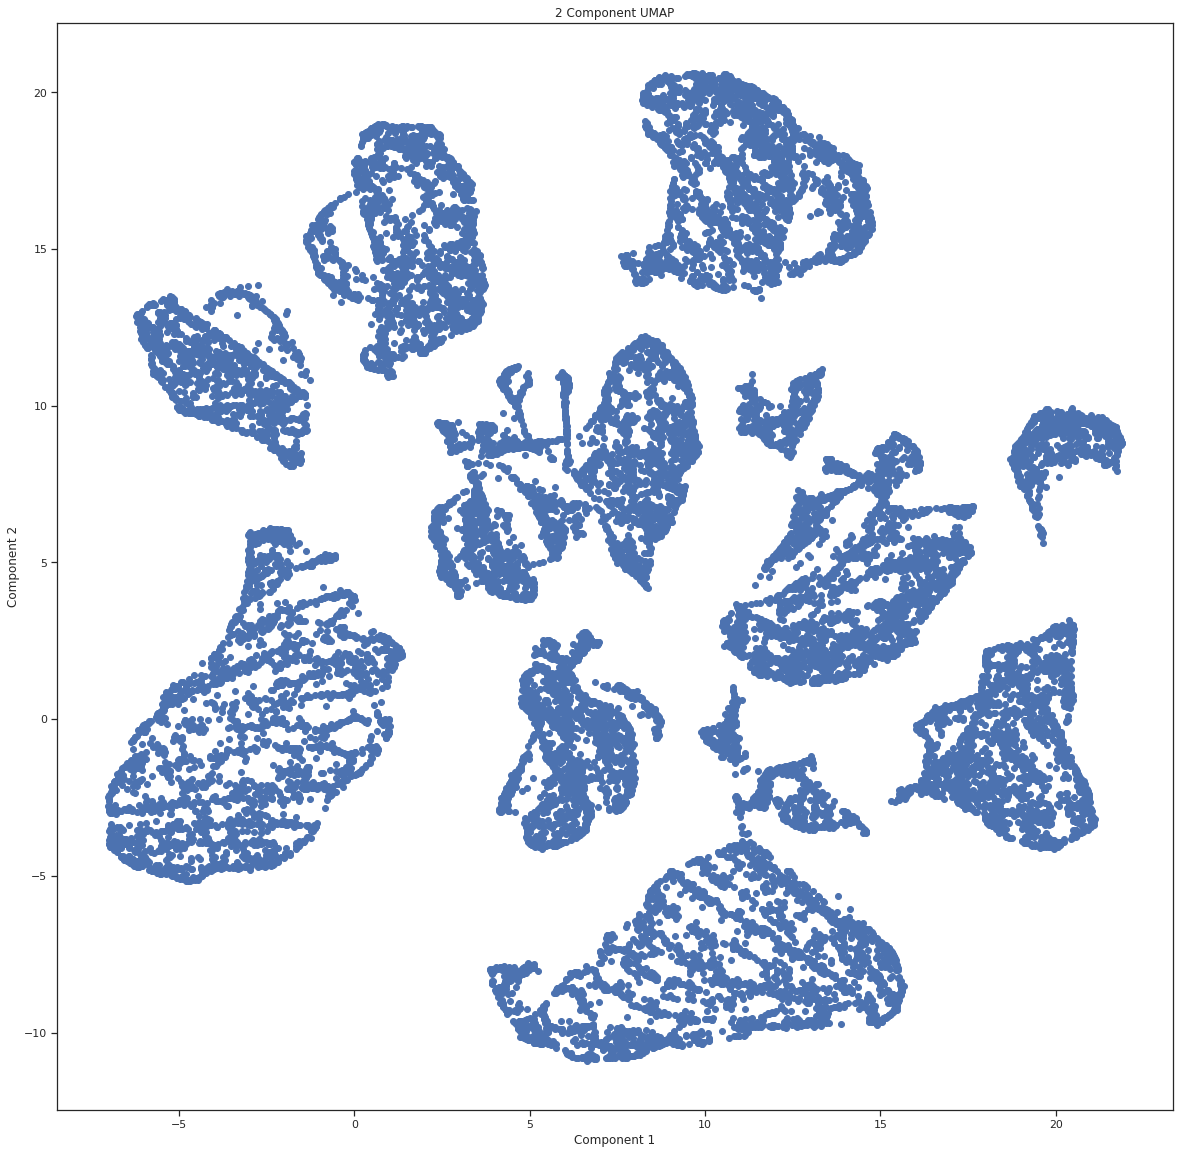

In [ ]:
#Visualisasi Data dengan menggunakan UMAP 2D
plt.figure()
plt.figure(figsize=(20,20))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(umap_component1, umap_component2)

Text(0.5, 1.0, 'Elbow curve')

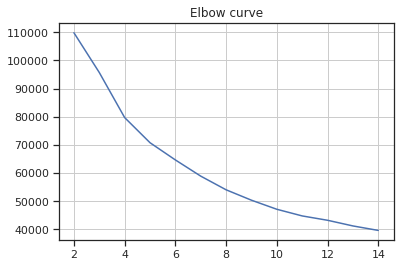

In [ ]:
#Elbow Method untuk Menentukan Jumlah Cluster Optimal
distorsions, k1, kN = [], 2, 15
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(20, 10))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

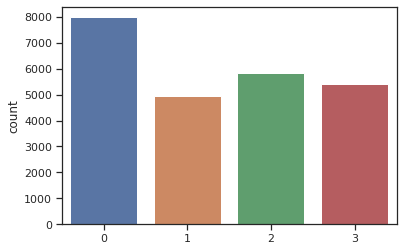

In [ ]:
#Implementasi K-Means dengan Jumlah Cluster k=4
k = 4
km_non = cluster.KMeans(n_clusters=k, init='random', max_iter=1000, tol=0.0001, n_jobs=-1, random_state = random_state)
km_non.fit(X)
# Hasil clusteringnya
C_km_non = km_non.predict(X)
p= sns.countplot(C_km_non)

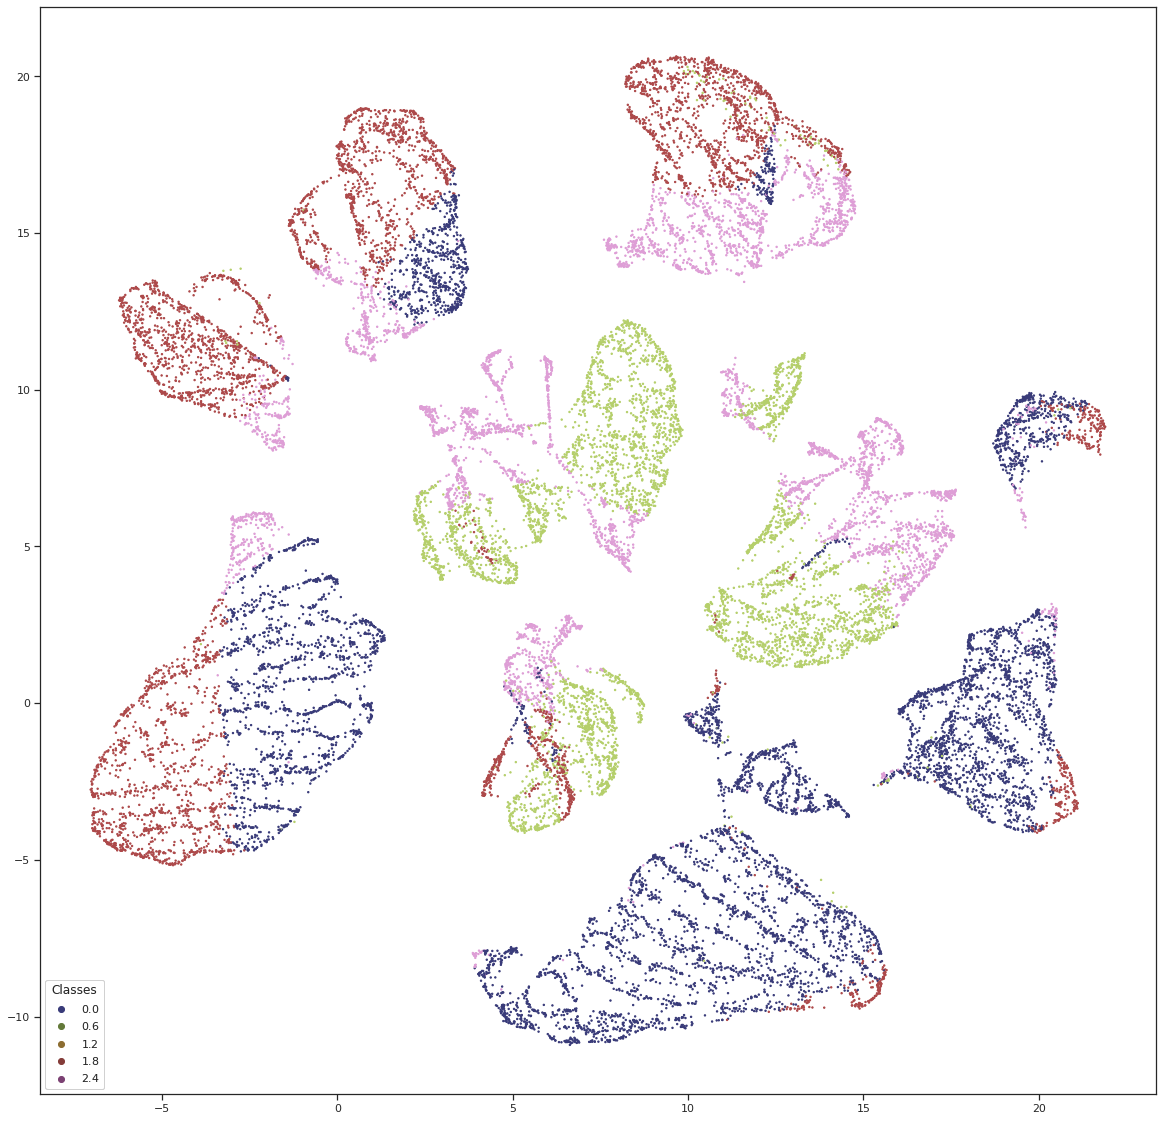

In [ ]:
#Visualisasi Hasil K-Means

fig, ax = plt.subplots()
fig.set_size_inches((20, 20))
scatter = ax.scatter(umap_component1, umap_component2, s=2, c=C_km_non, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(num=5),
                    loc="lower left", title="Classes")
ax.add_artist(legend)

In [ ]:
lgbm_data = num_non.copy()

In [ ]:
#KMeans clusters
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_km, lgbm_data, C_km_non, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_km)}')

CV F1 score for K-Means clusters is 0.9868657854589099


In [ ]:
clf_km.fit(lgbm_data, C_km_non)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(lgbm_data)

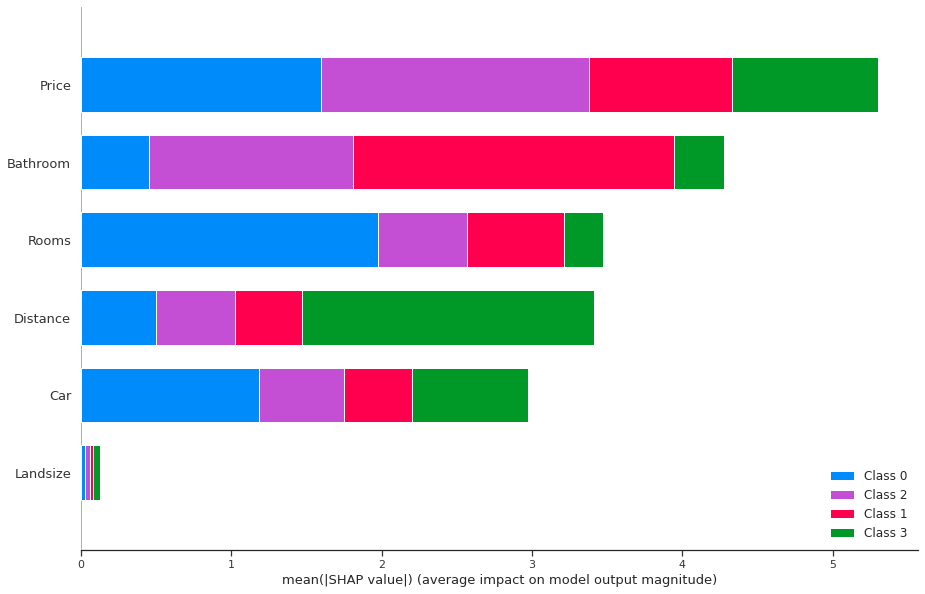

In [ ]:
#Menggunakan SHAP untuk Menentukan feature yang berpengaruh dalam hasil clustering
shap.summary_plot(shap_values_km, lgbm_data, plot_type="bar", plot_size=(15, 10))

In [ ]:
Melb_housing_4_2['Cluster_Label'] = km_non.labels_

In [ ]:
km_non.cluster_centers_

array([[-0.91055364, -0.71016876, -0.36665951, -0.62749974, -0.65345008,
        -0.02486947],
       [ 0.88531292,  1.0121192 , -0.2068974 ,  1.34256911,  0.77974412,
         0.00384821],
       [ 0.16896686,  0.6667537 , -0.42981745, -0.55566097, -0.32051616,
        -0.05160833],
       [ 0.34677152, -0.60222205,  1.1939924 ,  0.29285301,  0.59342308,
         0.08883009]])

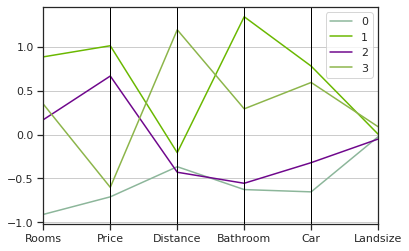

In [ ]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['Rooms','Price','Distance','Bathroom', 'Car', 'Landsize']
dfC = pd.DataFrame(km_non.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.show()

In [ ]:
print(siluet(X,C_km_non), end=', ')

0.21298069448025622, 

# K-Means Data Outlier

In [ ]:
#Data keseluruhan (Outlier)
Melb_housing_4_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 135 to 34719
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         1089 non-null   object        
 1   Rooms          1089 non-null   int64         
 2   Type           1089 non-null   category      
 3   Price          1089 non-null   float64       
 4   Method         1089 non-null   category      
 5   SellerG        1089 non-null   category      
 6   Date           1089 non-null   datetime64[ns]
 7   Distance       1089 non-null   float64       
 8   Bathroom       1089 non-null   float64       
 9   Car            1089 non-null   float64       
 10  Landsize       1089 non-null   float64       
 11  CouncilArea    1089 non-null   object        
 12  Regionname     1089 non-null   object        
 13  Propertycount  1089 non-null   float64       
 14  Rooms_2        1089 non-null   category      
 15  Bathroom_2     108

In [ ]:
#reset index
Melb_housing_4_3.reset_index(drop=True, inplace=True)
Melb_housing_4_3.head(10)

Suburb  Rooms Type      Price  ... Rooms_2 Bathroom_2 Car_2  SellerG_2
0  Albert Park      3    h  2850000.0  ...       3          2     0     Buxton
1  Albert Park      3    h  2485000.0  ...       3          1     0     Cayzer
2  Albert Park      3    h  2615000.0  ...       3          2     1     Cayzer
3  Albert Park      3    h  2575000.0  ...       3          2     1       Greg
4  Albert Park      3    h  3010000.0  ...       3          2     0       Greg
5  Albert Park      4    h  2800000.0  ...       4         >2     1     Cayzer
6  Albert Park      4    h  4735000.0  ...       4          2     1   Marshall
7  Albert Park      3    h  3755000.0  ...       3          2     2       Greg
8   Alphington      5    h  2840000.0  ...      >4         >2    >2     Nelson
9     Armadale      3    h  2675000.0  ...       3          1     0   Marshall

[10 rows x 18 columns]

In [ ]:
#Variabel Numerik
num = Melb_housing_4_3[['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize']]
num.head()

Rooms      Price  Distance  Bathroom  Car  Landsize
0      3  2850000.0       3.3       2.0  0.0     211.0
1      3  2485000.0       3.3       1.0  0.0     512.0
2      3  2615000.0       3.3       2.0  1.0     177.0
3      3  2575000.0       3.3       2.0  1.0     228.0
4      3  3010000.0       3.3       2.0  0.0     147.0

In [ ]:
#Standardisasi
num_columns = num.columns.tolist()
for name in num_columns:
  num[[name]] = StandardScaler().fit_transform(num[[name]])

num.reset_index(drop=True, inplace=True)
X = num
X.head(10)

Rooms     Price  Distance  Bathroom       Car  Landsize
0 -1.154519 -0.357287 -1.348805 -0.303547 -1.444475 -1.166648
1 -1.154519 -0.766821 -1.348805 -1.264485 -1.444475 -0.434345
2 -1.154519 -0.620959 -1.348805 -0.303547 -0.676767 -1.249367
3 -1.154519 -0.665840 -1.348805 -0.303547 -0.676767 -1.125289
4 -1.154519 -0.177766 -1.348805 -0.303547 -1.444475 -1.322354
5 -0.125655 -0.413388 -1.348805  0.657391 -0.676767 -0.884432
6 -0.125655  1.757698 -1.348805 -0.303547 -0.676767 -0.877133
7 -1.154519  0.658130 -1.348805 -0.303547  0.090941 -0.889298
8  0.903208 -0.368508 -0.438938  1.618329  1.626356  0.288226
9 -1.154519 -0.553639 -0.468288 -1.264485 -1.444475 -0.434345

In [ ]:
# Implementing UMAP.
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

<Figure size 432x288 with 0 Axes>

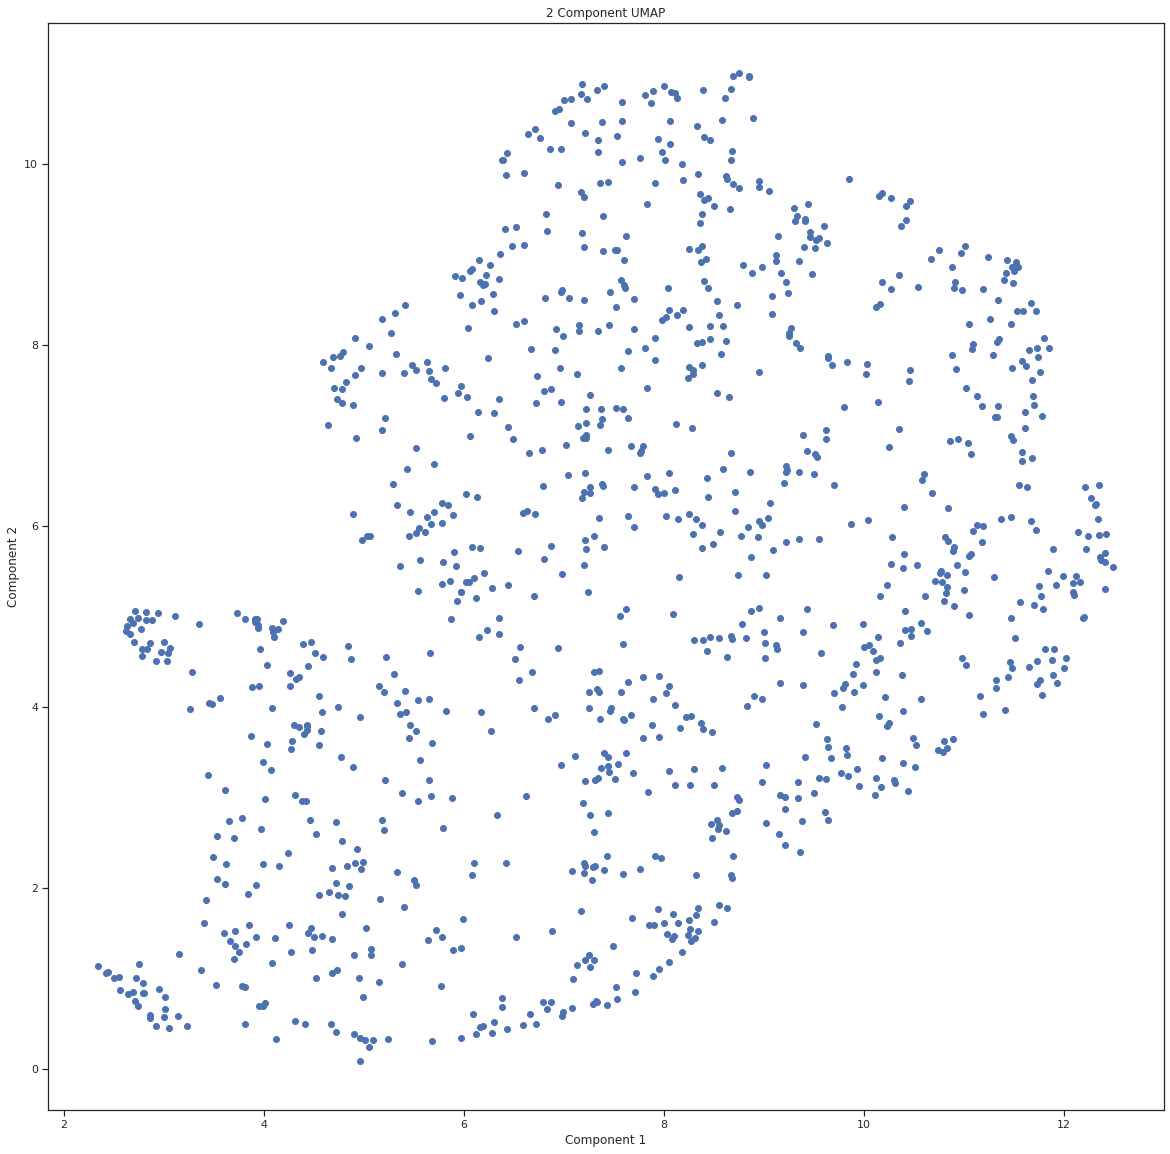

In [ ]:
# Visualizing the effects of the Uniform Manifold Approximation and Projection.
plt.figure()
plt.figure(figsize=(20,20))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(umap_component1, umap_component2)

Text(0.5, 1.0, 'Elbow curve')

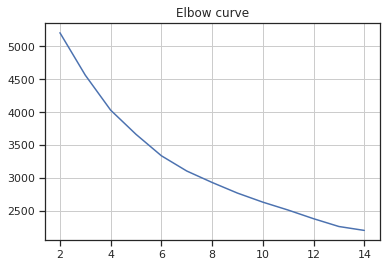

In [ ]:
distorsions, k1, kN = [], 2, 15
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(20, 10))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

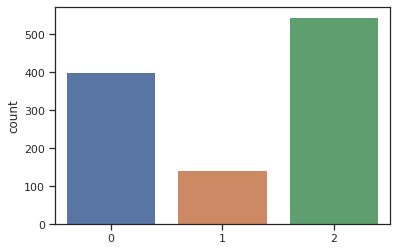

In [ ]:
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=1000, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

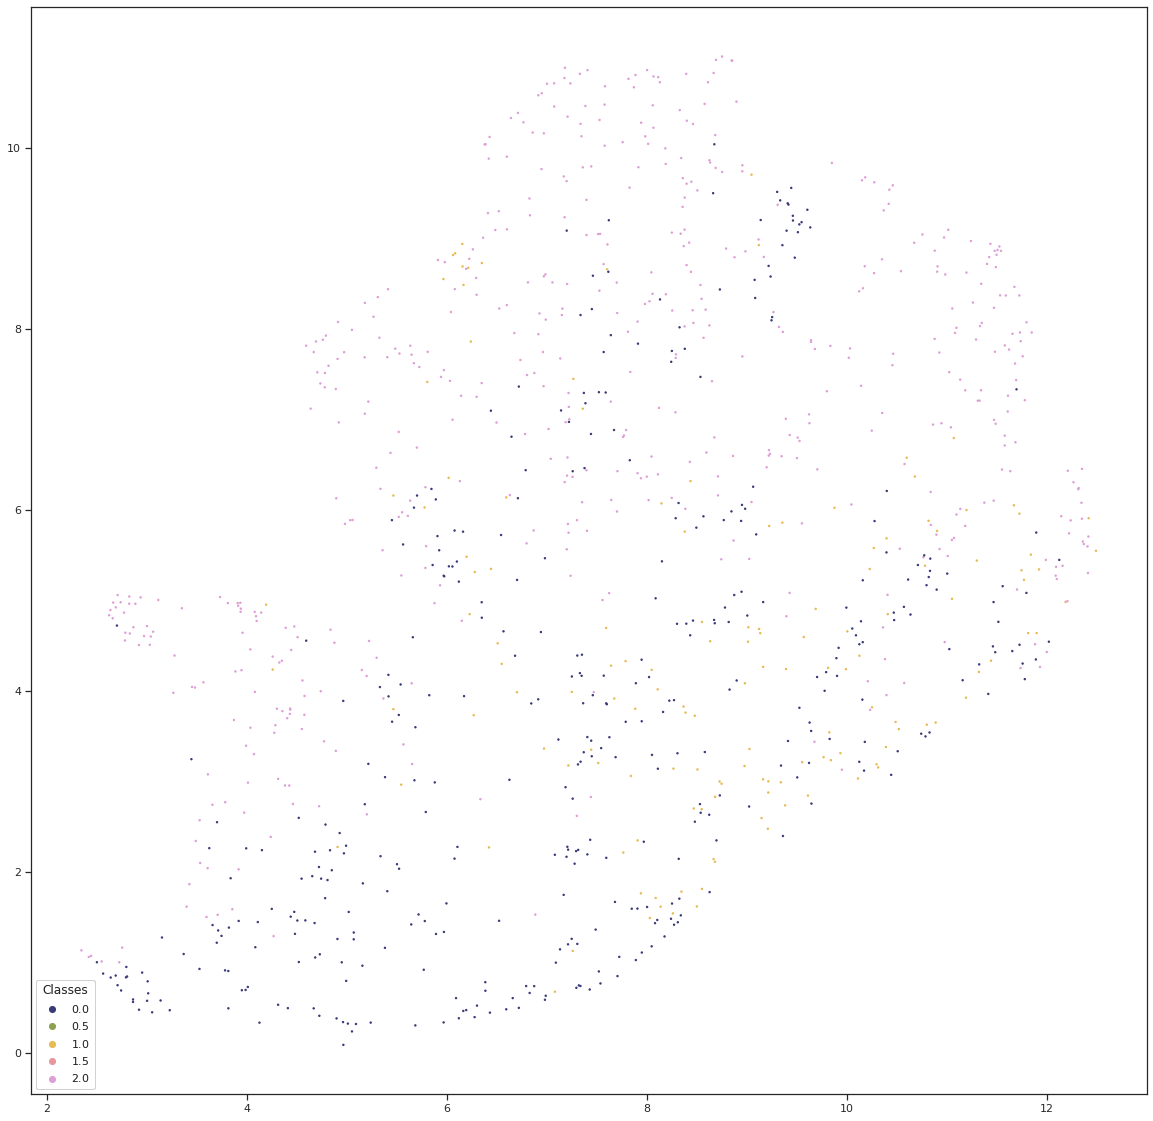

In [ ]:
#k-means visualize

fig, ax = plt.subplots()
fig.set_size_inches((20, 20))
scatter = ax.scatter(umap_component1, umap_component2, s=2, c=C_km, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(num=5),
                    loc="lower left", title="Classes")
ax.add_artist(legend)

In [ ]:
lgbm_data = num.copy()

In [ ]:
#KMeans clusters
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_km, lgbm_data, C_km, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_km)}')

CV F1 score for K-Means clusters is 0.9426818510783941


In [ ]:
clf_km.fit(lgbm_data, C_km)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(lgbm_data)

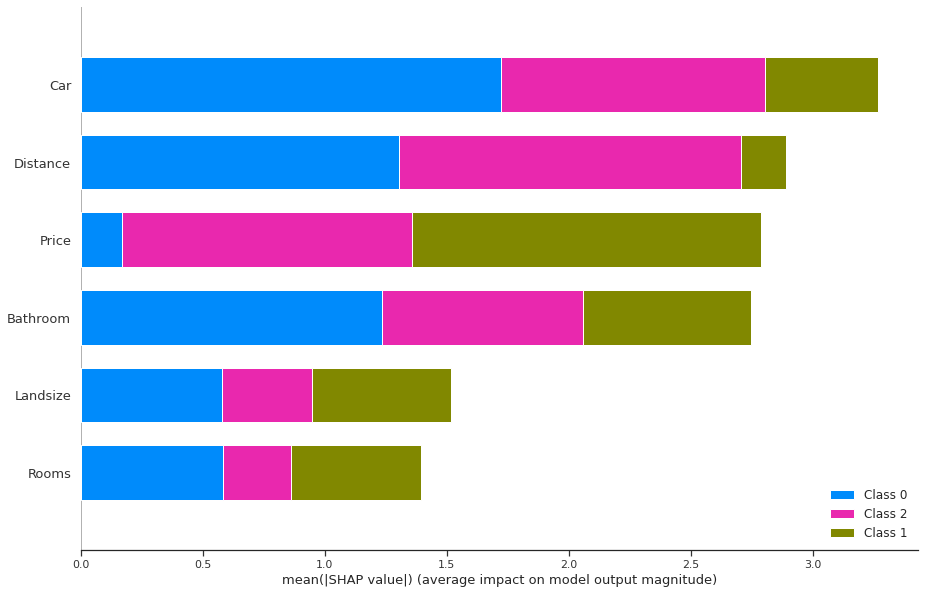

In [ ]:
shap.summary_plot(shap_values_km, lgbm_data, plot_type="bar", plot_size=(15, 10))

In [ ]:
Melb_housing_4_3['Cluster_Label'] = km.labels_

In [ ]:
km.cluster_centers_

array([[-0.40718518, -0.03277721, -0.64395335, -0.73381765, -0.80471855,
        -0.48184128],
       [ 0.80177047,  1.49907154,  0.0232302 ,  1.15139421,  0.9667763 ,
         0.98300746],
       [ 0.0914441 , -0.36640683,  0.4689368 ,  0.24127838,  0.34167821,
         0.09929015]])

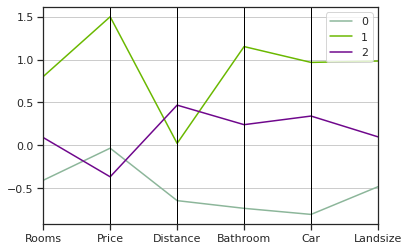

In [ ]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['Rooms','Price','Distance','Bathroom', 'Car', 'Landsize']
dfC = pd.DataFrame(km.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.show()

In [ ]:
print(siluet(X,C_km), end=', ')

0.20401711216984902, 

# **Clustering KMeans++ Variabel Numerik (Kecuali Propertycount)**
Gema Fitri dan Nyimas Sharima

# KMeans++ Seluruh Data

In [ ]:
#Cluster dari seluruh data
x7 = Melb_housing_4[['Rooms','Price','Distance','Bathroom','Car','Landsize']]

In [ ]:
#standarisasi terlebih dahulu variabel-variabel yang digunakan
x7_columns = x7.columns.tolist()
for name in x7_columns:
  x7[[name]] = StandardScaler().fit_transform(x7[[name]])

x7.reset_index(drop=True)
x7_scaled = x7
x7_scaled

Rooms     Price  Distance  Bathroom       Car  Landsize
0     -1.156975  0.615053 -1.340699 -0.700808 -0.255613 -0.241085
1     -1.156975 -0.071714 -1.340699 -0.700808 -1.111038 -0.269511
2     -0.076756  0.591904 -1.340699  0.793201 -1.111038 -0.283105
3     -0.076756 -0.357223 -1.340699  0.793201 -0.255613 -0.307823
4      1.003463  0.800249 -1.340699 -0.700808  0.599812 -0.291757
...         ...       ...       ...       ...       ...       ...
25285  1.003463  0.615053 -0.784406 -0.700808  1.455238  0.000532
25286 -1.156975 -0.298578 -0.784406  0.793201 -0.255613 -0.305351
25287 -1.156975 -0.581001 -0.784406 -0.700808  0.599812 -0.229962
25288 -0.076756  0.090333 -0.784406 -0.700808 -1.111038 -0.049522
25289 -1.156975 -0.094863 -0.784406 -0.700808 -1.111038 -0.211424

[25290 rows x 6 columns]

Text(0.5, 1.0, 'Elbow curve')

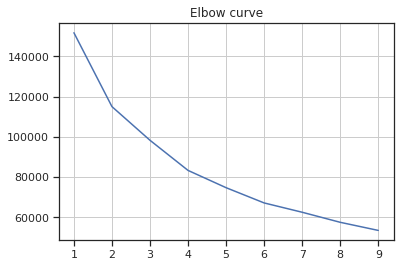

In [ ]:
#rekomendasi jumlah cluster menggunakan elbow method
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(x7_scaled)
    distorsions.append(kmeans.inertia_) 
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

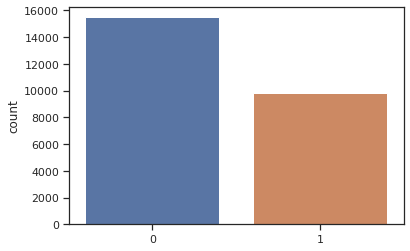

In [ ]:
#melakukan cluster kmeans++ dengan k=2 (ketika pilih 4, ada cluster yang jumlahnya nol)
k=2
kmpp7 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmpp7.fit(x7_scaled)
C_kmpp7 = kmpp7.predict(x7_scaled)
p7= sns.countplot(C_kmpp7)
p7

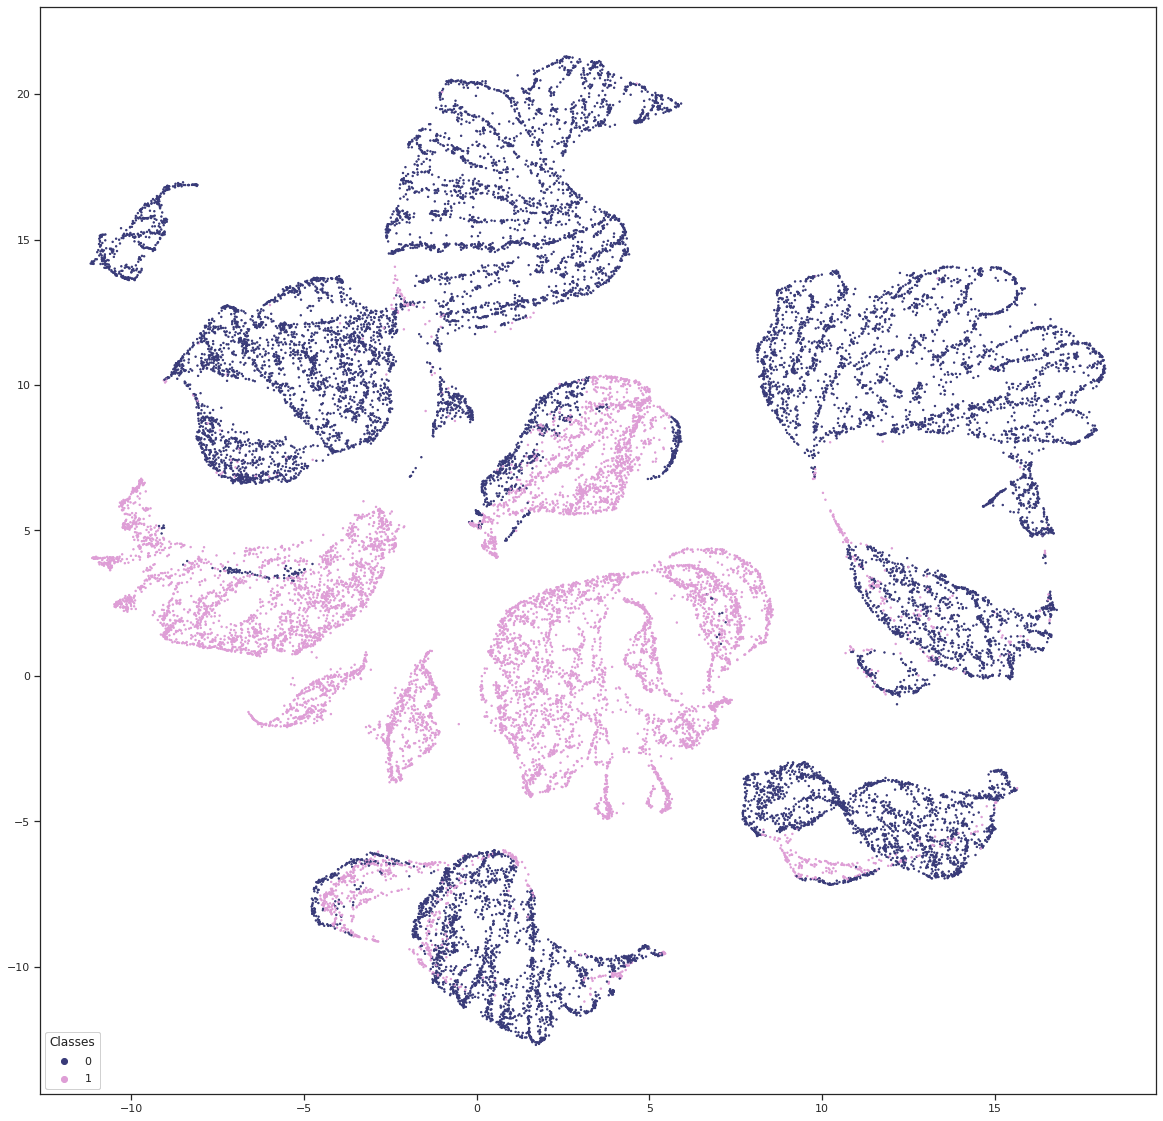

In [ ]:
#melihat sebaran cluster (visualisasi cluster)
# Implementing UMAP.
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(x7_scaled)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

fig, ax = plt.subplots()
fig.set_size_inches((20, 20))
scatter = ax.scatter(umap_component1, umap_component2, s=2, c=C_kmpp7, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(num=1),
                    loc="lower left", title="Classes")
ax.add_artist(legend)

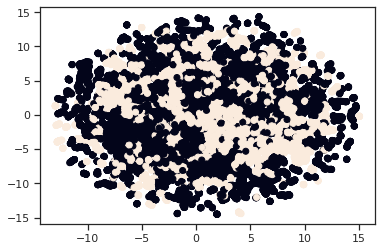

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(x7_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0],X2D[:,1],c=C_kmpp7)
plt.show()

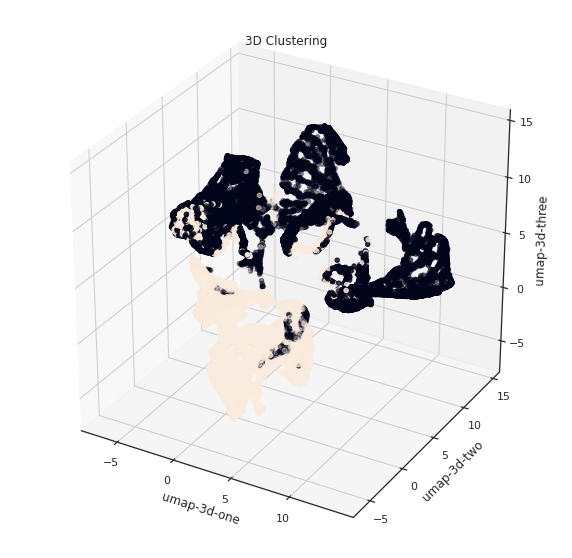

In [ ]:
X3D = umap.UMAP(n_components=3,
                n_neighbors=50,
                min_dist=0.3,
                metric='correlation').fit_transform(x7_scaled)

umap_component3 = X3D[:,0]
umap_component4 = X3D[:,1]
umap_component5 = X3D[:,2]

ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Clustering')
ax.scatter(
    xs=umap_component3,
    ys=umap_component4,
    zs=umap_component5,
    c=C_kmpp7)

ax.set_xlabel('umap-3d-one')
ax.set_ylabel('umap-3d-two')
ax.set_zlabel('umap-3d-three')
plt.show()

In [ ]:
#CV FI Score untuk KMeans++ clusters
lgbm_data = x7_scaled.copy()
clf_kmpp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kmpp = cross_val_score(clf_kmpp, lgbm_data, C_kmpp7, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_kmpp)}')

CV F1 score for K-Means clusters is 0.994342567667713


In [ ]:
clf_kmpp.fit(lgbm_data, C_kmpp7)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
#melihat nilai SHAP dan membuat plotnya
explainer_kmpp = shap.TreeExplainer(clf_kmpp)
shap_values_kmpp = explainer_kmpp.shap_values(lgbm_data)

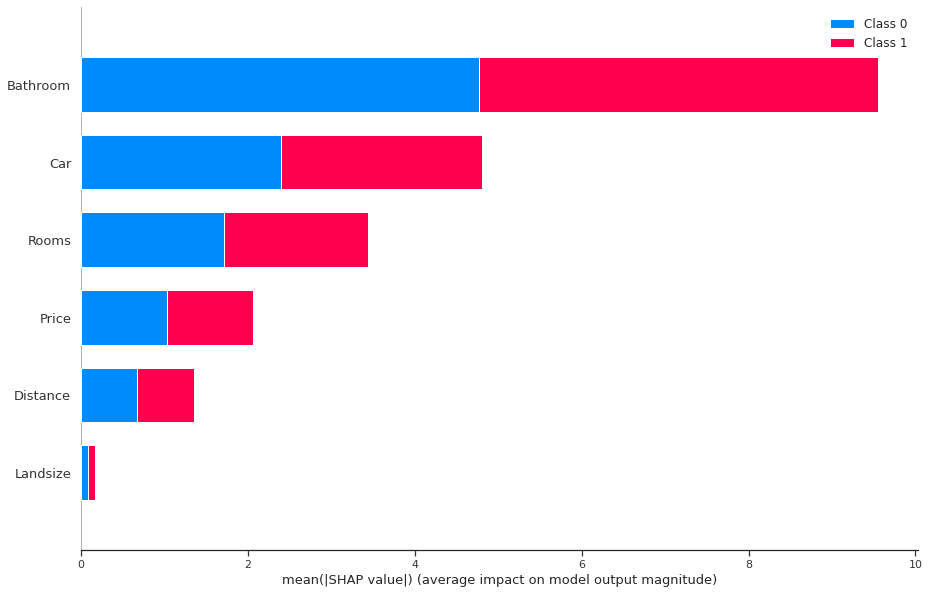

In [ ]:
shap.summary_plot(shap_values_kmpp, lgbm_data, plot_type="bar", plot_size=(15, 10))

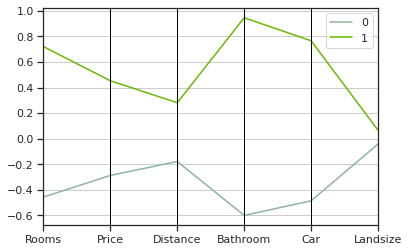

In [ ]:
# membuat parallel plot
kmpp7.cluster_centers_
cols = ['Rooms','Price','Distance','Bathroom', 'Car', 'Landsize']
dfC = pd.DataFrame(kmpp7.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.show()

In [ ]:
#melihat besar silhoutte coefficient
print(siluet(x7_scaled,C_kmpp7), end=', ')

0.30177238887877506, 

# KMeans++ Data Tanpa Outlier

In [ ]:
#Cluster dari data tanpa outlier
x8 = Melb_housing_4_2[['Rooms','Price','Distance','Bathroom','Car','Landsize']]

In [ ]:
#standarisasi terlebih dahulu variabel-variabel yang digunakan
x8_columns = x8.columns.tolist()
for name in x8_columns:
  x8[[name]] = StandardScaler().fit_transform(x8[[name]])

x8.reset_index(drop=True)
x8_scaled = x8
x8_scaled

Rooms     Price  Distance  Bathroom       Car  Landsize
0     -1.143814  1.106121 -1.352340 -0.693924 -0.235857 -0.233505
1     -1.143814  0.106564 -1.352340 -0.693924 -1.101096 -0.261353
2     -0.026546  1.072428 -1.352340  0.916206 -1.101096 -0.274671
3     -0.026546 -0.308982 -1.352340  0.916206 -0.235857 -0.298887
4      1.090723  1.375664 -1.352340 -0.693924  0.629381 -0.283147
...         ...       ...       ...       ...       ...       ...
24196  1.090723  1.106121 -0.801403 -0.693924  1.494620  0.003202
24197 -1.143814 -0.223627 -0.801403  0.916206 -0.235857 -0.296465
24198 -1.143814 -0.634681 -0.801403 -0.693924  0.629381 -0.222608
24199 -0.026546  0.342414 -0.801403 -0.693924 -1.101096 -0.045835
24200 -1.143814  0.072871 -0.801403 -0.693924 -1.101096 -0.204446

[24201 rows x 6 columns]

Text(0.5, 1.0, 'Elbow curve')

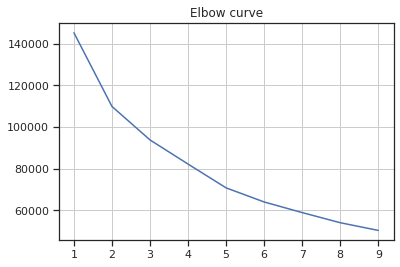

In [ ]:
#rekomendasi jumlah cluster menggunakan elbow method
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(x8_scaled)
    distorsions.append(kmeans.inertia_) 
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

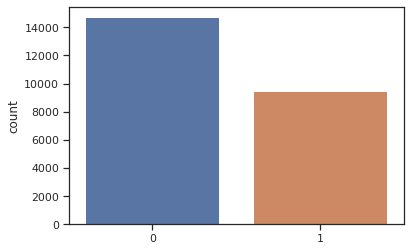

In [ ]:
#melakukan cluster kmeans++ dengan k=2(ketika memilih k=3,4,5 ada yang clusternya berjumlah nol)
k=2
kmpp8 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmpp8.fit(x8_scaled)
C_kmpp8 = kmpp8.predict(x8_scaled)
p8= sns.countplot(C_kmpp8)
p8

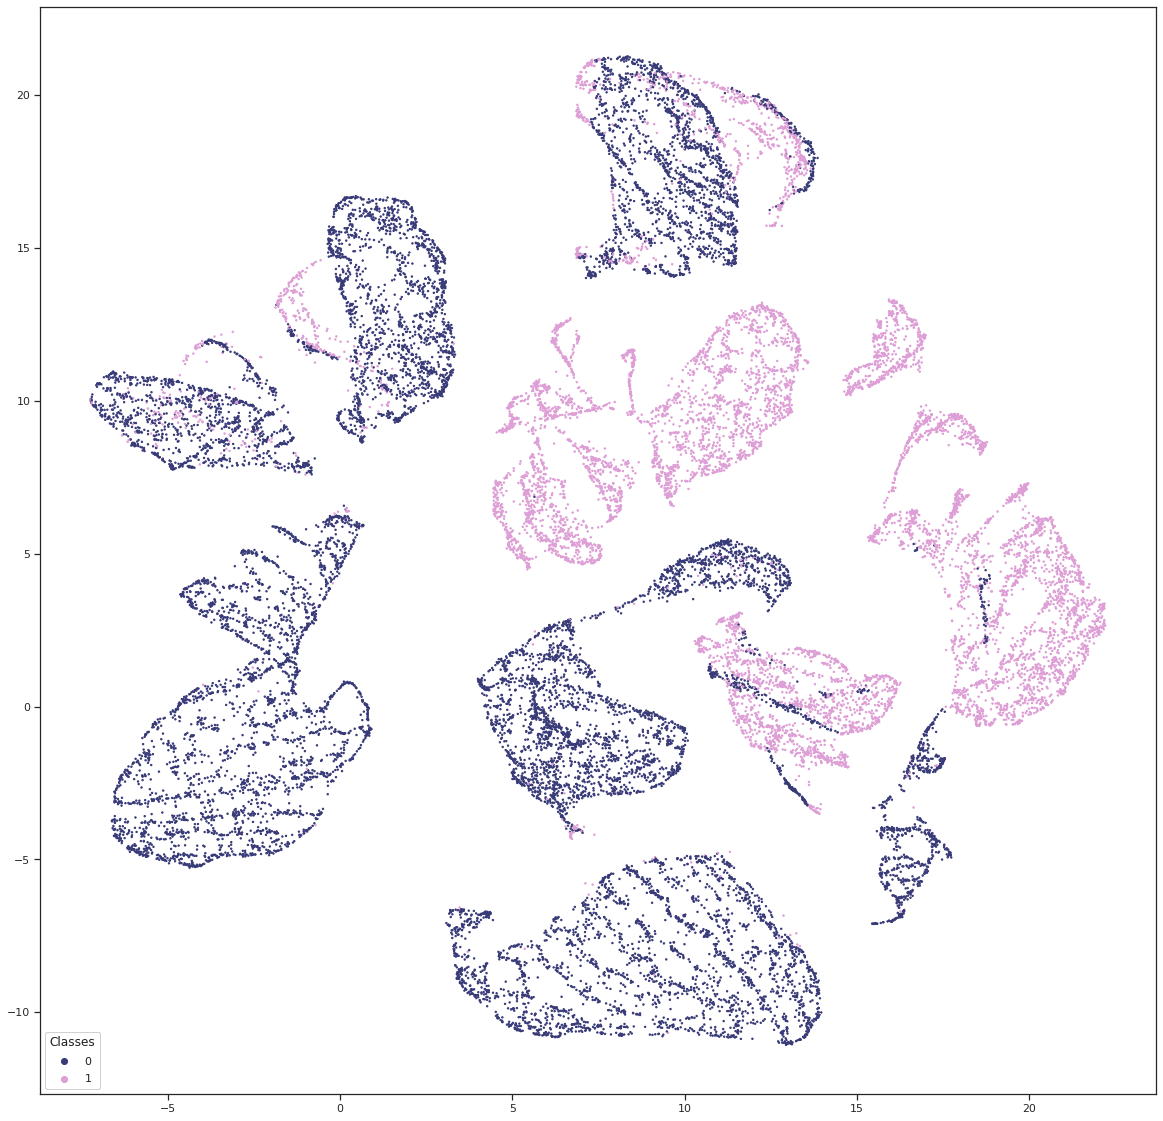

In [ ]:
#melihat sebaran cluster
# Implementing UMAP.
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(x8_scaled)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

fig, ax = plt.subplots()
fig.set_size_inches((20, 20))
scatter = ax.scatter(umap_component1, umap_component2, s=2, c=C_kmpp8, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(num=1),
                    loc="lower left", title="Classes")
ax.add_artist(legend)

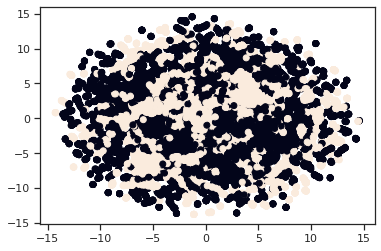

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(x8_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0],X2D[:,1],c=C_kmpp8)
plt.show()

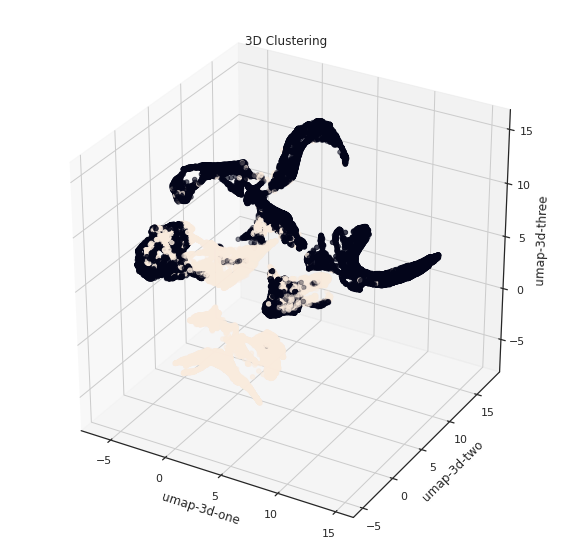

In [ ]:
X3D = umap.UMAP(n_components=3,
                n_neighbors=50,
                min_dist=0.3, 
                metric='correlation').fit_transform(x8_scaled)

umap_component3 = X3D[:,0]
umap_component4 = X3D[:,1]
umap_component5 = X3D[:,2]

ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Clustering')
ax.scatter(
    xs=umap_component3,
    ys=umap_component4,
    zs=umap_component5,
    c=C_kmpp8)

ax.set_xlabel('umap-3d-one')
ax.set_ylabel('umap-3d-two')
ax.set_zlabel('umap-3d-three')
plt.show()

In [ ]:
#CV FI Score untuk KMeans++ clusters
lgbm_data = x8_scaled.copy()
clf_kmpp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kmpp = cross_val_score(clf_kmpp, lgbm_data, C_kmpp8, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_kmpp)}')

CV F1 score for K-Means clusters is 0.9945438281685192


In [ ]:
clf_kmpp.fit(lgbm_data, C_kmpp8)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
#melihat nilai SHAP dan membuat plotnya
explainer_kmpp = shap.TreeExplainer(clf_kmpp)
shap_values_kmpp = explainer_kmpp.shap_values(lgbm_data)

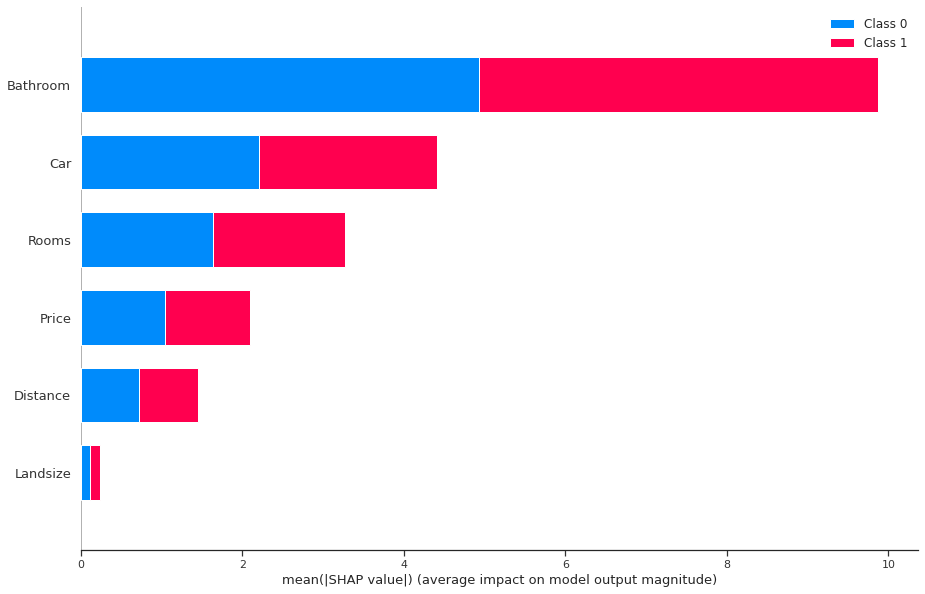

In [ ]:
shap.summary_plot(shap_values_kmpp, lgbm_data, plot_type="bar", plot_size=(15, 10))

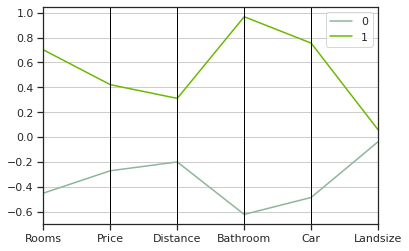

In [ ]:
# membuat parallel plot
kmpp8.cluster_centers_
cols = ['Rooms','Price','Distance','Bathroom', 'Car', 'Landsize']
dfC = pd.DataFrame(kmpp8.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.show()

In [ ]:
#melihat besar silhoutte coefficient
print(siluet(x8_scaled,C_kmpp8), end=', ')

0.2946641367723891, 

# KMeans++  Data Outlier

In [ ]:
#Cluster dari data outlier
x9 = Melb_housing_4_3[['Rooms','Price','Distance','Bathroom','Car','Landsize']]

In [ ]:
#standarisasi terlebih dahulu variabel-variabel yang akan digunakan
x9_columns = x9.columns.tolist()
for name in x9_columns:
  x9[[name]] = StandardScaler().fit_transform(x9[[name]])

x9.reset_index(drop=True)
x9_scaled = x9
x9_scaled

Rooms     Price  Distance  Bathroom       Car  Landsize
0    -1.154519 -0.357287 -1.348805 -0.303547 -1.444475 -1.166648
1    -1.154519 -0.766821 -1.348805 -1.264485 -1.444475 -0.434345
2    -1.154519 -0.620959 -1.348805 -0.303547 -0.676767 -1.249367
3    -1.154519 -0.665840 -1.348805 -0.303547 -0.676767 -1.125289
4    -1.154519 -0.177766 -1.348805 -0.303547 -1.444475 -1.322354
...        ...       ...       ...       ...       ...       ...
1084  0.903208 -0.458268 -0.497639  0.657391  0.858648  0.066832
1085 -1.154519 -0.626569 -1.290103 -1.264485 -1.444475 -0.434345
1086 -1.154519 -0.749990 -0.967247 -0.303547  0.090941 -0.877133
1087 -1.154519 -0.351677 -1.524908 -0.303547 -0.676767 -0.954986
1088 -1.154519 -0.542419 -2.111919 -1.264485 -1.444475 -0.434345

[1089 rows x 6 columns]

Text(0.5, 1.0, 'Elbow curve')

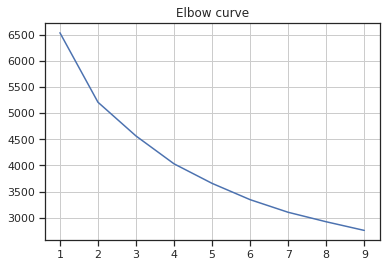

In [ ]:
#rekomendasi jumlah cluster menggunakan elbow method
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(x9_scaled)
    distorsions.append(kmeans.inertia_) 
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

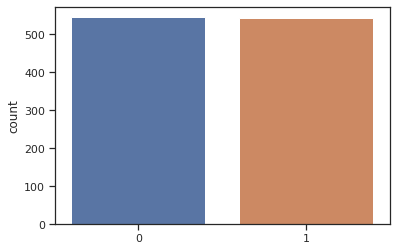

In [ ]:
#melakukan cluster kmeans++ dengan k=2
k=2
kmpp9 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmpp9.fit(x9_scaled)
C_kmpp9 = kmpp9.predict(x9_scaled)
p9= sns.countplot(C_kmpp9)

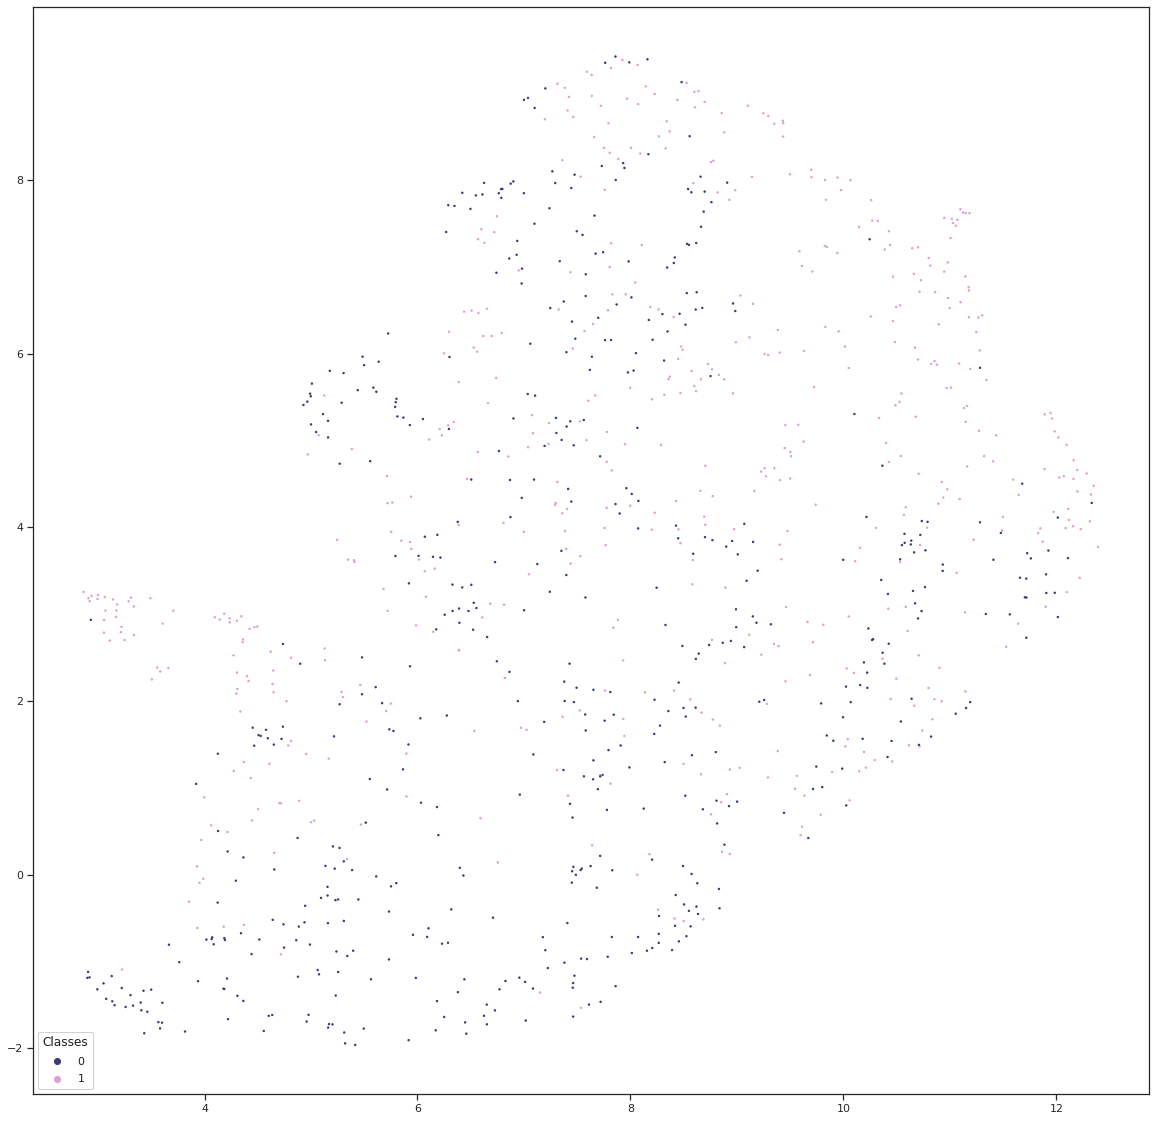

In [ ]:
#melihat sebaran cluster
# Implementing UMAP.
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(x9_scaled)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

fig, ax = plt.subplots()
fig.set_size_inches((20, 20))
scatter = ax.scatter(umap_component1, umap_component2, s=2, c=C_kmpp9, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(num=1),
                    loc="lower left", title="Classes")
ax.add_artist(legend)

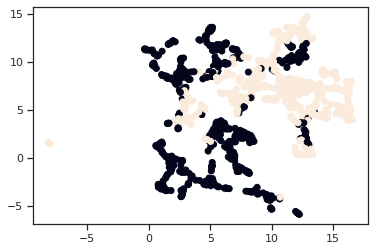

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(x9_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0],X2D[:,1],c=C_kmpp9)
plt.show()

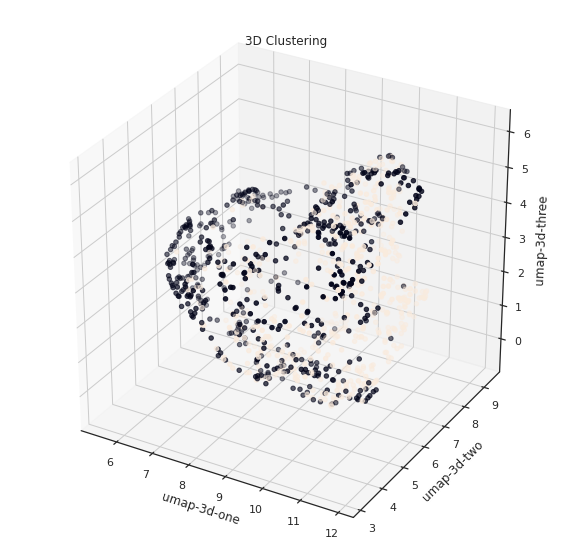

In [ ]:
X3D = umap.UMAP(n_components=3,
                n_neighbors=50,
                min_dist=0.3,
                metric='correlation').fit_transform(x9_scaled)

umap_component3 = X3D[:,0]
umap_component4 = X3D[:,1]
umap_component5 = X3D[:,2]

ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Clustering')
ax.scatter(
    xs=umap_component3,
    ys=umap_component4,
    zs=umap_component5,
    c=C_kmpp9)

ax.set_xlabel('umap-3d-one')
ax.set_ylabel('umap-3d-two')
ax.set_zlabel('umap-3d-three')
plt.show()

In [ ]:
#CV FI Score untuk KMeans++ clusters
lgbm_data = x9_scaled.copy()
clf_kmpp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kmpp = cross_val_score(clf_kmpp, lgbm_data, C_kmpp9, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_kmpp)}')

CV F1 score for K-Means clusters is 0.9485528477968937


In [ ]:
clf_kmpp.fit(lgbm_data, C_kmpp9)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
##melihat nilai SHAP dan membuat plotnya
explainer_kmpp = shap.TreeExplainer(clf_kmpp)
shap_values_kmpp = explainer_kmpp.shap_values(lgbm_data)

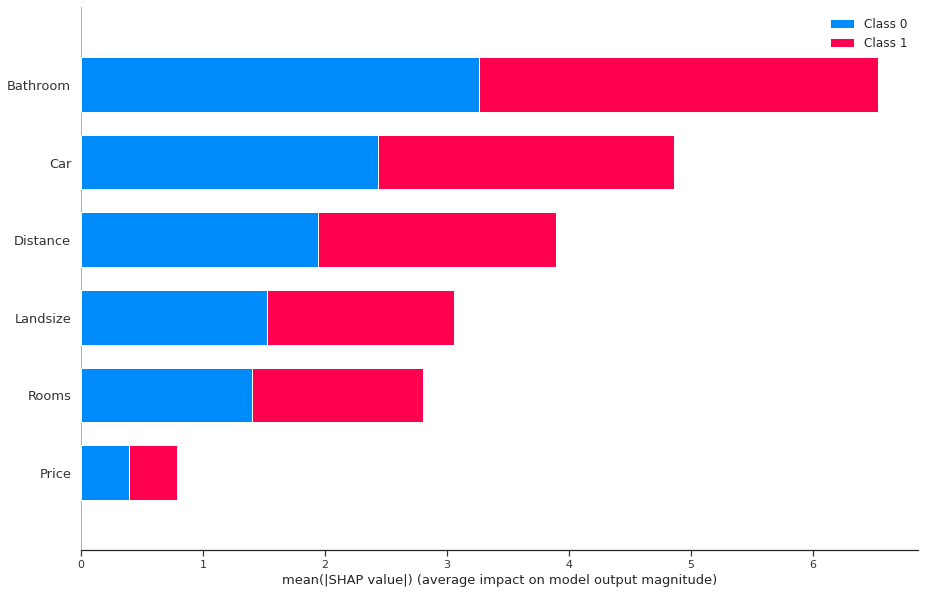

In [ ]:
shap.summary_plot(shap_values_kmpp, lgbm_data, plot_type="bar", plot_size=(15, 10))

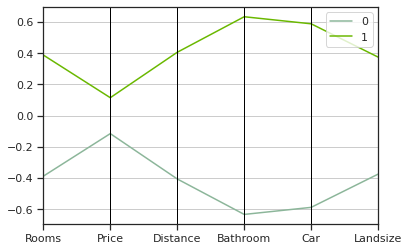

In [ ]:
# membuat parallel plot
kmpp9.cluster_centers_
cols = ['Rooms','Price','Distance','Bathroom', 'Car', 'Landsize']
dfC = pd.DataFrame(kmpp9.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.show()

In [ ]:
#melihat besar silhoutte coefficient
print(siluet(x9_scaled,C_kmpp9), end=', ')

0.2027384418698927, 

# **Interpretasi Hasil Clustering**
Nyimas Sharima

In [ ]:
#melihat clustering yang mana yang paling baik
#maka akan dipakai kmeans++ clustering untuk data tanpa outlier dan data outlier
#pertimbangan : dalam pembentukan centroid awal, kmeans++ lebih baik dibanding kmeans

In [ ]:
#hasil clustering untuk data tanpa outlier
a = Melb_housing_4_2[['Rooms','Price','Distance','Bathroom','Car','Landsize']]

In [ ]:
C_kmpp8_df = pd.concat([a.reset_index(drop=True), pd.DataFrame(C_kmpp8)], axis=1)
C_kmpp8_df['Cluster'] = kmpp8.labels_
C_kmpp8_df

Rooms      Price  Distance  Bathroom  Car  Landsize  0  Cluster
0          2  1480000.0       2.5       1.0  1.0     202.0  0        0
1          2  1035000.0       2.5       1.0  0.0     156.0  0        0
2          3  1465000.0       2.5       2.0  0.0     134.0  0        0
3          3   850000.0       2.5       2.0  1.0      94.0  0        0
4          4  1600000.0       2.5       1.0  2.0     120.0  1        1
...      ...        ...       ...       ...  ...       ... ..      ...
24196      4  1480000.0       6.3       1.0  3.0     593.0  1        1
24197      2   888000.0       6.3       2.0  1.0      98.0  0        0
24198      2   705000.0       6.3       1.0  2.0     220.0  0        0
24199      3  1140000.0       6.3       1.0  0.0     512.0  0        0
24200      2  1020000.0       6.3       1.0  0.0     250.0  0        0

[24201 rows x 8 columns]

In [ ]:
cluster_nonoutlier = pd.concat([a.reset_index(drop=True), C_kmpp8_df['Cluster']],axis = 1)
cluster_nonoutlier

Rooms      Price  Distance  Bathroom  Car  Landsize  Cluster
0          2  1480000.0       2.5       1.0  1.0     202.0        0
1          2  1035000.0       2.5       1.0  0.0     156.0        0
2          3  1465000.0       2.5       2.0  0.0     134.0        0
3          3   850000.0       2.5       2.0  1.0      94.0        0
4          4  1600000.0       2.5       1.0  2.0     120.0        1
...      ...        ...       ...       ...  ...       ...      ...
24196      4  1480000.0       6.3       1.0  3.0     593.0        1
24197      2   888000.0       6.3       2.0  1.0      98.0        0
24198      2   705000.0       6.3       1.0  2.0     220.0        0
24199      3  1140000.0       6.3       1.0  0.0     512.0        0
24200      2  1020000.0       6.3       1.0  0.0     250.0        0

[24201 rows x 7 columns]

In [ ]:
#cluster kelas 0 (cluster pertama) untuk data tanpa outlier
cluster_nonoutlier_0 = cluster_nonoutlier[cluster_nonoutlier['Cluster']==0]
cluster_nonoutlier_0

Rooms      Price  Distance  Bathroom  Car  Landsize  Cluster
0          2  1480000.0       2.5       1.0  1.0     202.0        0
1          2  1035000.0       2.5       1.0  0.0     156.0        0
2          3  1465000.0       2.5       2.0  0.0     134.0        0
3          3   850000.0       2.5       2.0  1.0      94.0        0
5          2   941000.0       2.5       1.0  0.0     181.0        0
...      ...        ...       ...       ...  ...       ...      ...
24195      3  1101000.0       6.3       1.0  0.0     288.0        0
24197      2   888000.0       6.3       2.0  1.0      98.0        0
24198      2   705000.0       6.3       1.0  2.0     220.0        0
24199      3  1140000.0       6.3       1.0  0.0     512.0        0
24200      2  1020000.0       6.3       1.0  0.0     250.0        0

[14721 rows x 7 columns]

In [ ]:
#statistika deskriptif untuk cluster kelas 0 (cluster pertama) dari data tanpa outlier
cluster_nonoutlier_0.describe(include = "all")

Rooms         Price  ...      Landsize  Cluster
count  14721.000000  1.472100e+04  ...  14721.000000  14721.0
mean       2.619727  8.668364e+05  ...    526.121391      0.0
std        0.730974  3.715235e+05  ...    547.390162      0.0
min        1.000000  1.120000e+05  ...      1.000000      0.0
25%        2.000000  6.000000e+05  ...    458.000000      0.0
50%        3.000000  7.850000e+05  ...    512.000000      0.0
75%        3.000000  1.065000e+06  ...    512.000000      0.0
max        5.000000  2.367000e+06  ...  17200.000000      0.0

[8 rows x 7 columns]

In [ ]:
#cluster kelas 1 (cluster kedua) untuk data tanpa outlier
cluster_nonoutlier_1 = cluster_nonoutlier[cluster_nonoutlier['Cluster']==1]
cluster_nonoutlier_1

Rooms      Price  Distance  Bathroom  Car  Landsize  Cluster
4          4  1600000.0       2.5       1.0  2.0     120.0        1
6          3  1876000.0       2.5       2.0  0.0     245.0        1
14         3  1350000.0       2.5       2.0  2.0     214.0        1
19         3  1200000.0       2.5       2.0  1.0     113.0        1
24         4  1330000.0       2.5       2.0  2.0     780.0        1
...      ...        ...       ...       ...  ...       ...      ...
24191      4   630000.0      25.5       2.0  2.0     388.0        1
24192      3   500000.0      25.5       2.0  2.0     383.0        1
24193      4   621000.0      25.5       2.0  2.0     375.0        1
24194      3   570000.0      25.5       2.0  2.0     404.0        1
24196      4  1480000.0       6.3       1.0  3.0     593.0        1

[9480 rows x 7 columns]

In [ ]:
#statistika deskriptif untuk cluster kelas 1 (cluster kedua) dari data tanpa outlier
cluster_nonoutlier_1.describe(include = "all")

Rooms         Price  ...       Landsize  Cluster
count  9480.00000  9.480000e+03  ...    9480.000000   9480.0
mean      3.65116  1.175020e+06  ...     683.351477      1.0
std       0.75389  4.836353e+05  ...    2546.758360      0.0
min       2.00000  2.950000e+05  ...       1.000000      1.0
25%       3.00000  7.800000e+05  ...     446.000000      1.0
50%       4.00000  1.100000e+06  ...     535.000000      1.0
75%       4.00000  1.505000e+06  ...     670.000000      1.0
max      12.00000  2.376000e+06  ...  146699.000000      1.0

[8 rows x 7 columns]

In [ ]:
#hasil clustering untuk data outlier
b = Melb_housing_4_3[['Rooms','Price','Distance','Bathroom','Car','Landsize']]

In [ ]:
C_kmpp9_df = pd.concat([b.reset_index(drop=True), pd.DataFrame(C_kmpp9)], axis=1)
C_kmpp9_df['Cluster'] = kmpp9.labels_
C_kmpp9_df

Rooms      Price  Distance  Bathroom  Car  Landsize  0  Cluster
0         3  2850000.0       3.3       2.0  0.0     211.0  0        0
1         3  2485000.0       3.3       1.0  0.0     512.0  0        0
2         3  2615000.0       3.3       2.0  1.0     177.0  0        0
3         3  2575000.0       3.3       2.0  1.0     228.0  0        0
4         3  3010000.0       3.3       2.0  0.0     147.0  0        0
...     ...        ...       ...       ...  ...       ... ..      ...
1084      5  2760000.0       6.2       3.0  3.0     718.0  1        1
1085      3  2610000.0       3.5       1.0  0.0     512.0  0        0
1086      3  2500000.0       4.6       2.0  2.0     330.0  0        0
1087      3  2855000.0       2.7       2.0  1.0     298.0  0        0
1088      3  2685000.0       0.7       1.0  0.0     512.0  0        0

[1089 rows x 8 columns]

In [ ]:
cluster_outlier = pd.concat([b.reset_index(drop=True), C_kmpp9_df['Cluster']],axis = 1)
cluster_outlier

Rooms      Price  Distance  Bathroom  Car  Landsize  Cluster
0         3  2850000.0       3.3       2.0  0.0     211.0        0
1         3  2485000.0       3.3       1.0  0.0     512.0        0
2         3  2615000.0       3.3       2.0  1.0     177.0        0
3         3  2575000.0       3.3       2.0  1.0     228.0        0
4         3  3010000.0       3.3       2.0  0.0     147.0        0
...     ...        ...       ...       ...  ...       ...      ...
1084      5  2760000.0       6.2       3.0  3.0     718.0        1
1085      3  2610000.0       3.5       1.0  0.0     512.0        0
1086      3  2500000.0       4.6       2.0  2.0     330.0        0
1087      3  2855000.0       2.7       2.0  1.0     298.0        0
1088      3  2685000.0       0.7       1.0  0.0     512.0        0

[1089 rows x 7 columns]

In [ ]:
#cluster kelas 0 (cluster pertama) untuk data outlier
cluster_outlier_0 = cluster_outlier[cluster_outlier['Cluster']==0]
cluster_outlier_0

Rooms      Price  Distance  Bathroom  Car  Landsize  Cluster
0         3  2850000.0       3.3       2.0  0.0     211.0        0
1         3  2485000.0       3.3       1.0  0.0     512.0        0
2         3  2615000.0       3.3       2.0  1.0     177.0        0
3         3  2575000.0       3.3       2.0  1.0     228.0        0
4         3  3010000.0       3.3       2.0  0.0     147.0        0
...     ...        ...       ...       ...  ...       ...      ...
1083      3  3250000.0       3.0       2.0  1.0     286.0        0
1085      3  2610000.0       3.5       1.0  0.0     512.0        0
1086      3  2500000.0       4.6       2.0  2.0     330.0        0
1087      3  2855000.0       2.7       2.0  1.0     298.0        0
1088      3  2685000.0       0.7       1.0  0.0     512.0        0

[545 rows x 7 columns]

In [ ]:
#statistika deskriptif untuk cluster kelas 0 (cluster pertama) dari data outlier
cluster_outlier_0.describe(include = "all")

Rooms         Price    Distance  ...         Car     Landsize  Cluster
count  545.000000  5.450000e+02  545.000000  ...  545.000000   545.000000    545.0
mean     3.744954  3.065903e+06    6.512844  ...    1.115596   536.462385      0.0
std      0.852708  7.828809e+05    3.160955  ...    1.007068   197.636222      0.0
min      1.000000  2.380000e+06    0.000000  ...    0.000000    95.000000      0.0
25%      3.000000  2.555000e+06    4.100000  ...    0.000000   512.000000      0.0
50%      4.000000  2.800000e+06    5.900000  ...    1.000000   512.000000      0.0
75%      4.000000  3.300000e+06    8.000000  ...    2.000000   624.000000      0.0
max     10.000000  7.000000e+06   21.500000  ...    4.000000  1777.000000      0.0

[8 rows x 7 columns]

In [ ]:
#cluster kelas 1 (cluster kedua) untuk data outlier
cluster_outlier_1 = cluster_outlier[cluster_outlier['Cluster']==1]
cluster_outlier_1

Rooms      Price  Distance  Bathroom  Car  Landsize  Cluster
8         5  2840000.0       6.4       4.0  4.0     809.0        1
10        4  3000000.0       6.3       2.0  2.0    1581.0        1
12        6  5525000.0       6.3       3.0  4.0    1491.0        1
13        4  3660000.0       6.3       3.0  2.0     421.0        1
16        4  4200000.0       6.3       3.0  3.0     563.0        1
...     ...        ...       ...       ...  ...       ...      ...
1075      4  2930000.0       7.3       2.0  4.0     650.0        1
1076      4  2900000.0       5.9       4.0  3.0     630.0        1
1079      5  3680000.0       8.4       3.0  2.0     807.0        1
1081      6  5575000.0       3.0       4.0  4.0     420.0        1
1084      5  2760000.0       6.2       3.0  3.0     718.0        1

[544 rows x 7 columns]

In [ ]:
#statistika deskriptif untuk cluster kelas 1 (cluster kedua) dari data outlier
cluster_outlier_1.describe(include = "all")

Rooms         Price    Distance  ...         Car     Landsize  Cluster
count  544.00000  5.440000e+02  544.000000  ...  544.000000   544.000000    544.0
mean     4.50000  3.271157e+06    9.280699  ...    2.648897   844.880515      1.0
std      0.93824  9.787336e+05    3.070758  ...    1.099087   501.999962      0.0
min      2.00000  2.380000e+06    2.300000  ...    0.000000   156.000000      1.0
25%      4.00000  2.600000e+06    7.500000  ...    2.000000   615.500000      1.0
50%      4.00000  2.930000e+06    9.200000  ...    2.000000   738.000000      1.0
75%      5.00000  3.592500e+06   10.700000  ...    3.000000   902.250000      1.0
max     16.00000  1.120000e+07   23.000000  ...    8.000000  5042.000000      1.0

[8 rows x 7 columns]

# Pembagian Tugas (diluar ipynb) :

1. Membuat PPT dan mengedit video = Salwa Febiola, Putri Triridita, Nyimas Sharima, Gema Fitri
2. Membuat video = Febby Rahma, Esraminar Siregar, Leonardo B.S. Saragih, Faiz Galih